Demographics

[All Sport Centres](#all)

1. [Porchester Hall](#porch)
2. [Queen Mother SC](#qm)
3. [Marshall Street LC](#marsh)
4. [Seymour LC](#sey)
5. [Jubilee SC](#jub)
6. [Little Venice SC](#lv)
7. [Moberly SC](#mob)
8. [Paddington Rec Ground](#pad)


Temporal 

1. [Annual/Seasonal](#year)
2. [Weekly](#week)
3. [Daily](#day)


In [1]:
# import libraries needed for analysis
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import pandas as pd
from scipy import stats
import seaborn as sns
from datetime import datetime

# specify number of rows and columns to show
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 100)

# set default number format to 3 decimal places
pd.options.display.float_format = '{:40,.3f}'.format

# set ggplot style for plots
plt.style.use('ggplot') 
%matplotlib inline

# Set seaborn background style
sns.set_style("whitegrid")


In [2]:
# Import cleaned data
fulldata1 = pd.read_csv('1EveryoneActive_CLEANED.csv')
fulldata2 = pd.read_csv('2EveryoneActive_CLEANED.csv')

# Combine the two imported sets
frames = [fulldata1, fulldata2]
fulldata = pd.concat(frames)

# Drop unused columns
columns = ['ActivityType', 'CitySaveActiveWestminster', 'FirstVisit']
fulldata.drop(columns, inplace=True, axis=1)

# Split data into individual sport centres 
porch = fulldata.loc[fulldata['SportsCentre'] == 'Porchester Hall']
qm = fulldata.loc[fulldata['SportsCentre'] == 'Queen Mother SC']
marsh = fulldata.loc[fulldata['SportsCentre'] == 'Marshall Street LC']
sey = fulldata.loc[fulldata['SportsCentre'] == 'Seymour LC']
jub = fulldata.loc[fulldata['SportsCentre'] == 'Jubilee SC']
lv = fulldata.loc[fulldata['SportsCentre'] == 'Little Venice SC']
mob = fulldata.loc[fulldata['SportsCentre'] == 'Moberly SC']
pad = fulldata.loc[fulldata['SportsCentre'] == 'Paddington Rec Ground']

## All Sport Centres <a name="all"></a>

In [3]:
# Drop duplicate MemberIDs so we are only counting each member once

# First break off the '0' MembershipIDs since they are unique and we will include them
fulldata_0 = fulldata.loc[fulldata['MembershipID'] == 0]

# Drop duplicates from the rest of the main dataset, keeping just the last instance of MembershipID
fulldata_IDdrop = fulldata.drop_duplicates(['MembershipID'], keep='last')

# Re-combine the two dataframes
frames = [fulldata_0, fulldata_IDdrop]
allSC = pd.concat(frames)

# Drop the 0 Age values for the distribution charts
allSC_nozero = allSC[allSC.Age != 0]

# Select only the finite numbers from the non-zero dataframe as histogram can't handle NaNs
allSC_nozero= allSC_nozero[np.isfinite(allSC_nozero['Age'])]

# Drop the 'Not Recorded' Gender values for the bar chart
allSC_allgen = allSC[allSC.Gender != 'Not Recorded']

# Drop the 'Unknown' group from the EthnicGroup category
allSC_allethn = allSC[allSC.EthnicGroup != 'Unknown']

# Drop '0' Age values from ethnicity frame, and NaN
allSC_allethn = allSC_allethn[allSC_allethn.Age != 0]
allSC_allethn= allSC_allethn[np.isfinite(allSC_allethn['Age'])]

# Drop the 'Not Recorded' gender variable
allSC_cleaned = allSC_allethn[allSC_allethn.Gender != 'Not Recorded']

Text(35,2.3,'Median = 34.0')

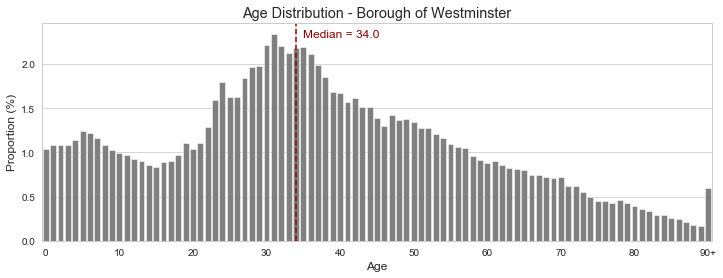

In [4]:
# Plot Westminster age distribution (from census data)
plt.figure(figsize=(12, 4))

westpop = pd.read_csv('Westminster_Age_count.csv')
ax = sns.barplot(x="Age", y="PROP", data=westpop, color="grey")
ax.set(ylabel="Proportion (%)")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        

ax = plt.title('Age Distribution - Borough of Westminster')
ax = plt.axvline(34, color='darkred', linestyle='--', label = "Median")
plt.text(34 + 1,2.3, 'Median = 34.0', fontsize = 12, color="darkred")

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


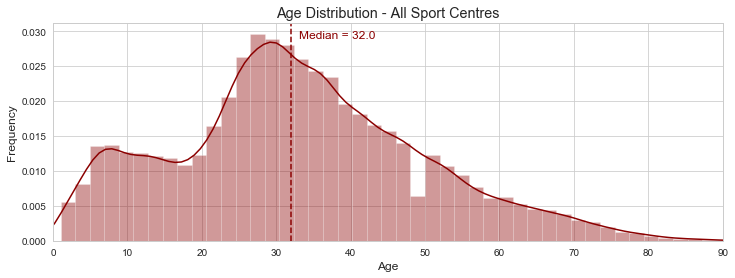

In [5]:
# Plot Sport Centre age distributions
plt.figure(figsize=(12, 4))

# distplot() determines the size of the bins according to the Freedman-Diaconis rule
A=allSC_nozero['Age']
Anan=A[~np.isnan(A)] # Remove the NaNs

median=allSC_nozero['Age'].median()
ax = sns.distplot(Anan, hist=True, color='darkred')
ax.set(ylabel="Frequency")

# Plot the median line and label it
plt.axvline(median, color='darkred', linestyle='--', label = "Median")
plt.text(median + 1,.029, 'Median = ' + str(median), fontsize = 12, color="darkred")

plt.xlim([0,90])
ax = plt.title('Age Distribution - All Sport Centres')



C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


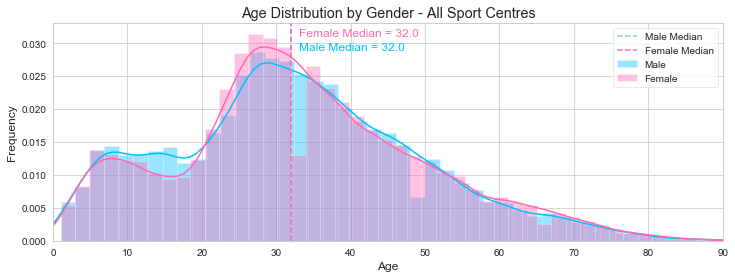

In [6]:
# Plot sport centre age distribution by gender
plt.figure(figsize=(12, 4))

medianM=allSC_nozero.Age[allSC_nozero.Gender=='Male'].median()
medianF=allSC_nozero.Age[allSC_nozero.Gender=='Female'].median()

ax=sns.distplot(allSC_nozero.Age[allSC_nozero.Gender=='Male'], label='Men', color='deepskyblue')
ax2=sns.distplot(allSC_nozero.Age[allSC_nozero.Gender=='Female'], label='Women', color='hotpink')

plt.axvline(medianM, color='skyblue', linestyle='--', label = "Median")
plt.axvline(medianF, color='hotpink', linestyle='--', label = "Median")
plt.text(medianM + 1,.029, 'Male Median = ' + str(medianM), fontsize = 12, color='deepskyblue')
plt.text(medianF + 1,.031, 'Female Median = ' + str(medianF), fontsize = 12, color='hotpink')
plt.xlim([0,90])
ax.set(ylabel="Frequency")

plt.title('Age Distribution by Gender - All Sport Centres');
plt.legend({"Male Median": medianM, "Female Median": medianF, "Male": ax, "Female": ax2});

In [7]:
# Calculate the proportion of AgeBand for each SC
SC_bandgroup= allSC.groupby(['AgeBand','SportsCentre']).size().rename('count').reset_index()

# Calculate and add in the counts for all Sport Centres
SC_bandgroup.loc[-1] = ['0-15', 'All SC', 15852]
SC_bandgroup.loc[-2] = ['16-64', 'All SC', 81582]
SC_bandgroup.loc[-3] = ['65+', 'All SC', 4153] 
SC_bandgroup=SC_bandgroup.sort_values(by=['AgeBand'])
SC_bandgroup['pct'] = SC_bandgroup.groupby('SportsCentre')['count'].apply(lambda x: 100* x.astype(float)/x.sum())

# Create dataframe of the Westminster borough AgeBands, and joing it with SC_bandgroup
wb = {'AgeBand': ['0-15', '16-64', '65+'], 'SportsCentre': ['Westminster', 'Westminster', 'Westminster'], 'count': [40755, 173900, 30141],'pct': [16.427, 71.020, 12.552]}
westAgeBands = pd.DataFrame(data=wb)

# Join the dataframes into a single group for graphing
SC_bandgroup = pd.concat([SC_bandgroup, westAgeBands], ignore_index=True)


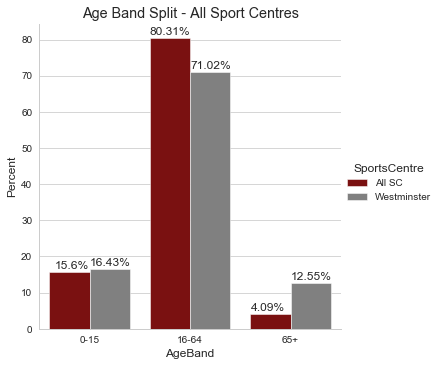

In [8]:
# Plot proportion chart of AgeBands

# Take only the All SC counts/percentages for chart
SC_bandchart=SC_bandgroup[(SC_bandgroup['SportsCentre'] == 'All SC') | (SC_bandgroup['SportsCentre'] =='Westminster')]
pct1 = SC_bandchart.iloc[0]['pct']
pct2 = SC_bandchart.iloc[1]['pct']
pct3 = SC_bandchart.iloc[2]['pct']
pct4 = SC_bandchart.iloc[3]['pct']
pct5 = SC_bandchart.iloc[4]['pct']
pct6 = SC_bandchart.iloc[5]['pct']

ax = sns.catplot(x="AgeBand", y="pct", hue="SportsCentre", kind="bar", palette=['darkred','grey'], data=SC_bandchart)
plt.text(-.35,pct1+1, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(0.6,pct2+1, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(1.6,pct3+1, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0,pct4+1, str(pct4.round(2)) + '%', fontsize = 12)
plt.text(1,pct5+1, str(pct5.round(2)) + '%', fontsize = 12)
plt.text(2,pct6+1, str(pct6.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Age Band Split - All Sport Centres');
plt.show()



In [9]:
# As above, calculate the proportion of Gender for each SC
SC_gengroup= allSC_allgen.groupby(['Gender','SportsCentre']).size().rename('count').reset_index()

# Calculate and add in the counts for all Sport Centres
SC_gengroup.loc[-1] = ['Male', 'All SC', 50029]
SC_gengroup.loc[-2] = ['Female', 'All SC', 45931]
SC_gengroup['pct'] = SC_gengroup.groupby('SportsCentre')['count'].apply(lambda x: 100* x.astype(float)/x.sum())
SC_gengroup=SC_gengroup.sort_values(by=['Gender'])

# Like AgeBands, create dataframe of the Westminster borough genders, and join it with SC_gengroup
wg = {'Gender': ['Male', 'Female'], 'SportsCentre': ['Westminster', 'Westminster'], 'count': [127609, 117187],'pct': [52.129, 47.871]}
westgender = pd.DataFrame(data=wg)

# Join the dataframes into a single group for graphing
SC_gengroup = pd.concat([SC_gengroup, westgender], ignore_index=True)


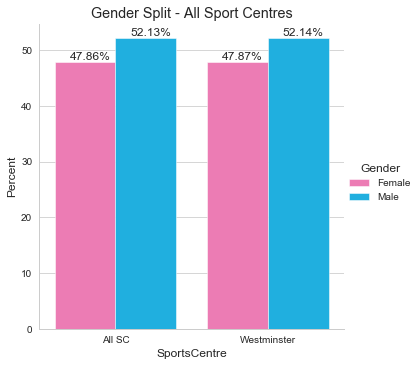

In [10]:
# Plot the gender proportions of data 

# Take only the All SC counts/percentages for chart
SC_genchart=SC_gengroup[(SC_gengroup['SportsCentre'] == 'All SC') | (SC_gengroup['SportsCentre'] =='Westminster')]
pct1 = SC_genchart.iloc[0]['pct']
pct2 = SC_genchart.iloc[1]['pct']
pct3 = SC_genchart.iloc[2]['pct']
pct4 = SC_genchart.iloc[3]['pct']

ax = sns.catplot(x="SportsCentre", y="pct", hue="Gender", kind="bar", palette=['hotpink','deepskyblue','grey'], data=SC_genchart)
plt.text(-0.3,pct1+0.5, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(1.1,pct2+0.5, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(0.1,pct3+0.5, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.7,pct4+0.5, str(pct4.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Gender Split - All Sport Centres');

In [11]:
# Calculate the percentage of EthnicGroups for each SC
SC_ethgroup= allSC_cleaned.groupby(['EthnicGroup','SportsCentre']).size().rename('count').reset_index()

# Calculate and add in the counts for all Sport Centres
SC_ethgroup.loc[-1] = ['Other ethnic group', 'All SC', 45520]
SC_ethgroup.loc[-2] = ['White', 'All SC', 10770]
SC_ethgroup.loc[-3] = ['Asian/Asian British', 'All SC', 2947]
SC_ethgroup.loc[-4] = ['Black/African/Caribbean/Black British', 'All SC', 2150]
SC_ethgroup.loc[-5] = ['Mixed/multiple ethnic group', 'All SC', 1217]

SC_ethgroup['pct'] = SC_ethgroup.groupby('SportsCentre')['count'].apply(lambda x: 100* x.astype(float)/x.sum())
SC_ethgroup=SC_ethgroup.sort_values(by=['EthnicGroup'])

# As above, create dataframe of the Westminster borough Ethnic Groups, and join with SC_ethgroup
we = {'EthnicGroup': ['Asian/Asian British', 'Black/African/Caribbean/Black British', 'Mixed/multiple ethnic group','Other ethnic group','White'], 'SportsCentre': ['Westminster', 'Westminster', 'Westminster','Westminster','Westminster'], 'count': [31862, 16472, 11395,24337,135330],'pct': [14.324, 7.264, 5.151,10.907,62.363]}
westEthGroup = pd.DataFrame(data=we)

# Join the dataframes into a single group for graphing
SC_ethgroup = pd.concat([SC_ethgroup, westEthGroup], ignore_index=True)

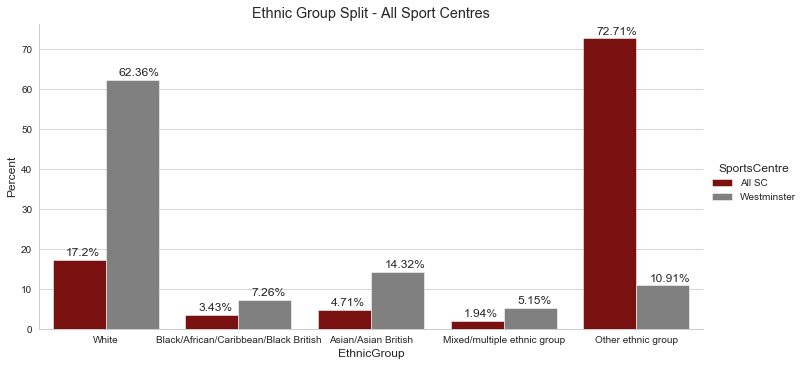

In [12]:
# Plot EthnicGroup distribution

# Take only the All SC counts/percentages for chart
SC_ethchart=SC_ethgroup[(SC_ethgroup['SportsCentre'] == 'All SC') | (SC_ethgroup['SportsCentre'] =='Westminster')]
pct1 = SC_ethchart.iloc[0]['pct'] #Asian
pct2 = SC_ethchart.iloc[1]['pct'] #Black
pct3 = SC_ethchart.iloc[2]['pct'] #Mixed
pct4 = SC_ethchart.iloc[3]['pct'] #Other
pct5 = SC_ethchart.iloc[4]['pct'] #White
pct6 = SC_ethchart.iloc[5]['pct'] #Asian
pct7 = SC_ethchart.iloc[6]['pct'] #Black
pct8 = SC_ethchart.iloc[7]['pct'] #Mixed
pct9 = SC_ethchart.iloc[8]['pct'] #Other
pct10 = SC_ethchart.iloc[9]['pct'] #White

ax = sns.catplot(x="EthnicGroup", y="pct", hue="SportsCentre", kind="bar", palette=['darkred','grey'], data=SC_ethchart, height=5, aspect=2, order=['White','Black/African/Caribbean/Black British','Asian/Asian British','Mixed/multiple ethnic group', 'Other ethnic group'])

plt.text(-0.3,pct5+1, str(pct5.round(2)) + '%', fontsize = 12) #White
plt.text(0.7,pct2+1, str(pct2.round(2)) + '%', fontsize = 12) #Black
plt.text(1.7,pct1+1, str(pct1.round(2)) + '%', fontsize = 12) #Asian
plt.text(2.7,pct3+1, str(pct3.round(2)) + '%', fontsize = 12) #Mixed
plt.text(3.7,pct4+1, str(pct4.round(2)) + '%', fontsize = 12) #Other
plt.text(0.1,pct10+1, str(pct10.round(2)) + '%', fontsize = 12) #White
plt.text(1.1,pct7+1, str(pct7.round(2)) + '%', fontsize = 12) #Black
plt.text(2.1,pct6+1, str(pct6.round(2)) + '%', fontsize = 12) #Asian
plt.text(3.1,pct8+1, str(pct8.round(2)) + '%', fontsize = 12) #Mixed
plt.text(4.1,pct9+1, str(pct9.round(2)) + '%', fontsize = 12) #Other


ax.set(ylabel="Percent")
ax=plt.title('Ethnic Group Split - All Sport Centres')

## Porchester Hall <a name="porch"></a>

In [13]:
# Drop duplicate MemberIDs so we are only counting each member once

# First break off the '0' MembershipIDs since they are unique and we will keep them
porch_0 = porch.loc[porch['MembershipID'] == 0]

# Drop duplicates from the rest of the main dataset, keeping just the last instance of MembershipID
porch_IDdrop = porch.drop_duplicates(['MembershipID'], keep='last')

# Re-combine the two dataframes
frames = [porch_0, porch_IDdrop]
porch = pd.concat(frames)

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


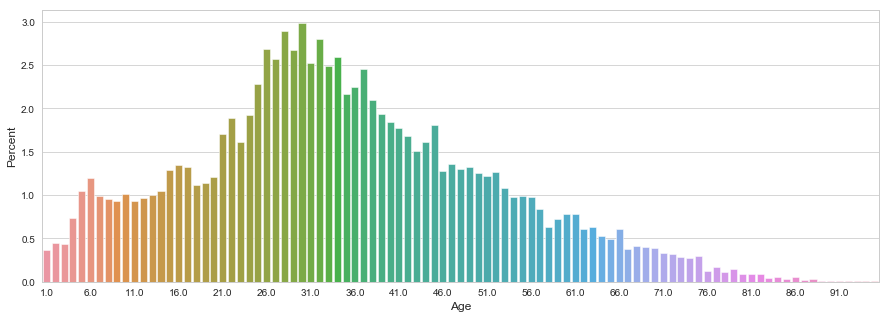

In [14]:
# Bar chart of age by percentage
plt.figure(figsize=(15, 5))

# DROP the 0 values for the distribution chart
porch_nozero = porch[porch.Age != 0]

ax = sns.barplot(x="Age", y="Age", data=porch_nozero, estimator=lambda x: len(x) / len(porch_nozero) * 100)
ax.set(ylabel="Percent")
# Adjusts tick labeling
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


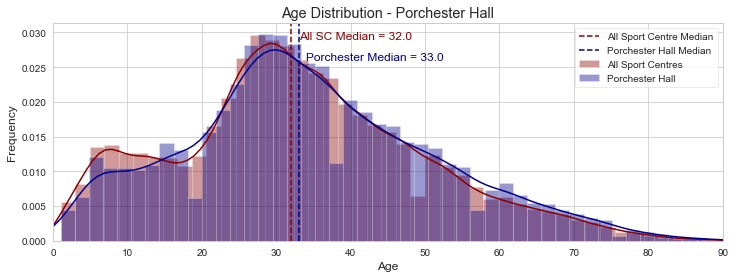

In [15]:
# Porchester Hall age distribution compared with sport centre average
plt.figure(figsize=(12, 4))

# distplot() determines the size of the bins according to the Freedman-Diaconis rule
A=allSC_nozero['Age']
Anan=A[~np.isnan(A)] # Remove the NaNs
medianA=allSC_nozero['Age'].median()

A2=porch_nozero['Age']
Anan2=A2[~np.isnan(A2)] # Remove the NaNs
medianB=porch_nozero['Age'].median()

op1 = sns.distplot(Anan, hist=True, color='darkred')
op1.axvline(medianA, color='darkred', linestyle='--')
op1.text(medianA + 1,.029, 'All SC Median = ' + str(medianA), fontsize = 12, color='darkred')

op2 = sns.distplot(Anan2, hist=True, color='darkblue')
op2.axvline(medianB, color='darkblue', linestyle='--')
op2.text(medianB + 1,.026, 'Porchester Median = ' + str(medianB), fontsize = 12, color='darkblue')

op1.set(ylabel="Frequency")
plt.xlim([0,90])
plt.legend({"All Sport Centre Median": medianA, "Porchester Hall Median": medianB, "All Sport Centres": op1, "Porchester Hall": op2});
ax = plt.title('Age Distribution - Porchester Hall')


C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


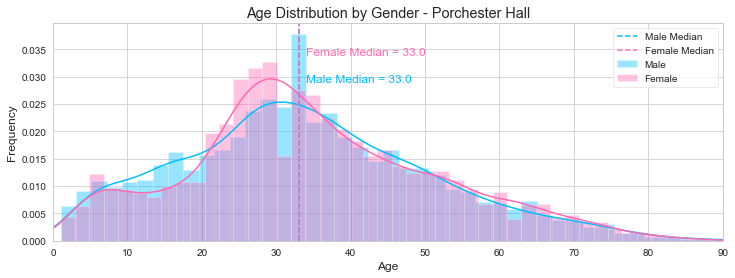

In [16]:
# Plot age distribution by gender - two plots comparing SC with overall average

# selects only the finite numbers from the non-zero dataframe bc histogram can't handle NaNs
porch_nozero= porch_nozero[np.isfinite(porch_nozero['Age'])]

plt.figure(figsize=(12, 4))

medianM=porch_nozero.Age[porch_nozero.Gender=='Male'].median()
medianF=porch_nozero.Age[porch_nozero.Gender=='Female'].median()

ax3=sns.distplot(porch_nozero.Age[porch_nozero.Gender=='Male'], label='Men', color='deepskyblue')
ax4=sns.distplot(porch_nozero.Age[porch_nozero.Gender=='Female'], label='Women', color='hotpink')

plt.axvline(medianM, color='deepskyblue', linestyle='--', label = "Median")
plt.axvline(medianF, color='hotpink', linestyle='--', label = "Median")

plt.text(medianM + 1,.029, 'Male Median = ' + str(medianM), fontsize = 12, color='deepskyblue')
plt.text(medianF + 1,.034, 'Female Median = ' + str(medianF), fontsize = 12, color='hotpink')


plt.xlim([0,90])
ax3.set(ylabel="Frequency")
plt.legend({"Male Median": medianM, "Female Median": medianF, "Male": ax3, "Female": ax4});
plt.title('Age Distribution by Gender - Porchester Hall');
plt.show()

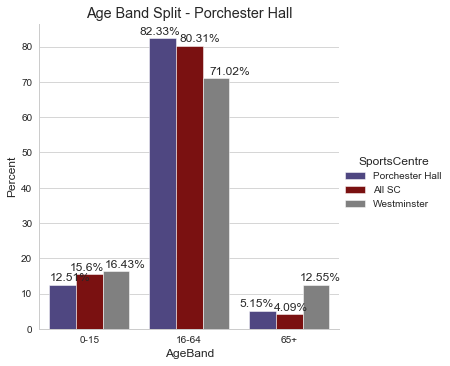

In [17]:
# Porchester Hall Age band distribution

# Grab only the All SC counts/percentages for chart
SC_bandchart=SC_bandgroup[(SC_bandgroup['SportsCentre'] == 'All SC') | (SC_bandgroup['SportsCentre'] =='Porchester Hall') | (SC_bandgroup['SportsCentre'] =='Westminster')]
SC_bandchart= SC_bandchart.sort_values(by=['AgeBand'])
pct1 = SC_bandchart.iloc[0]['pct']
pct2 = SC_bandchart.iloc[1]['pct']
pct3 = SC_bandchart.iloc[2]['pct']

pct4 = SC_bandchart.iloc[3]['pct']
pct5 = SC_bandchart.iloc[4]['pct']
pct6 = SC_bandchart.iloc[5]['pct']

pct7 = SC_bandchart.iloc[6]['pct']
pct8 = SC_bandchart.iloc[7]['pct']
pct9 = SC_bandchart.iloc[8]['pct']

ax = sns.catplot(x="AgeBand", y="pct", hue="SportsCentre", kind="bar", palette=['darkslateblue','darkred', 'grey'], data=SC_bandchart);# - to be used for comparisons
plt.text(-.4,pct1+1, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(-.2,pct2+1, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(0.15,pct3+1, str(pct3.round(2)) + '%', fontsize = 12)

plt.text(0.9,pct4+1, str(pct4.round(2)) + '%', fontsize = 12)
plt.text(0.5,pct5+1, str(pct5.round(2)) + '%', fontsize = 12)
plt.text(1.2,pct6+1, str(pct6.round(2)) + '%', fontsize = 12)

plt.text(1.5,pct7+1, str(pct7.round(2)) + '%', fontsize = 12)
plt.text(1.85,pct8+1, str(pct8.round(2)) + '%', fontsize = 12)
plt.text(2.1,pct9+1, str(pct9.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Age Band Split - Porchester Hall');

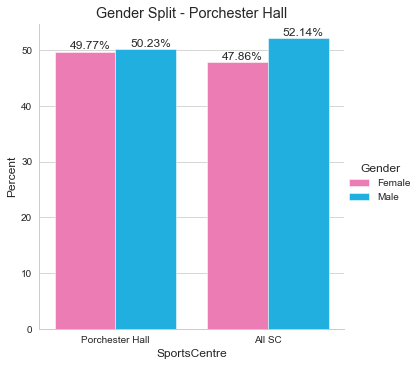

In [18]:
# Gender proportions

# Break out chart by multiple variables
SC_genchart=SC_gengroup[(SC_gengroup['SportsCentre'] == 'All SC') | (SC_gengroup['SportsCentre'] =='Porchester Hall')]
pct1 = SC_genchart.iloc[0]['pct']
pct2 = SC_genchart.iloc[1]['pct']
pct3 = SC_genchart.iloc[2]['pct']
pct4 = SC_genchart.iloc[3]['pct']

ax = sns.catplot(x="SportsCentre", y="pct", hue="Gender", palette =['hotpink','deepskyblue'], kind="bar", data=SC_genchart);# - to be used for comparisons
plt.text(-0.3,pct1+0.5, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(0.7,pct2+0.5, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(1.1,pct3+0.5, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.1,pct4+0.5, str(pct4.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Gender Split - Porchester Hall');

## Queen Mother SC <a name="qm"></a>

In [19]:
# Drop duplicate MemberIDs so we are only counting each member once

# First break off the '0' MembershipIDs since they are unique and we will keep them
qm_0 = qm.loc[qm['MembershipID'] == 0]

# Drop duplicates from the rest of the main dataset, keeping just the last instance of MembershipID
qm_IDdrop = qm.drop_duplicates(['MembershipID'], keep='last')

# Re-combine the two dataframes
frames = [qm_0, qm_IDdrop]
qm = pd.concat(frames)

# DROP the 'Not Recorded' Gender values as well as missing ages
qm_allgen = qm[qm.Gender != 'Not Recorded']

# Drop the 'Unknown' EthnicGroup from the analysis
qm_allethn = qm[qm.EthnicGroup != 'Unknown']

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


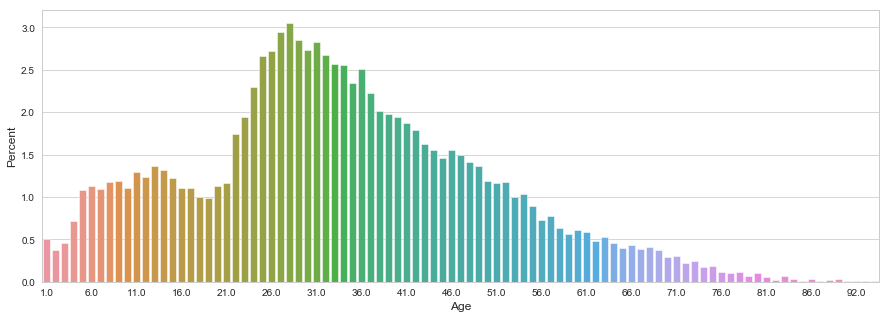

In [20]:
# (1)
#Bar chart of age by percentage
plt.figure(figsize=(15, 5))

# DROP the 0 values for the distribution chart
qm_nozero = qm[qm.Age != 0]

ax = sns.barplot(x="Age", y="Age", data=qm_nozero, estimator=lambda x: len(x) / len(qm_nozero) * 100)
ax.set(ylabel="Percent")
# Adjusts tick labeling
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


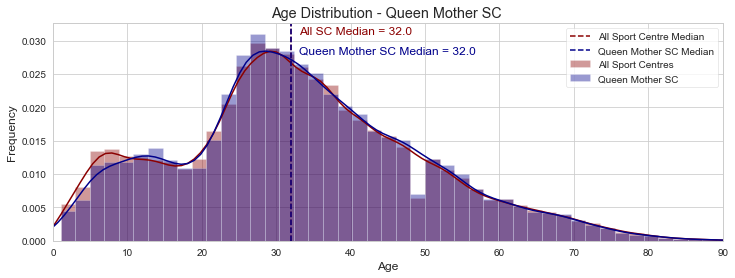

In [21]:
# (2)
# QM AGE DISTRUBTION - compared with SC average
plt.figure(figsize=(12, 4))

# distplot() determines the size of the bins according to the Freedman-Diaconis rule
A=allSC_nozero['Age']
Anan=A[~np.isnan(A)] # Remove the NaNs
medianA=allSC_nozero['Age'].median()

A2=qm_nozero['Age']
Anan2=A2[~np.isnan(A2)] # Remove the NaNs
medianB=qm_nozero['Age'].median()

op1 = sns.distplot(Anan, hist=True, color='darkred')
op1.axvline(medianA, color='darkred', linestyle='--')
op1.text(medianA + 1,.031, 'All SC Median = ' + str(medianA), fontsize = 12, color='darkred')

op2 = sns.distplot(Anan2, hist=True, color='darkblue')
op2.axvline(medianB, color='darkblue', linestyle='--')
op2.text(medianB + 1,.028, 'Queen Mother SC Median = ' + str(medianB), fontsize = 12, color='darkblue')

op1.set(ylabel="Frequency")
plt.xlim([0,90])
plt.legend({"All Sport Centre Median": medianA, "Queen Mother SC Median": medianB, "All Sport Centres": op1, "Queen Mother SC": op2});
op1 = plt.title('Age Distribution - Queen Mother SC ')

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


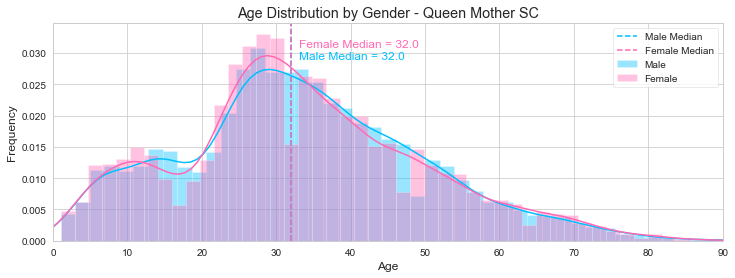

In [22]:
# (3)
# QM plot age distribution by gender 

# select only the finite numbers from the non-zero dataframe bc histogram can't handle NaNs
qm_nozero= qm_nozero[np.isfinite(qm_nozero['Age'])]

plt.figure(figsize=(12, 4))

medianM=qm_nozero.Age[qm_nozero.Gender=='Male'].median()
medianF=qm_nozero.Age[qm_nozero.Gender=='Female'].median()

ax3=sns.distplot(qm_nozero.Age[qm_nozero.Gender=='Male'], label='Men',color='deepskyblue')
ax4=sns.distplot(qm_nozero.Age[qm_nozero.Gender=='Female'], label='Women', color='hotpink')

plt.axvline(medianM, color='deepskyblue', linestyle='--', label = "Median")
plt.axvline(medianF, color='hotpink', linestyle='--', label = "Median")

plt.text(medianM + 1,.029, 'Male Median = ' + str(medianM), fontsize = 12, color='deepskyblue')
plt.text(medianF + 1,.031, 'Female Median = ' + str(medianF), fontsize = 12, color='hotpink')


plt.xlim([0,90])
ax3.set(ylabel="Frequency")
plt.legend({"Male Median": medianM, "Female Median": medianF, "Male": ax3, "Female": ax4});
plt.title('Age Distribution by Gender - Queen Mother SC');
plt.show()

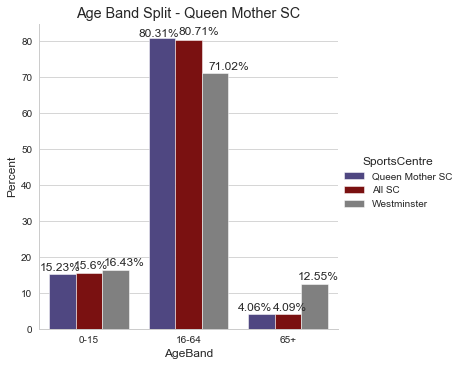

In [23]:
# (4)
# QM age band distribution - percentage

# Grab only the All SC counts/percentages for chart
SC_bandchart=SC_bandgroup[(SC_bandgroup['SportsCentre'] == 'All SC') | (SC_bandgroup['SportsCentre'] =='Queen Mother SC')| (SC_bandgroup['SportsCentre'] =='Westminster')]
SC_bandchart= SC_bandchart.sort_values(by=['AgeBand'])
pct1 = SC_bandchart.iloc[0]['pct']
pct2 = SC_bandchart.iloc[1]['pct']
pct3 = SC_bandchart.iloc[2]['pct']
pct4 = SC_bandchart.iloc[3]['pct']
pct5 = SC_bandchart.iloc[4]['pct']
pct6 = SC_bandchart.iloc[5]['pct']
pct7 = SC_bandchart.iloc[6]['pct']
pct8 = SC_bandchart.iloc[7]['pct']
pct9 = SC_bandchart.iloc[8]['pct']

ax = sns.catplot(x="AgeBand", y="pct", hue="SportsCentre", kind="bar", palette=['darkslateblue','darkred', 'grey'], data=SC_bandchart);# - to be used for comparisons
plt.text(-.5,pct1+1, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(-.15,pct2+1, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(0.15,pct3+1, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.9,pct4+1, str(pct4.round(2)) + '%', fontsize = 12)
plt.text(0.5,pct5+1, str(pct5.round(2)) + '%', fontsize = 12)
plt.text(1.2,pct6+1, str(pct6.round(2)) + '%', fontsize = 12)
plt.text(1.5,pct7+1, str(pct7.round(2)) + '%', fontsize = 12)
plt.text(1.85,pct8+1, str(pct8.round(2)) + '%', fontsize = 12)
plt.text(2.1,pct9+1, str(pct9.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Age Band Split - Queen Mother SC');

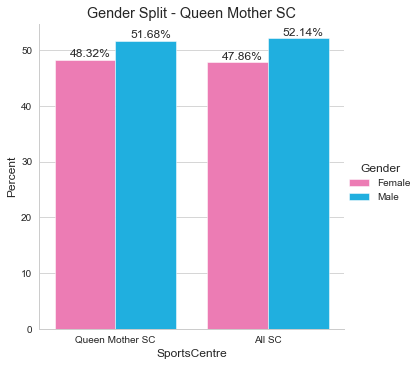

In [24]:
# (5)
# Gender percentage split of data 

# Break out chart by multiple variables
SC_genchart=SC_gengroup[(SC_gengroup['SportsCentre'] == 'All SC') | (SC_gengroup['SportsCentre'] =='Queen Mother SC')]
pct1 = SC_genchart.iloc[0]['pct']
pct2 = SC_genchart.iloc[1]['pct']
pct3 = SC_genchart.iloc[2]['pct']
pct4 = SC_genchart.iloc[3]['pct']

ax = sns.catplot(x="SportsCentre", y="pct", hue="Gender", kind="bar", palette =['hotpink','deepskyblue'], data=SC_genchart);# - to be used for comparisons
plt.text(-0.3,pct1+0.5, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(0.7,pct2+0.5, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(1.1,pct3+0.5, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.1,pct4+0.5, str(pct4.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Gender Split - Queen Mother SC');

## Marshall Street LC <a name="marsh"></a>

In [25]:
# Drop duplicate MemberIDs so we are only counting each member once

# First break off the '0' MembershipIDs since they are unique and we will keep them
marsh_0 = marsh.loc[marsh['MembershipID'] == 0]

# Drop duplicates from the rest of the main dataset, keeping just the last instance of MembershipID
marsh_IDdrop = marsh.drop_duplicates(['MembershipID'], keep='last')

# Re-combine the two dataframes
frames = [marsh_0, marsh_IDdrop]
marsh = pd.concat(frames)

# Drop the 'Not Recorded' Gender values, and remove missing ages as well
marsh_allgen = marsh[marsh.Gender != 'Not Recorded']

# Drop the 'Unknown' EthnicGroup from the analysis
marsh_allethn = marsh[marsh.EthnicGroup != 'Unknown']

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


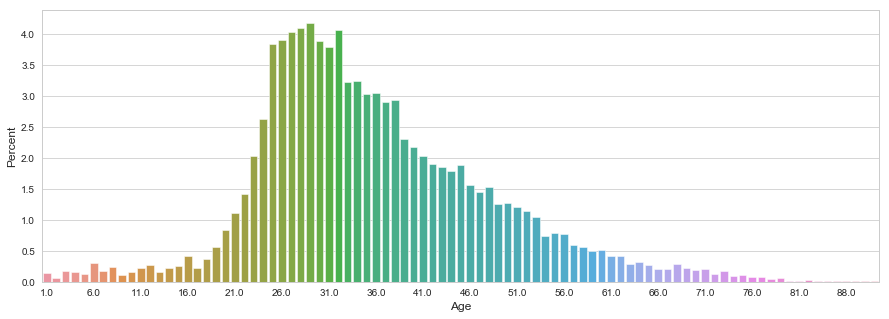

In [26]:
# (1)
#Bar chart of age by percentage
plt.figure(figsize=(15, 5))

# DROP the 0 values for the distribution chart
marsh_nozero = marsh[marsh.Age != 0]

ax = sns.barplot(x="Age", y="Age", data=marsh_nozero, estimator=lambda x: len(x) / len(marsh_nozero) * 100)
ax.set(ylabel="Percent")
# Adjusts tick labeling
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


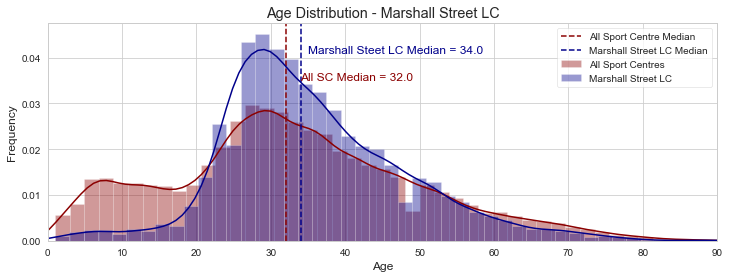

In [27]:
# (2)
# AGE DISTRUBTION - compared with SC average
plt.figure(figsize=(12, 4))

# distplot() determines the size of the bins according to the Freedman-Diaconis rule

A=allSC_nozero['Age']
Anan=A[~np.isnan(A)] # Remove the NaNs
medianA=allSC_nozero['Age'].median()

A2=marsh_nozero['Age']
Anan2=A2[~np.isnan(A2)] # Remove the NaNs
medianB=marsh_nozero['Age'].median()

op1 = sns.distplot(Anan, hist=True, color='darkred')
op1.axvline(medianA, color='darkred', linestyle='--')
op1.text(medianA + 1.9,.035, 'All SC Median = ' + str(medianA), fontsize = 12, color='darkred')

op2 = sns.distplot(Anan2, hist=True, color='darkblue')
op2.axvline(medianB, color='darkblue', linestyle='--')
op2.text(medianB + 1,.041, 'Marshall Steet LC Median = ' + str(medianB), fontsize = 12, color='darkblue')

op1.set(ylabel="Frequency")
plt.xlim([0,90])
plt.legend({"All Sport Centre Median": medianA, "Marshall Street LC Median": medianB, "All Sport Centres": op1, "Marshall Street LC": op2});
op = plt.title('Age Distribution - Marshall Street LC')

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


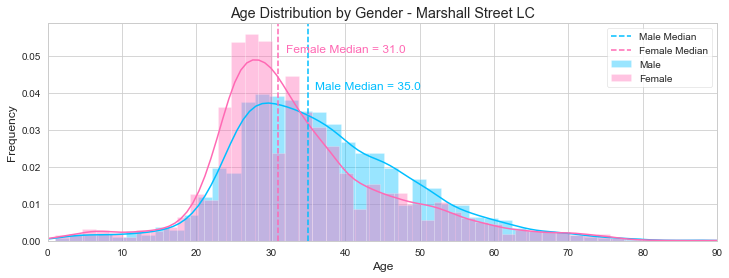

In [28]:
# (3)
# Plot age distribution by gender

# Select only the finite numbers from the non-zero dataframe bc histogram can't handle NaNs
marsh_nozero= marsh_nozero[np.isfinite(marsh_nozero['Age'])]

plt.figure(figsize=(12, 4))

medianM=marsh_nozero.Age[marsh_nozero.Gender=='Male'].median()
medianF=marsh_nozero.Age[marsh_nozero.Gender=='Female'].median()


ax3=sns.distplot(marsh_nozero.Age[marsh_nozero.Gender=='Male'], label='Men', color='deepskyblue')
ax4=sns.distplot(marsh_nozero.Age[marsh_nozero.Gender=='Female'], label='Women', color='hotpink')


plt.axvline(medianM, color='deepskyblue', linestyle='--', label = "Median")
plt.axvline(medianF, color='hotpink', linestyle='--', label = "Median")
plt.text(medianM + 1,.041, 'Male Median = ' + str(medianM), fontsize = 12, color='deepskyblue')
plt.text(medianF + 1,.051, 'Female Median = ' + str(medianF), fontsize = 12, color='hotpink')


plt.xlim([0,90])
ax3.set(ylabel="Frequency")
plt.legend({"Male Median": medianM, "Female Median": medianF, "Male": ax3, "Female": ax4});
plt.title('Age Distribution by Gender - Marshall Street LC');
plt.show()

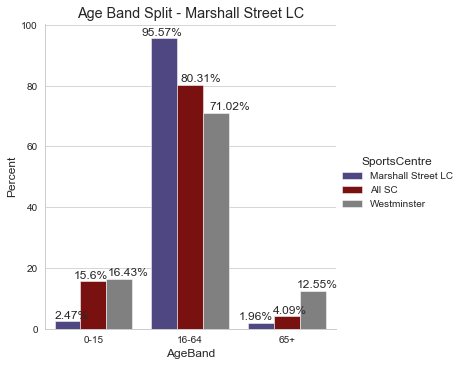

In [29]:
# (4)
# Marshall Street age band distribution - percentage


# Grab only the All SC counts/percentages for chart
SC_bandchart=SC_bandgroup[(SC_bandgroup['SportsCentre'] == 'All SC') | (SC_bandgroup['SportsCentre'] =='Marshall Street LC') | (SC_bandgroup['SportsCentre'] =='Westminster')]
SC_bandchart= SC_bandchart.sort_values(by=['AgeBand'])
pct1 = SC_bandchart.iloc[0]['pct']
pct2 = SC_bandchart.iloc[1]['pct']
pct3 = SC_bandchart.iloc[2]['pct']
pct4 = SC_bandchart.iloc[3]['pct']
pct5 = SC_bandchart.iloc[4]['pct']
pct6 = SC_bandchart.iloc[5]['pct']
pct7 = SC_bandchart.iloc[6]['pct']
pct8 = SC_bandchart.iloc[7]['pct']
pct9 = SC_bandchart.iloc[8]['pct']

ax = sns.catplot(x="AgeBand", y="pct", hue="SportsCentre", kind="bar", palette=['darkslateblue','darkred', 'grey'],data=SC_bandchart);# - to be used for comparisons
plt.text(-.4,pct1+1, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(-.2,pct2+1, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(0.15,pct3+1, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.9,pct4+1, str(pct4.round(2)) + '%', fontsize = 12)
plt.text(0.5,pct5+1, str(pct5.round(2)) + '%', fontsize = 12)
plt.text(1.2,pct6+1, str(pct6.round(2)) + '%', fontsize = 12)
plt.text(1.5,pct7+1, str(pct7.round(2)) + '%', fontsize = 12)
plt.text(1.85,pct8+1, str(pct8.round(2)) + '%', fontsize = 12)
plt.text(2.1,pct9+1, str(pct9.round(2)) + '%', fontsize = 12)


ax.set(ylabel="Percent")
plt.title('Age Band Split - Marshall Street LC');

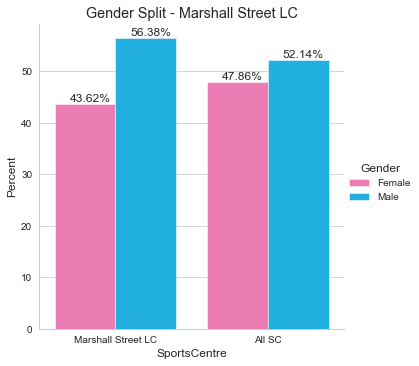

In [30]:
# (5)
# Marshall Street gender percentage split of data 

# Break out chart by multiple variables
SC_genchart=SC_gengroup[(SC_gengroup['SportsCentre'] == 'All SC') | (SC_gengroup['SportsCentre'] == 'Marshall Street LC')]
pct1 = SC_genchart.iloc[0]['pct']
pct2 = SC_genchart.iloc[1]['pct']
pct3 = SC_genchart.iloc[2]['pct']
pct4 = SC_genchart.iloc[3]['pct']

ax = sns.catplot(x="SportsCentre", y="pct", hue="Gender", kind="bar", order = ['Marshall Street LC','All SC'],palette =['hotpink','deepskyblue'],data=SC_genchart);# - to be used for comparisons
plt.text(0.7,pct1+0.5, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(-0.3,pct2+0.5, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(1.1,pct3+0.5, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.1,pct4+0.5, str(pct4.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Gender Split - Marshall Street LC');

## Seymour LC <a name="sey"></a>

In [31]:
# Drop duplicate MemberIDs so we are only counting each member once

# First break off the '0' MembershipIDs since they are unique and we will keep them
sey_0 = sey.loc[sey['MembershipID'] == 0]

# Drop duplicates from the rest of the main dataset, keeping just the last instance of MembershipID
sey_IDdrop = sey.drop_duplicates(['MembershipID'], keep='last')

# Re-combine the two dataframes
frames = [sey_0, sey_IDdrop]
sey = pd.concat(frames)

# DROP the 'Not Recorded' Gender values, and remove missing ages as well
sey_allgen = sey[sey.Gender != 'Not Recorded']

# Drop the 'Unknown' EthnicGroup from the analysis
sey_allethn = sey[sey.EthnicGroup != 'Unknown']

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


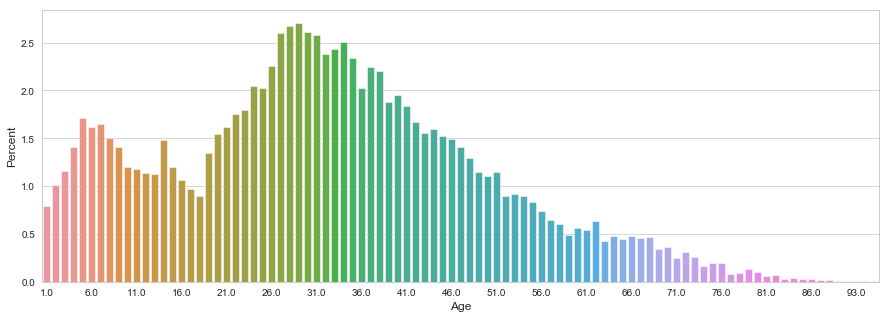

In [32]:
# (1)
#Bar chart of age by percentage
plt.figure(figsize=(15, 5))

# DROP the 0 values for the distribution chart
sey_nozero = sey[sey.Age != 0]

ax = sns.barplot(x="Age", y="Age", data=sey_nozero, estimator=lambda x: len(x) / len(sey_nozero) * 100)
ax.set(ylabel="Percent")
# Adjusts tick labeling
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


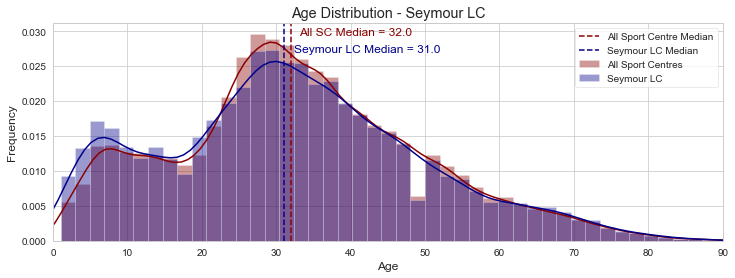

In [33]:
# (2)
# AGE DISTRUBTION - compared with SC average
plt.figure(figsize=(12, 4))

A=allSC_nozero['Age']
Anan=A[~np.isnan(A)] # Remove the NaNs
medianA=allSC_nozero['Age'].median()

A2=sey_nozero['Age']
Anan2=A2[~np.isnan(A2)] # Remove the NaNs
medianB=sey_nozero['Age'].median()

op1 = sns.distplot(Anan, hist=True, color='darkred')
op1.axvline(medianA, color='darkred', linestyle='--')
op1.text(medianA + 1,.0295, 'All SC Median = ' + str(medianA), fontsize = 12, color='darkred')

op2 = sns.distplot(Anan2, hist=True, color='darkblue')
op2.axvline(medianB, color='darkblue', linestyle='--')
op2.text(medianB + 1.4,.027, 'Seymour LC Median = ' + str(medianB), fontsize = 12, color='darkblue')

op1.set(ylabel="Frequency")
plt.xlim([0,90])
plt.legend({"All Sport Centre Median": medianA, "Seymour LC Median": medianB, "All Sport Centres": op1, "Seymour LC": op2});
op = plt.title('Age Distribution - Seymour LC')

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


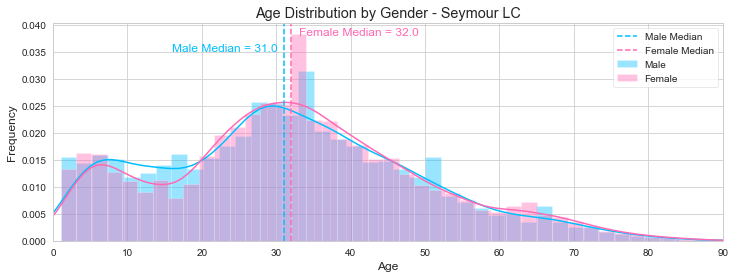

In [34]:
# (3)
# Seaborn plot age distribution by gender 

# selects only the finite numbers from the non-zero dataframe bc histogram can't handle NaNs
sey_nozero= sey_nozero[np.isfinite(sey_nozero['Age'])]

plt.figure(figsize=(12, 4))

medianM=sey_nozero.Age[sey_nozero.Gender=='Male'].median()
medianF=sey_nozero.Age[sey_nozero.Gender=='Female'].median()

ax3=sns.distplot(sey_nozero.Age[sey_nozero.Gender=='Male'], label='Men',color='deepskyblue')
ax4=sns.distplot(sey_nozero.Age[sey_nozero.Gender=='Female'], label='Women',color='hotpink')


plt.axvline(medianM, color='deepskyblue', linestyle='--', label = "Median")
plt.axvline(medianF, color='hotpink', linestyle='--', label = "Median")

plt.text(medianM - 15,.0351, 'Male Median = ' + str(medianM), fontsize = 12, color='deepskyblue')
plt.text(medianF + 1,.038, 'Female Median = ' + str(medianF), fontsize = 12, color='hotpink')


plt.xlim([0,90])
ax3.set(ylabel="Frequency")
plt.legend({"Male Median": medianM, "Female Median": medianF, "Male": ax3, "Female": ax4});
plt.title('Age Distribution by Gender - Seymour LC');
plt.show()

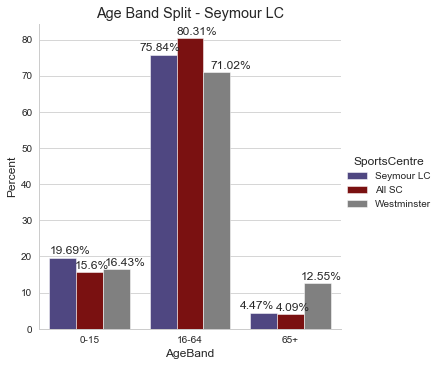

In [35]:
# (4)
# Age band distribution - percentage

# Grab only the All SC counts/percentages for chart
SC_bandchart=SC_bandgroup[(SC_bandgroup['SportsCentre'] == 'All SC') | (SC_bandgroup['SportsCentre'] =='Seymour LC') | (SC_bandgroup['SportsCentre'] =='Westminster')]
SC_bandchart= SC_bandchart.sort_values(by=['AgeBand'])
pct1 = SC_bandchart.iloc[0]['pct']
pct2 = SC_bandchart.iloc[1]['pct']
pct3 = SC_bandchart.iloc[2]['pct']
pct4 = SC_bandchart.iloc[3]['pct']
pct5 = SC_bandchart.iloc[4]['pct']
pct6 = SC_bandchart.iloc[5]['pct']
pct7 = SC_bandchart.iloc[6]['pct']
pct8 = SC_bandchart.iloc[7]['pct']
pct9 = SC_bandchart.iloc[8]['pct']

ax = sns.catplot(x="AgeBand", y="pct", hue="SportsCentre", kind="bar", palette=['darkslateblue','darkred','grey'],data=SC_bandchart);# - to be used for comparisons
plt.text(-.4,pct1+1, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(-.15,pct2+1, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(0.15,pct3+1, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.5,pct4+1, str(pct4.round(2)) + '%', fontsize = 12)
plt.text(0.86,pct5+1, str(pct5.round(2)) + '%', fontsize = 12)
plt.text(1.2,pct6+1, str(pct6.round(2)) + '%', fontsize = 12)
plt.text(1.5,pct7+1, str(pct7.round(2)) + '%', fontsize = 12)
plt.text(1.85,pct8+1, str(pct8.round(2)) + '%', fontsize = 12)
plt.text(2.1,pct9+1, str(pct9.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Age Band Split - Seymour LC');

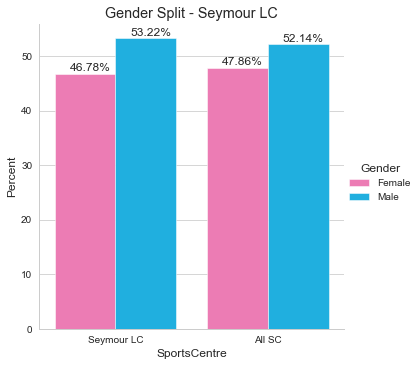

In [36]:
# (5)
# Gender percentage split of data 

# Break out chart by multiple variables
SC_genchart=SC_gengroup[(SC_gengroup['SportsCentre'] == 'All SC') | (SC_gengroup['SportsCentre'] =='Seymour LC')]
pct1 = SC_genchart.iloc[0]['pct']
pct2 = SC_genchart.iloc[1]['pct']
pct3 = SC_genchart.iloc[2]['pct']
pct4 = SC_genchart.iloc[3]['pct']

ax = sns.catplot(x="SportsCentre", y="pct", hue="Gender", kind="bar", palette = ['hotpink','deepskyblue'],data=SC_genchart);# - to be used for comparisons
plt.text(-0.3,pct1+0.5, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(0.7,pct2+0.5, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(1.1,pct3+0.5, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.1,pct4+0.5, str(pct4.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Gender Split - Seymour LC');

## Jubilee SC <a name="jub"></a>

In [37]:
# Drop duplicate MemberIDs so we are only counting each member once

# First break off the '0' MembershipIDs since they are unique and we will keep them
jub_0 = jub.loc[jub['MembershipID'] == 0]

# Drop duplicates from the rest of the main dataset, keeping just the last instance of MembershipID
jub_IDdrop = jub.drop_duplicates(['MembershipID'], keep='last')

# Re-combine the two dataframes
frames = [jub_0, jub_IDdrop]
jub = pd.concat(frames)

# DROP the 'Not Recorded' Gender values, and remove missing ages as well
jub_allgen = jub[jub.Gender != 'Not Recorded']

# Drop the 'Unknown' EthnicGroup from the analysis
jub_allethn = jub[jub.EthnicGroup != 'Unknown']

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


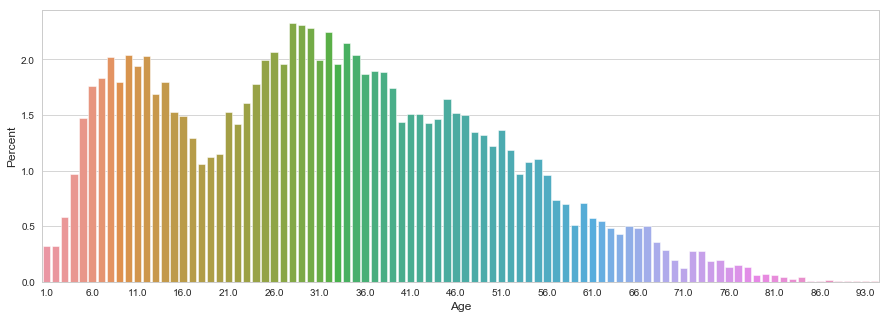

In [38]:
# (1)
#Bar chart of age by percentage
plt.figure(figsize=(15, 5))

# DROP the 0 values for the distribution chart
jub_nozero = jub[jub.Age != 0]

ax = sns.barplot(x="Age", y="Age", data=jub_nozero, estimator=lambda x: len(x) / len(jub_nozero) * 100)
ax.set(ylabel="Percent")
# Adjusts tick labeling
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


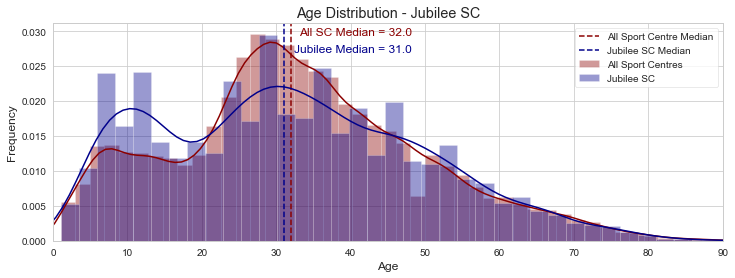

In [39]:
# (2)
# AGE DISTRUBTION - compared with SC average
plt.figure(figsize=(12, 4))

A=allSC_nozero['Age']
Anan=A[~np.isnan(A)] # Remove the NaNs
medianA=allSC_nozero['Age'].median()

A2=jub_nozero['Age']
Anan2=A2[~np.isnan(A2)] # Remove the NaNs
medianB=jub_nozero['Age'].median()

op1 = sns.distplot(Anan, hist=True, color='darkred')
op1.axvline(medianA, color='darkred', linestyle='--')
op1.text(medianA + 1,.0295, 'All SC Median = ' + str(medianA), fontsize = 12, color='darkred')

op2 = sns.distplot(Anan2, hist=True, color='darkblue')
op2.axvline(medianB, color='darkblue', linestyle='--')
op2.text(medianB + 1.4,.027, 'Jubilee Median = ' + str(medianB), fontsize = 12, color='darkblue')

op1.set(ylabel="Frequency")
plt.xlim([0,90])
plt.legend({"All Sport Centre Median": medianA, "Jubilee SC Median": medianB, "All Sport Centres": op1, "Jubilee SC": op2});
op = plt.title('Age Distribution - Jubilee SC')

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


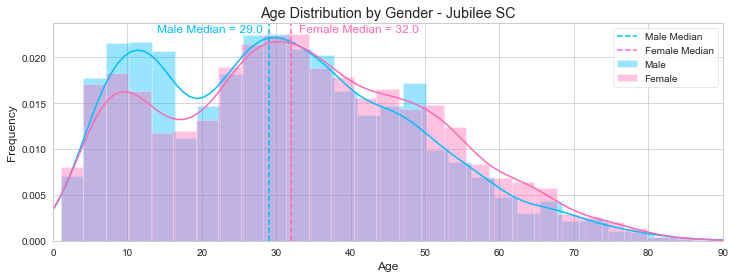

In [40]:
# (3)
# Seaborn plot age distribution by gender 

# selects only the finite numbers from the non-zero dataframe bc histogram can't handle NaNs
jub_nozero= jub_nozero[np.isfinite(jub_nozero['Age'])]

plt.figure(figsize=(12, 4))

medianM=jub_nozero.Age[jub_nozero.Gender=='Male'].median()
medianF=jub_nozero.Age[jub_nozero.Gender=='Female'].median()

ax3=sns.distplot(jub_nozero.Age[jub_nozero.Gender=='Male'], label='Men', color='deepskyblue')
ax4=sns.distplot(jub_nozero.Age[jub_nozero.Gender=='Female'], label='Women', color='hotpink')

plt.axvline(medianM, color='deepskyblue', linestyle='--', label = "Median")
plt.axvline(medianF, color='hotpink', linestyle='--', label = "Median")

plt.text(medianM - 15,.0228, 'Male Median = ' + str(medianM), fontsize = 12, color='deepskyblue')
plt.text(medianF + 1,.0228, 'Female Median = ' + str(medianF), fontsize = 12, color='hotpink')

plt.xlim([0,90])
ax3.set(ylabel="Frequency")
plt.legend({"Male Median": medianM, "Female Median": medianF, "Male": ax3, "Female": ax4});
plt.title('Age Distribution by Gender - Jubilee SC');
plt.show()

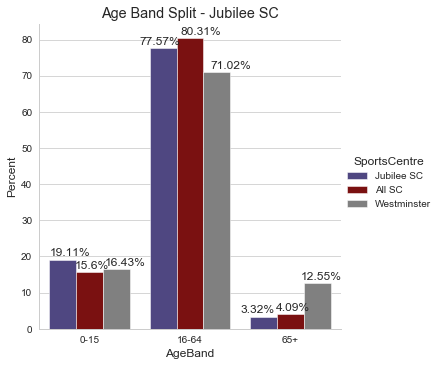

In [41]:
# (4)
# Age band distribution - percentage

# Grab only the All SC counts/percentages for chart
SC_bandchart=SC_bandgroup[(SC_bandgroup['SportsCentre'] == 'All SC') | (SC_bandgroup['SportsCentre'] =='Jubilee SC')| (SC_bandgroup['SportsCentre'] =='Westminster')]
SC_bandchart= SC_bandchart.sort_values(by=['AgeBand'])
pct1 = SC_bandchart.iloc[0]['pct']
pct2 = SC_bandchart.iloc[1]['pct']
pct3 = SC_bandchart.iloc[2]['pct']
pct4 = SC_bandchart.iloc[3]['pct']
pct5 = SC_bandchart.iloc[4]['pct']
pct6 = SC_bandchart.iloc[5]['pct']
pct7 = SC_bandchart.iloc[6]['pct']
pct8 = SC_bandchart.iloc[7]['pct']
pct9 = SC_bandchart.iloc[8]['pct']

ax = sns.catplot(x="AgeBand", y="pct", hue="SportsCentre", kind="bar", palette=['darkslateblue','darkred', 'grey'],data=SC_bandchart);# - to be used for comparisons
plt.text(-.4,pct1+1, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(-.15,pct2+1, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(0.15,pct3+1, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.9,pct4+1, str(pct4.round(2)) + '%', fontsize = 12)
plt.text(0.5,pct5+1, str(pct5.round(2)) + '%', fontsize = 12)
plt.text(1.2,pct6+1, str(pct6.round(2)) + '%', fontsize = 12)
plt.text(1.5,pct7+1, str(pct7.round(2)) + '%', fontsize = 12)
plt.text(1.85,pct8+1, str(pct8.round(2)) + '%', fontsize = 12)
plt.text(2.1,pct9+1, str(pct9.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Age Band Split - Jubilee SC');

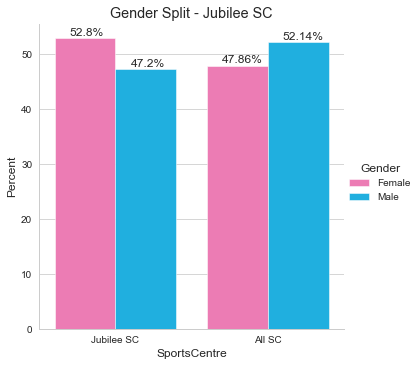

In [42]:
# (5)
# Gender percentage split of data 

# Break out chart by multiple variables
SC_genchart=SC_gengroup[(SC_gengroup['SportsCentre'] == 'All SC') | (SC_gengroup['SportsCentre'] =='Jubilee SC')]
pct1 = SC_genchart.iloc[0]['pct']
pct2 = SC_genchart.iloc[1]['pct']
pct3 = SC_genchart.iloc[2]['pct']
pct4 = SC_genchart.iloc[3]['pct']

ax = sns.catplot(x="SportsCentre", y="pct", hue="Gender", kind="bar", palette = ['hotpink','deepskyblue'],data=SC_genchart);# - to be used for comparisons
plt.text(-0.3,pct1+0.5, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(0.7,pct2+0.5, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(1.1,pct3+0.5, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.1,pct4+0.5, str(pct4.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Gender Split - Jubilee SC');

## Little Venice SC <a name="lv"></a>

In [43]:
# Drop duplicate MemberIDs so we are only counting each member once

# First break off the '0' MembershipIDs since they are unique and we will keep them
lv_0 = lv.loc[lv['MembershipID'] == 0]

# Drop duplicates from the rest of the main dataset, keeping just the last instance of MembershipID
lv_IDdrop = lv.drop_duplicates(['MembershipID'], keep='last')

# Re-combine the two dataframes
frames = [lv_0, lv_IDdrop]
lv = pd.concat(frames)

# DROP the 'Not Recorded' Gender values
lv_allgen = lv[lv.Gender != 'Not Recorded']

# Drop the 'Unknown' EthnicGroup from the analysis
lv_allethn = lv[lv.EthnicGroup != 'Unknown']

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


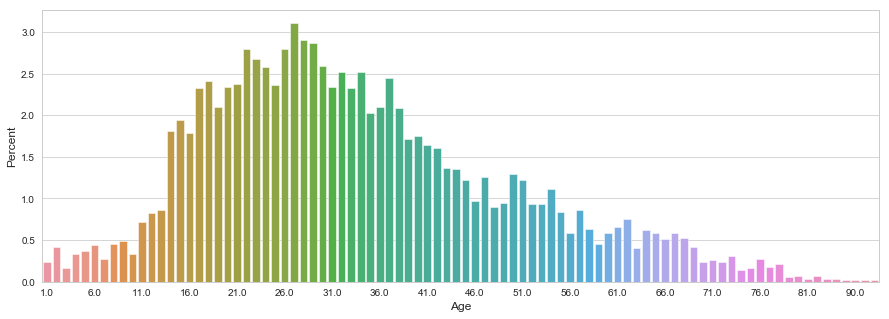

In [44]:
# (1)
#Bar chart of age by percentage
plt.figure(figsize=(15, 5))

# DROP the 0 values for the distribution chart
lv_nozero = lv[lv.Age != 0]

ax = sns.barplot(x="Age", y="Age", data=lv_nozero, estimator=lambda x: len(x) / len(lv_nozero) * 100)
ax.set(ylabel="Percent")
# Adjusts tick labeling
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


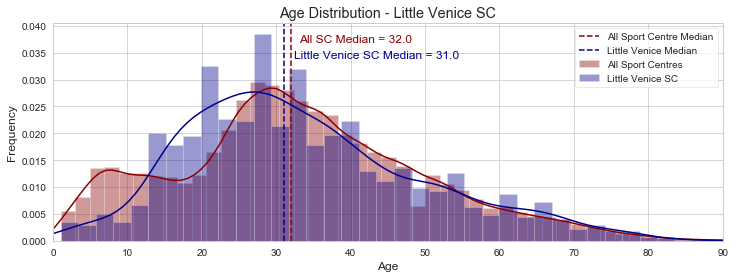

In [45]:
# (2)
# AGE DISTRUBTION - compared with SC average
# Fine to use nozero dataset bc code in this removes the NaNs
plt.figure(figsize=(12, 4))

A=allSC_nozero['Age']
Anan=A[~np.isnan(A)] # Remove the NaNs
medianA=allSC_nozero['Age'].median()

A2=lv_nozero['Age']
Anan2=A2[~np.isnan(A2)] # Remove the NaNs
medianB=lv_nozero['Age'].median()

op1 = sns.distplot(Anan, hist=True, color='darkred')
op1.axvline(medianA, color='darkred', linestyle='--')
op1.text(medianA + 1,.037, 'All SC Median = ' + str(medianA), fontsize = 12, color='darkred')

op2 = sns.distplot(Anan2, hist=True, color='darkblue')
op2.axvline(medianB, color='darkblue', linestyle='--')
op2.text(medianB + 1.4,.034, 'Little Venice SC Median = ' + str(medianB), fontsize = 12, color='darkblue')

op1.set(ylabel="Frequency")
plt.xlim([0,90])
plt.legend({"All Sport Centre Median": medianA, "Little Venice Median": medianB, "All Sport Centres": op1, "Little Venice SC": op2});
op = plt.title('Age Distribution - Little Venice SC')

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


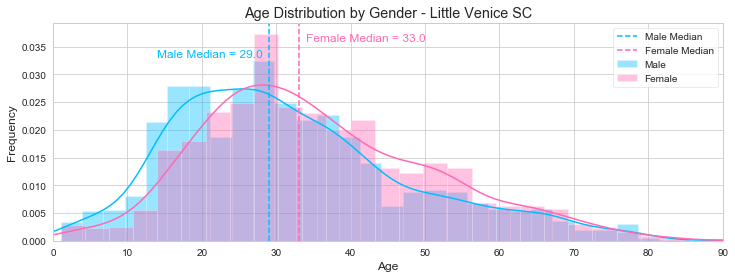

In [46]:
# (3)
# Seaborn plot age distribution by gender 

# selects only the finite numbers from the non-zero dataframe bc histogram can't handle NaNs
lv_nozero= lv_nozero[np.isfinite(lv_nozero['Age'])]

plt.figure(figsize=(12, 4))

medianM=lv_nozero.Age[lv_nozero.Gender=='Male'].median()
medianF=lv_nozero.Age[lv_nozero.Gender=='Female'].median()

ax3=sns.distplot(lv_nozero.Age[lv_nozero.Gender=='Male'], label='Men',color='deepskyblue')
ax4=sns.distplot(lv_nozero.Age[lv_nozero.Gender=='Female'], label='Women',color='hotpink')

plt.axvline(medianM, color='deepskyblue', linestyle='--', label = "Median")
plt.axvline(medianF, color='hotpink', linestyle='--', label = "Median")

plt.text(medianM - 15,.033, 'Male Median = ' + str(medianM), fontsize = 12, color='deepskyblue')
plt.text(medianF + 1,.036, 'Female Median = ' + str(medianF), fontsize = 12, color='hotpink')

plt.xlim([0,90])
ax3.set(ylabel="Frequency")
plt.legend({"Male Median": medianM, "Female Median": medianF, "Male": ax3, "Female": ax4});
plt.title('Age Distribution by Gender - Little Venice SC');
plt.show()

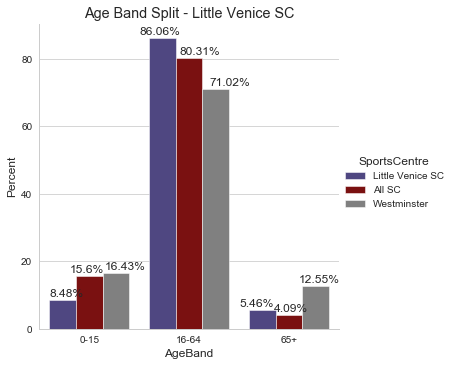

In [47]:
# (4)
# Age band distribution - percentage

# Grab only the All SC counts/percentages for chart
SC_bandchart=SC_bandgroup[(SC_bandgroup['SportsCentre'] == 'All SC') | (SC_bandgroup['SportsCentre'] =='Little Venice SC')| (SC_bandgroup['SportsCentre'] =='Westminster')]
SC_bandchart= SC_bandchart.sort_values(by=['AgeBand'])
pct1 = SC_bandchart.iloc[0]['pct']
pct2 = SC_bandchart.iloc[1]['pct']
pct3 = SC_bandchart.iloc[2]['pct']
pct4 = SC_bandchart.iloc[3]['pct']
pct5 = SC_bandchart.iloc[4]['pct']
pct6 = SC_bandchart.iloc[5]['pct']
pct7 = SC_bandchart.iloc[6]['pct']
pct8 = SC_bandchart.iloc[7]['pct']
pct9 = SC_bandchart.iloc[8]['pct']

ax = sns.catplot(x="AgeBand", y="pct", hue="SportsCentre", kind="bar", palette=['darkslateblue','darkred', 'grey'], data=SC_bandchart);# - to be used for comparisons
plt.text(-.4,pct1+1, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(-.2,pct2+1, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(0.15,pct3+1, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.9,pct4+1, str(pct4.round(2)) + '%', fontsize = 12)
plt.text(0.5,pct5+1, str(pct5.round(2)) + '%', fontsize = 12)
plt.text(1.2,pct6+1, str(pct6.round(2)) + '%', fontsize = 12)
plt.text(1.5,pct7+1, str(pct7.round(2)) + '%', fontsize = 12)
plt.text(1.85,pct8+1, str(pct8.round(2)) + '%', fontsize = 12)
plt.text(2.1,pct9+1, str(pct9.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Age Band Split - Little Venice SC');

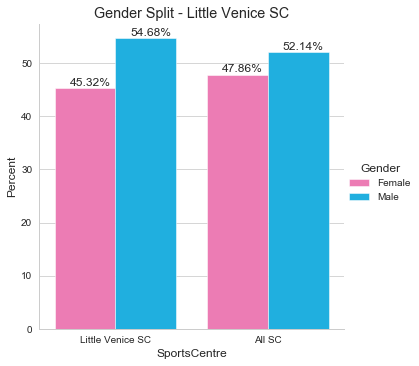

In [48]:
# (5)
# Gender percentage split of data 

# Break out chart by multiple variables
SC_genchart=SC_gengroup[(SC_gengroup['SportsCentre'] == 'All SC') | (SC_gengroup['SportsCentre'] =='Little Venice SC')]
pct1 = SC_genchart.iloc[0]['pct']
pct2 = SC_genchart.iloc[1]['pct']
pct3 = SC_genchart.iloc[2]['pct']
pct4 = SC_genchart.iloc[3]['pct']

ax = sns.catplot(x="SportsCentre", y="pct", hue="Gender", kind="bar", order = ['Little Venice SC','All SC'],palette = ['hotpink','deepskyblue'],data=SC_genchart);# - to be used for comparisons
plt.text(0.7,pct1+0.5, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(-0.3,pct2+0.5, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(1.1,pct3+0.5, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.1,pct4+0.5, str(pct4.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Gender Split - Little Venice SC');

## Moberly SC <a name="mob"></a>

In [49]:
# Drop duplicate MemberIDs so we are only counting each member once

# First break off the '0' MembershipIDs since they are unique and we will keep them
mob_0 = mob.loc[mob['MembershipID'] == 0]

# Drop duplicates from the rest of the main dataset, keeping just the last instance of MembershipID
mob_IDdrop = mob.drop_duplicates(['MembershipID'], keep='last')

# Re-combine the two dataframes
frames = [mob_0, mob_IDdrop]
mob = pd.concat(frames)

# DROP the 'Not Recorded' Gender values
mob_allgen = mob[mob.Gender != 'Not Recorded']

# Drop the 'Unknown' EthnicGroup from the analysis
mob_allethn = mob[mob.EthnicGroup != 'Unknown']

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


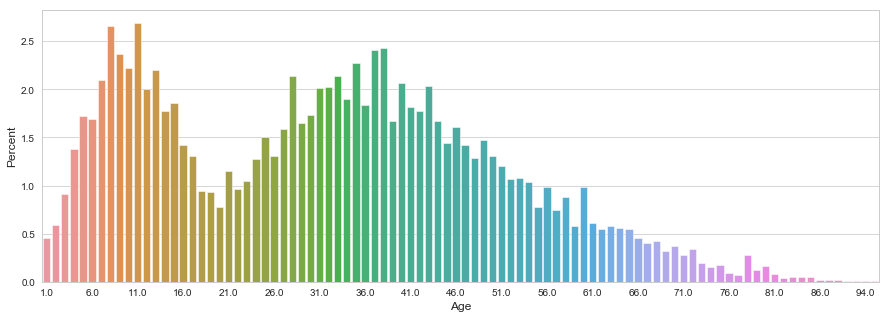

In [50]:
# (1)
#Bar chart of age by percentage
plt.figure(figsize=(15, 5))

# DROP the 0 values for the distribution chart
mob_nozero = mob[mob.Age != 0]

ax = sns.barplot(x="Age", y="Age", data=mob_nozero, estimator=lambda x: len(x) / len(mob_nozero) * 100)
ax.set(ylabel="Percent")
# Adjusts tick labeling
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


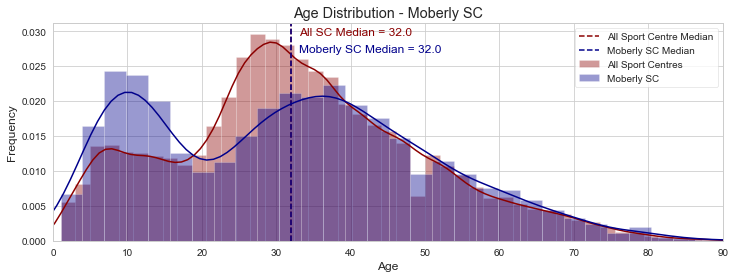

In [51]:
# (2)
# AGE DISTRUBTION - compared with SC average
plt.figure(figsize=(12, 4))

A=allSC_nozero['Age']
Anan=A[~np.isnan(A)] # Remove the NaNs
medianA=allSC_nozero['Age'].median()

A2=mob_nozero['Age']
Anan2=A2[~np.isnan(A2)] # Remove the NaNs
medianB=mob_nozero['Age'].median()

op1 = sns.distplot(Anan, hist=True, color='darkred')
op1.axvline(medianA, color='darkred', linestyle='--')
op1.text(medianA + 1,.0295, 'All SC Median = ' + str(medianA), fontsize = 12, color='darkred')

op2 = sns.distplot(Anan2, hist=True, color='darkblue')
op2.axvline(medianB, color='darkblue', linestyle='--')
op2.text(medianB + 1,.027, 'Moberly SC Median = ' + str(medianB), fontsize = 12, color='darkblue')

op1.set(ylabel="Frequency")
plt.xlim([0,90])
plt.legend({"All Sport Centre Median": medianA, "Moberly SC Median": medianB, "All Sport Centres": op1, "Moberly SC": op2});
op = plt.title('Age Distribution - Moberly SC')

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


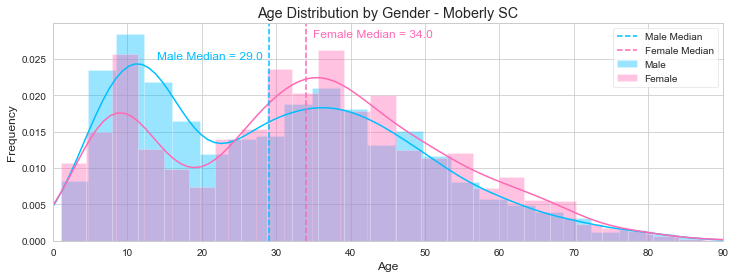

In [52]:
# (3)
# Seaborn plot age distribution by gender 

# selects only the finite numbers from the non-zero dataframe bc histogram can't handle NaNs
mob_nozero= mob_nozero[np.isfinite(mob_nozero['Age'])]

plt.figure(figsize=(12, 4))

medianM=mob_nozero.Age[mob_nozero.Gender=='Male'].median()
medianF=mob_nozero.Age[mob_nozero.Gender=='Female'].median()

ax3=sns.distplot(mob_nozero.Age[mob_nozero.Gender=='Male'], label='Men', color='deepskyblue')
ax4=sns.distplot(mob_nozero.Age[mob_nozero.Gender=='Female'], label='Women',color='hotpink')

plt.axvline(medianM, color='deepskyblue', linestyle='--', label = "Median")
plt.axvline(medianF, color='hotpink', linestyle='--', label = "Median")

plt.text(medianM - 15,.025, 'Male Median = ' + str(medianM), fontsize = 12, color='deepskyblue')
plt.text(medianF + 1,.028, 'Female Median = ' + str(medianF), fontsize = 12, color='hotpink')

plt.xlim([0,90])
ax3.set(ylabel="Frequency")
plt.legend({"Male Median": medianM, "Female Median": medianF, "Male": ax3, "Female": ax4});
plt.title('Age Distribution by Gender - Moberly SC');
plt.show()

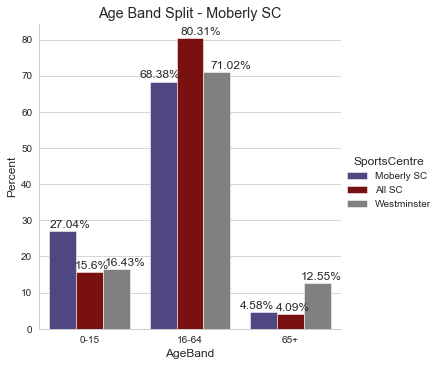

In [53]:
# (4)
# Age band distribution - percentage


# Grab only the All SC counts/percentages for chart
SC_bandchart=SC_bandgroup[(SC_bandgroup['SportsCentre'] == 'All SC') | (SC_bandgroup['SportsCentre'] =='Moberly SC') | (SC_bandgroup['SportsCentre'] =='Westminster')]
SC_bandchart= SC_bandchart.sort_values(by=['AgeBand'])
pct1 = SC_bandchart.iloc[0]['pct']
pct2 = SC_bandchart.iloc[1]['pct']
pct3 = SC_bandchart.iloc[2]['pct']
pct4 = SC_bandchart.iloc[3]['pct']
pct5 = SC_bandchart.iloc[4]['pct']
pct6 = SC_bandchart.iloc[5]['pct']
pct7 = SC_bandchart.iloc[6]['pct']
pct8 = SC_bandchart.iloc[7]['pct']
pct9 = SC_bandchart.iloc[8]['pct']

ax = sns.catplot(x="AgeBand", y="pct", hue="SportsCentre", kind="bar", palette=['darkslateblue','darkred', 'grey'],data=SC_bandchart);# - to be used for comparisons
plt.text(-.4,pct1+1, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(-.15,pct2+1, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(0.15,pct3+1, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.9,pct4+1, str(pct4.round(2)) + '%', fontsize = 12)
plt.text(0.5,pct5+1, str(pct5.round(2)) + '%', fontsize = 12)
plt.text(1.2,pct6+1, str(pct6.round(2)) + '%', fontsize = 12)
plt.text(1.5,pct7+1, str(pct7.round(2)) + '%', fontsize = 12)
plt.text(1.85,pct8+1, str(pct8.round(2)) + '%', fontsize = 12)
plt.text(2.1,pct9+1, str(pct9.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Age Band Split - Moberly SC');

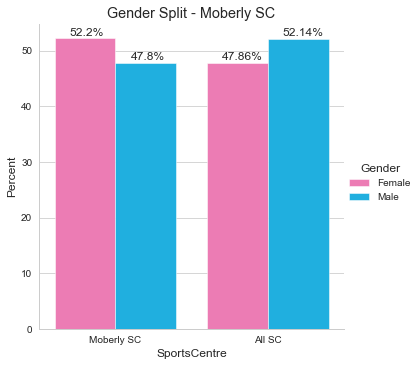

In [54]:
# (5)
# Gender percentage split of data 

# Break out chart by multiple variables
SC_genchart=SC_gengroup[(SC_gengroup['SportsCentre'] == 'All SC') | (SC_gengroup['SportsCentre'] == 'Moberly SC')]
pct1 = SC_genchart.iloc[0]['pct']
pct2 = SC_genchart.iloc[1]['pct']
pct3 = SC_genchart.iloc[2]['pct']
pct4 = SC_genchart.iloc[3]['pct']

ax = sns.catplot(x="SportsCentre", y="pct", hue="Gender", kind="bar", order = ['Moberly SC','All SC'], palette = ['hotpink','deepskyblue'],data=SC_genchart);# - to be used for comparisons
plt.text(0.7,pct1+0.5, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(-0.3,pct2+0.5, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(1.1,pct3+0.5, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.1,pct4+0.5, str(pct4.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Gender Split - Moberly SC');

## Paddington Rec Ground <a name="pad"></a>

In [55]:
# Drop duplicate MemberIDs so we are only counting each member once

# First break off the '0' MembershipIDs since they are unique and we will keep them
pad_0 = pad.loc[pad['MembershipID'] == 0]

# Drop duplicates from the rest of the main dataset, keeping just the last instance of MembershipID
pad_IDdrop = pad.drop_duplicates(['MembershipID'], keep='last')

# Re-combine the two dataframes
frames = [pad_0, pad_IDdrop]
pad = pd.concat(frames)

# DROP the 'Not Recorded' Gender values
pad_allgen = pad[pad.Gender != 'Not Recorded']

# Drop the 'Unknown' EthnicGroup from the analysis
pad_allethn = pad[pad.EthnicGroup != 'Unknown']

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


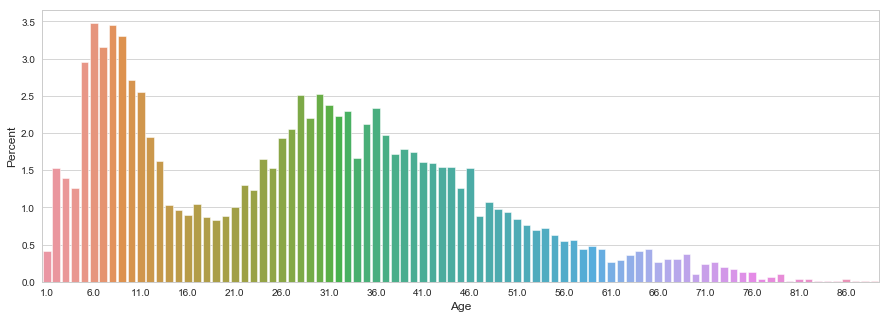

In [56]:
# (1)
#Bar chart of age by percentage
plt.figure(figsize=(15, 5))

# DROP the 0 values for the distribution chart
pad_nozero = pad[pad.Age != 0]

ax = sns.barplot(x="Age", y="Age", data=pad_nozero, estimator=lambda x: len(x) / len(pad_nozero) * 100)
ax.set(ylabel="Percent")
# Adjusts tick labeling
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


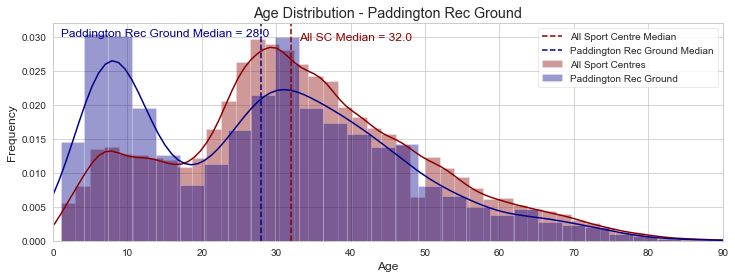

In [57]:
# (2)
# AGE DISTRUBTION - compared with SC average
plt.figure(figsize=(12, 4))

A=allSC_nozero['Age']
Anan=A[~np.isnan(A)] # Remove the NaNs
medianA=allSC_nozero['Age'].median()

A2=pad_nozero['Age']
Anan2=A2[~np.isnan(A2)] # Remove the NaNs
medianB=pad_nozero['Age'].median()

op1 = sns.distplot(Anan, hist=True, color='darkred')
op1.axvline(medianA, color='darkred', linestyle='--')
op1.text(medianA + 1,.0295, 'All SC Median = ' + str(medianA), fontsize = 12, color='darkred')

op2 = sns.distplot(Anan2, hist=True, color='darkblue')
op2.axvline(medianB, color='darkblue', linestyle='--')
op2.text(medianB - 27,.03, 'Paddington Rec Ground Median = ' + str(medianB), fontsize = 12, color='darkblue')

op1.set(ylabel="Frequency")
plt.xlim([0,90])
plt.legend({"All Sport Centre Median": medianA, "Paddington Rec Ground Median": medianB, "All Sport Centres": op1, "Paddington Rec Ground": op2});
op = plt.title('Age Distribution - Paddington Rec Ground')

C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


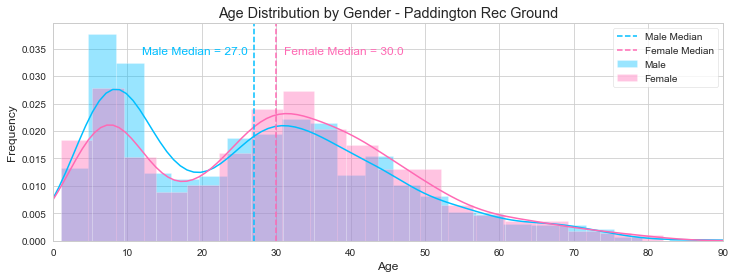

In [58]:
# (3)
# Seaborn plot age distribution by gender 

# selects only the finite numbers from the non-zero dataframe bc histogram can't handle NaNs
pad_nozero= pad_nozero[np.isfinite(pad_nozero['Age'])]

plt.figure(figsize=(12, 4))

medianM=pad_nozero.Age[pad_nozero.Gender=='Male'].median()
medianF=pad_nozero.Age[pad_nozero.Gender=='Female'].median()

ax3=sns.distplot(pad_nozero.Age[pad_nozero.Gender=='Male'], label='Men',color='deepskyblue')
ax4=sns.distplot(pad_nozero.Age[pad_nozero.Gender=='Female'], label='Women',color='hotpink')

plt.axvline(medianM, color='deepskyblue', linestyle='--', label = "Median")
plt.axvline(medianF, color='hotpink', linestyle='--', label = "Median")

plt.text(medianM - 15,.034, 'Male Median = ' + str(medianM), fontsize = 12, color='deepskyblue')
plt.text(medianF + 1,.034, 'Female Median = ' + str(medianF), fontsize = 12, color='hotpink')

plt.xlim([0,90])
ax3.set(ylabel="Frequency")
plt.legend({"Male Median": medianM, "Female Median": medianF, "Male": ax3, "Female": ax4});
plt.title('Age Distribution by Gender - Paddington Rec Ground');
plt.show()

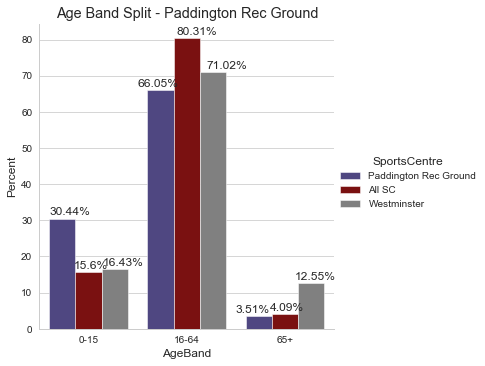

In [59]:
# (4)
# Age band distribution - percentage

# Grab only the All SC counts/percentages for chart
SC_bandchart=SC_bandgroup[(SC_bandgroup['SportsCentre'] == 'All SC') | (SC_bandgroup['SportsCentre'] =='Paddington Rec Ground') | (SC_bandgroup['SportsCentre'] =='Westminster')]
SC_bandchart= SC_bandchart.sort_values(by=['AgeBand'])
pct1 = SC_bandchart.iloc[0]['pct']
pct2 = SC_bandchart.iloc[1]['pct']
pct3 = SC_bandchart.iloc[2]['pct']
pct4 = SC_bandchart.iloc[3]['pct']
pct5 = SC_bandchart.iloc[4]['pct']
pct6 = SC_bandchart.iloc[5]['pct']
pct7 = SC_bandchart.iloc[6]['pct']
pct8 = SC_bandchart.iloc[7]['pct']
pct9 = SC_bandchart.iloc[8]['pct']

ax = sns.catplot(x="AgeBand", y="pct", hue="SportsCentre", kind="bar", palette=['darkslateblue','darkred', 'grey'],data=SC_bandchart);# - to be used for comparisons
plt.text(-.4,pct1+1, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(-.15,pct2+1, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(0.15,pct3+1, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.9,pct4+1, str(pct4.round(2)) + '%', fontsize = 12)
plt.text(0.5,pct5+1, str(pct5.round(2)) + '%', fontsize = 12)
plt.text(1.2,pct6+1, str(pct6.round(2)) + '%', fontsize = 12)
plt.text(1.5,pct7+1, str(pct7.round(2)) + '%', fontsize = 12)
plt.text(1.85,pct8+1, str(pct8.round(2)) + '%', fontsize = 12)
plt.text(2.1,pct9+1, str(pct9.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Age Band Split - Paddington Rec Ground');

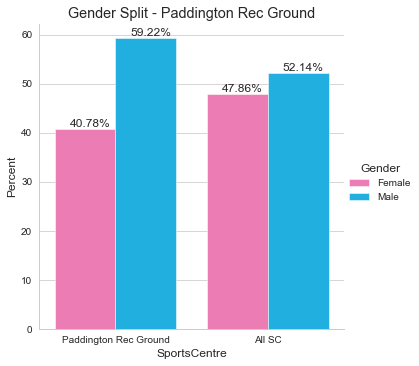

In [60]:
# (5)
# Gender percentage split of data 

# Break out chart by multiple variables
SC_genchart=SC_gengroup[(SC_gengroup['SportsCentre'] == 'All SC') | (SC_gengroup['SportsCentre'] == 'Paddington Rec Ground')]
pct1 = SC_genchart.iloc[0]['pct']
pct2 = SC_genchart.iloc[1]['pct']
pct3 = SC_genchart.iloc[2]['pct']
pct4 = SC_genchart.iloc[3]['pct']

ax = sns.catplot(x="SportsCentre", y="pct", hue="Gender", kind="bar", order = ['Paddington Rec Ground','All SC'], palette = ['hotpink','deepskyblue'], data=SC_genchart);# - to be used for comparisons
plt.text(0.7,pct1+0.5, str(pct1.round(2)) + '%', fontsize = 12)
plt.text(-0.3,pct2+0.5, str(pct2.round(2)) + '%', fontsize = 12)
plt.text(1.1,pct3+0.5, str(pct3.round(2)) + '%', fontsize = 12)
plt.text(0.1,pct4+0.5, str(pct4.round(2)) + '%', fontsize = 12)

ax.set(ylabel="Percent")
plt.title('Gender Split - Paddington Rec Ground');

## Annual/Seasonal <a name="year"></a>

In [61]:
# Convert TimeStamp object to datetime data category
fulldata['TimeStamp'] = pd.to_datetime(fulldata['TimeStamp'])

# Set the TimeStamp column as our index
timeindex = fulldata.set_index('TimeStamp')
timeindex.tail()

# Subset whole time period
year_2017 = timeindex['2016-06-08': '2018-08-31']

# Subset by each Sport Centre
porch_2017 = year_2017[year_2017.SportsCentre == 'Porchester Hall']
qm_2017 = year_2017[year_2017.SportsCentre == 'Queen Mother SC']
marsh_2017 = year_2017[year_2017.SportsCentre == 'Marshall Street LC']
sey_2017 = year_2017[year_2017.SportsCentre == 'Seymour LC']
jub_2017 = year_2017[year_2017.SportsCentre == 'Jubilee SC']
lv_2017 = year_2017[year_2017.SportsCentre == 'Little Venice SC']
mob_2017 = year_2017[year_2017.SportsCentre == 'Moberly SC']
pad_2017 = year_2017[year_2017.SportsCentre == 'Paddington Rec Ground']

# Reset index of 2017 subset and each SC
year_2017=year_2017.reset_index()
porch_2017=porch_2017.reset_index()
qm_2017=qm_2017.reset_index()
marsh_2017=marsh_2017.reset_index()
sey_2017=sey_2017.reset_index()
jub_2017=jub_2017.reset_index()
lv_2017=lv_2017.reset_index()
mob_2017=mob_2017.reset_index()
pad_2017=pad_2017.reset_index()

# Get counts by month, and reset the index in order to plot for each Sports Centre
resamp_2017 = year_2017.set_index('TimeStamp').resample('M').count()
resamp_2017 = resamp_2017.reset_index()

porch_resamp_2017 = porch_2017.set_index('TimeStamp').resample('M').count()
porch_resamp_2017 = porch_resamp_2017.reset_index()

qm_resamp_2017 = qm_2017.set_index('TimeStamp').resample('M').count()
qm_resamp_2017 = qm_resamp_2017.reset_index()

marsh_resamp_2017 = marsh_2017.set_index('TimeStamp').resample('M').count()
marsh_resamp_2017 = marsh_resamp_2017.reset_index()

sey_resamp_2017 = sey_2017.set_index('TimeStamp').resample('M').count()
sey_resamp_2017 = sey_resamp_2017.reset_index()

jub_resamp_2017 = jub_2017.set_index('TimeStamp').resample('M').count()
jub_resamp_2017 = jub_resamp_2017.reset_index()

lv_resamp_2017 = lv_2017.set_index('TimeStamp').resample('M').count()
lv_resamp_2017 = lv_resamp_2017.reset_index()

mob_resamp_2017 = mob_2017.set_index('TimeStamp').resample('M').count()
mob_resamp_2017 = mob_resamp_2017.reset_index()

pad_resamp_2017 = pad_2017.set_index('TimeStamp').resample('M').count()
pad_resamp_2017 = pad_resamp_2017.reset_index()




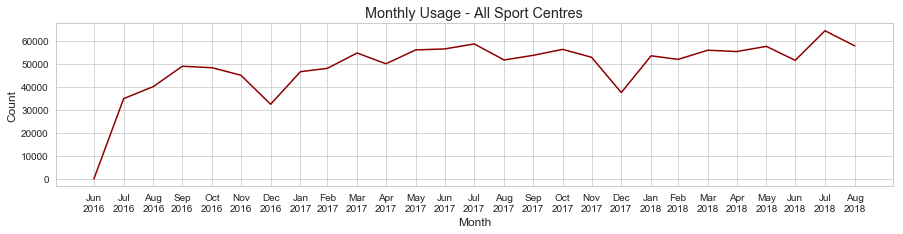

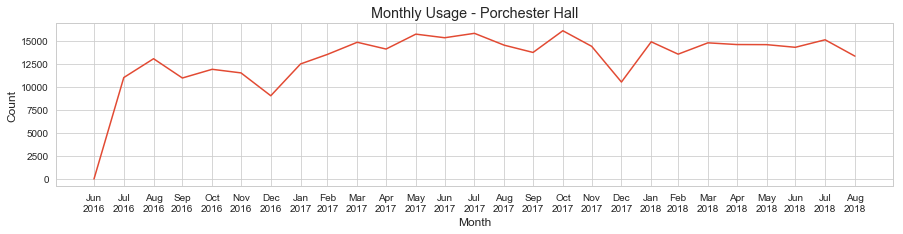

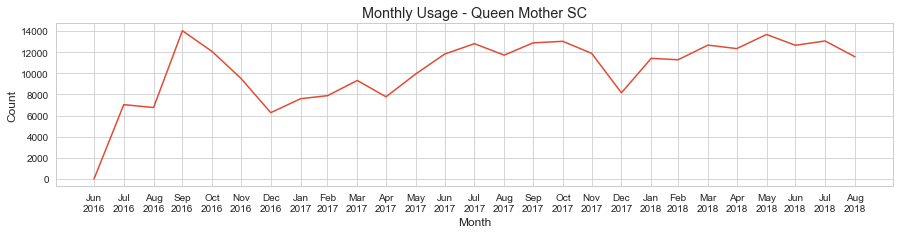

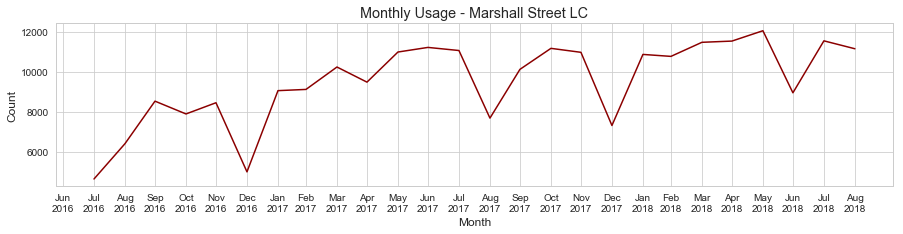

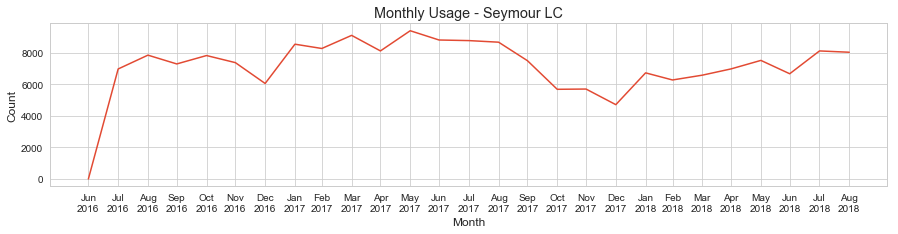

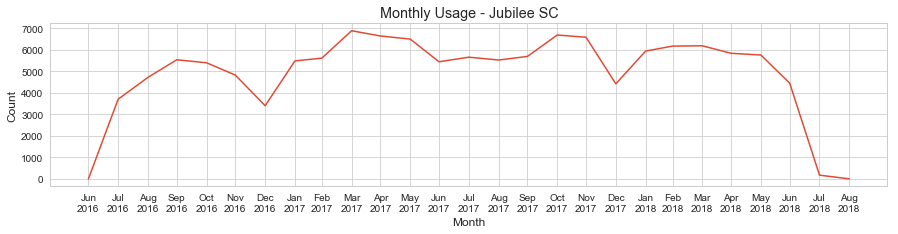

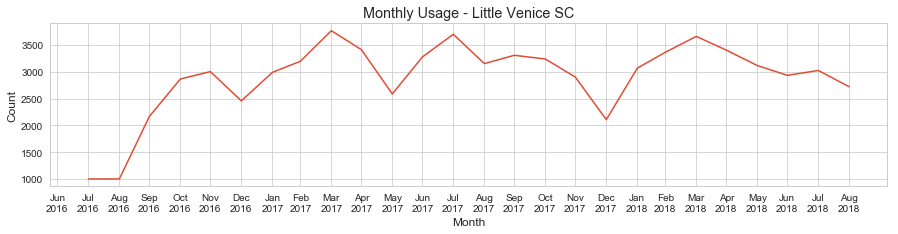

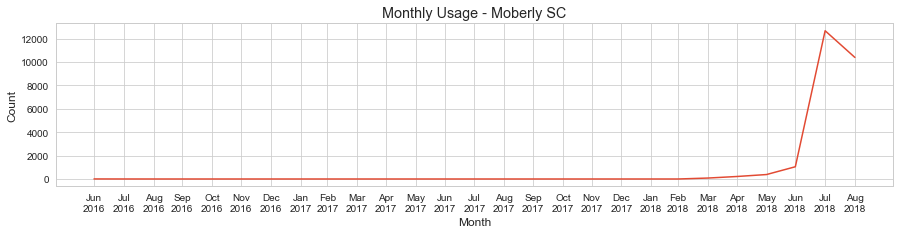

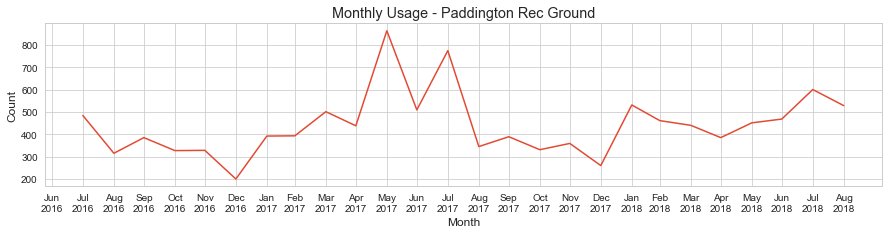

In [62]:
# Plot usage by month and Sports Centre

# All Sports Centres
plt.figure(figsize=(15, 3))

ax = sns.lineplot(x='TimeStamp', y="MembershipID", data=resamp_2017, color="darkred")
ax.set(xlabel="Month")
ax.set(ylabel="Count")
# Set major ticks with month names    
ax.set(xticks=resamp_2017.TimeStamp.values) 
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))
ax = plt.title('Monthly Usage - All Sport Centres')


# Porchester Hall
plt.figure(figsize=(15, 3))
ax = sns.lineplot(x='TimeStamp', y="MembershipID", data=porch_resamp_2017)
ax.set(xlabel="Month")
ax.set(ylabel="Count")
ax.set(xticks=resamp_2017.TimeStamp.values)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y')) # Set major ticks with month names   
ax = plt.title('Monthly Usage - Porchester Hall')

# Queen Mother SC
plt.figure(figsize=(15, 3))
ax = sns.lineplot(x='TimeStamp', y="MembershipID", data=qm_resamp_2017)
ax.set(xlabel="Month")
ax.set(ylabel="Count")
ax.set(xticks=resamp_2017.TimeStamp.values)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))  # Set major ticks with month names   
ax = plt.title('Monthly Usage - Queen Mother SC')


# Marshall Street LC
plt.figure(figsize=(15, 3))
ax = sns.lineplot(x='TimeStamp', y="MembershipID", data=marsh_resamp_2017, color="darkred")
ax.set(xlabel="Month")
ax.set(ylabel="Count")
ax.set(xticks=resamp_2017.TimeStamp.values)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))  # Set major ticks with month names   
ax = plt.title('Monthly Usage - Marshall Street LC')

# Seymour LC
plt.figure(figsize=(15, 3))
ax = sns.lineplot(x='TimeStamp', y="MembershipID", data=sey_resamp_2017)
ax.set(xlabel="Month")
ax.set(ylabel="Count")
ax.set(xticks=resamp_2017.TimeStamp.values)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))  # Set major ticks with month names   
ax = plt.title('Monthly Usage - Seymour LC')

# Jubilee SC
plt.figure(figsize=(15, 3))
ax = sns.lineplot(x='TimeStamp', y="MembershipID", data=jub_resamp_2017)
ax.set(xlabel="Month")
ax.set(ylabel="Count")
ax.set(xticks=resamp_2017.TimeStamp.values)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))  # Set major ticks with month names   
ax = plt.title('Monthly Usage - Jubilee SC')


# Little Venice SC
plt.figure(figsize=(15, 3))
ax = sns.lineplot(x='TimeStamp', y="MembershipID", data=lv_resamp_2017)
ax.set(xlabel="Month")
ax.set(ylabel="Count")
ax.set(xticks=resamp_2017.TimeStamp.values)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))  # Set major ticks with month names   
ax = plt.title('Monthly Usage - Little Venice SC')

# Moberly SC 
plt.figure(figsize=(15, 3))
ax = sns.lineplot(x='TimeStamp', y="MembershipID", data=mob_resamp_2017)
ax.set(xlabel="Month")
ax.set(ylabel="Count")
ax.set(xticks=resamp_2017.TimeStamp.values)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))  # Set major ticks with month names   
ax = plt.title('Monthly Usage - Moberly SC')

# Paddington Rec Ground 
plt.figure(figsize=(15, 3))
ax = sns.lineplot(x='TimeStamp', y="MembershipID", data=pad_resamp_2017)
ax.set(xlabel="Month")
ax.set(ylabel="Count")
ax.set(xticks=resamp_2017.TimeStamp.values)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))  # Set major ticks with month names   
ax = plt.title('Monthly Usage - Paddington Rec Ground')



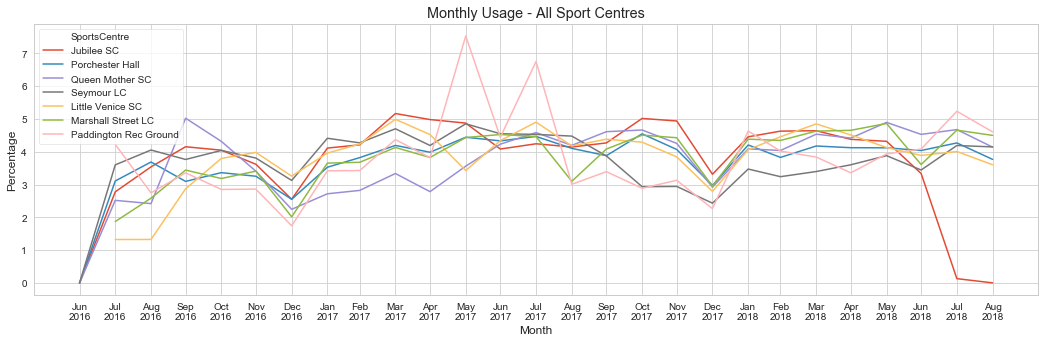

In [63]:
# Get counts for each month by Sports Centre
year_2017_counts = year_2017.groupby([pd.Grouper(key='TimeStamp',freq='M'),year_2017.SportsCentre]).size().reset_index(name='count')

# Calculate the percentage of visits for each SC
year_2017_counts['pct'] = year_2017_counts.groupby('SportsCentre')['count'].apply(lambda x: 100* x.astype(float)/x.sum())

# Plot usage per month by sport centre, but uses % to show all on one plot. Exludes Moberly SC bc of small data

# Drop moberly for plot
year_2017_counts2=year_2017_counts[year_2017_counts['SportsCentre'] != 'Moberly SC']

plt.figure(figsize=(18, 5))
ax = sns.lineplot(x='TimeStamp', y="pct", hue = "SportsCentre",data=year_2017_counts2)

ax.set(xlabel="Month")
ax.set(ylabel="Percentage")
 # Set major ticks with month names    
ax.set(xticks=resamp_2017.TimeStamp.values)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))
ax = plt.title('Monthly Usage - All Sport Centres')

## Weekly <a name="week"></a>

In [64]:
# Create a column that records the day of the week for each timestamp

weekly = timeindex.reset_index()
weekly['weekday'] = weekly['TimeStamp'].dt.dayofweek


In [65]:
# Get the average visits per day of all SC
daily_df = fulldata.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
weekdaily_df = daily_df.groupby(daily_df.index.weekday).mean()

# Calculate by each Sport Centre
# Porchester Hall
porchdaily_df = porch_2017.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
porchweekdaily_df = porchdaily_df.groupby(porchdaily_df.index.weekday).mean()

# Queen Mother SC
qmdaily_df = qm_2017.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
qmweekdaily_df = qmdaily_df.groupby(qmdaily_df.index.weekday).mean()

# Marshall Street LC
marshdaily_df = marsh_2017.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
marshweekdaily_df = marshdaily_df.groupby(marshdaily_df.index.weekday).mean()

# Seymour LC
seydaily_df = sey_2017.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
seyweekdaily_df = seydaily_df.groupby(seydaily_df.index.weekday).mean()

# Jubilee SC
jubdaily_df = jub_2017.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
jubweekdaily_df = jubdaily_df.groupby(jubdaily_df.index.weekday).mean()

# Little Venice SC
lvdaily_df = lv_2017.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
lvweekdaily_df = lvdaily_df.groupby(lvdaily_df.index.weekday).mean()

# Moberly SC 
mobdaily_df = mob_2017.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
mobweekdaily_df = mobdaily_df.groupby(mobdaily_df.index.weekday).mean()

# Paddington Rec Ground 
paddaily_df = pad_2017.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
padweekdaily_df = paddaily_df.groupby(paddaily_df.index.weekday).mean()


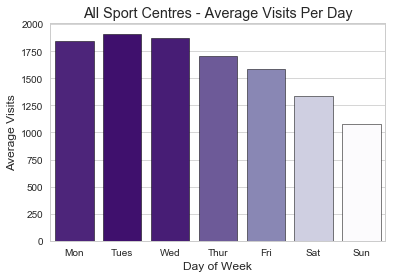

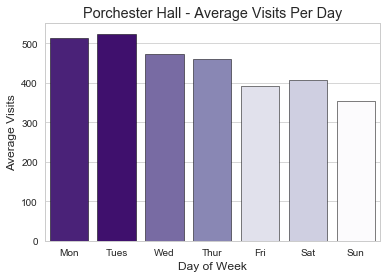

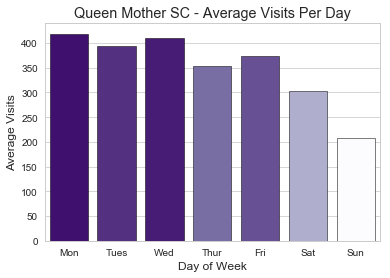

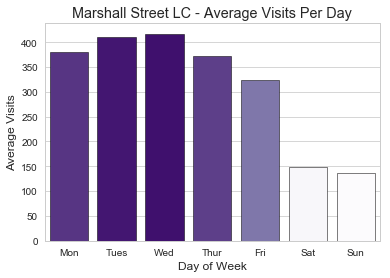

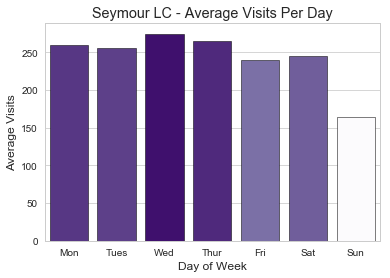

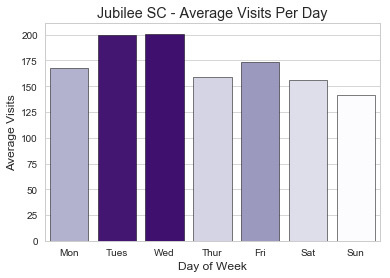

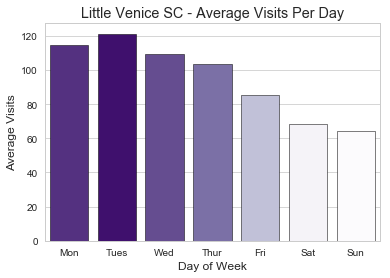

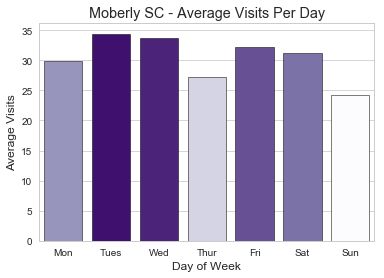

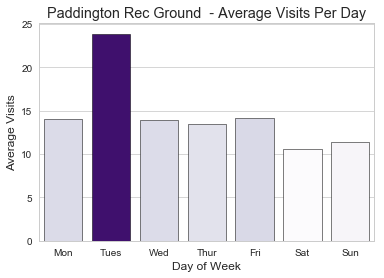

In [66]:
# Bar plot of average visits per day by SC
# Create labels for charts
days = ['Mon', 'Tues', "Wed", 'Thurs', 'Fri', 'Sat', 'Sun']

# This plot colours the bars by value using a calculation
ax = sns.barplot(x=weekdaily_df.index, y="MembershipID", data=weekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='Purples').to_rgba(weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Average Visits Per Day')
plt.show()

# Porchester Hall
ax = sns.barplot(x=porchweekdaily_df.index, y="MembershipID", data=porchweekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='Purples').to_rgba(porchweekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('Porchester Hall - Average Visits Per Day')
plt.show()

# Queen Mother SC
ax = sns.barplot(x=qmweekdaily_df.index, y="MembershipID", data=qmweekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='Purples').to_rgba(qmweekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('Queen Mother SC - Average Visits Per Day')
plt.show()

# Marshall Street LC
ax = sns.barplot(x=marshweekdaily_df.index, y="MembershipID", data=marshweekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='Purples').to_rgba(marshweekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('Marshall Street LC - Average Visits Per Day')
plt.show()

# Seymour LC
ax = sns.barplot(x=seyweekdaily_df.index, y="MembershipID", data=seyweekdaily_df, edgecolor='black', palette=mpl.cm.ScalarMappable(cmap='Purples').to_rgba(seyweekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('Seymour LC - Average Visits Per Day')
plt.show()

# Jubilee SC
ax = sns.barplot(x=jubweekdaily_df.index, y="MembershipID", data=jubweekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='Purples').to_rgba(jubweekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('Jubilee SC - Average Visits Per Day')
plt.show()

# Little Venice SC
ax = sns.barplot(x=lvweekdaily_df.index, y="MembershipID", data=lvweekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='Purples').to_rgba(lvweekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('Little Venice SC - Average Visits Per Day')
plt.show()

# Moberly SC 
ax = sns.barplot(x=mobweekdaily_df.index, y="MembershipID", data=mobweekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='Purples').to_rgba(mobweekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('Moberly SC - Average Visits Per Day')
plt.show()

# Paddington Rec Ground 
ax = sns.barplot(x=padweekdaily_df.index, y="MembershipID", data=padweekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='Purples').to_rgba(padweekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('Paddington Rec Ground  - Average Visits Per Day')
plt.show()


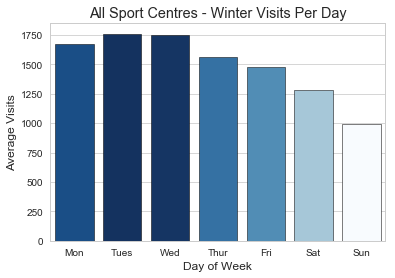

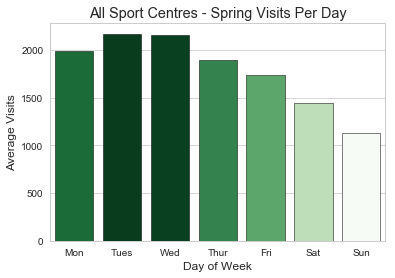

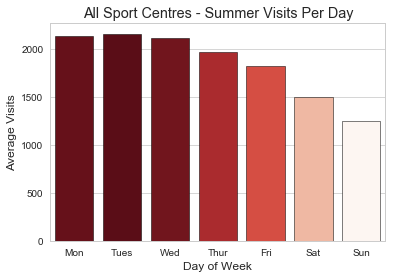

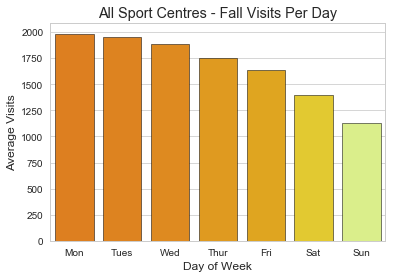

In [67]:
# Split the data into seasons for comparison - ALL SC
winter_daily = daily_df[(daily_df.index > '2016-12-01') & (daily_df.index <= '2017-02-28') | (daily_df.index > '2017-12-01') & (daily_df.index <= '2018-02-28')]
spring_daily = daily_df[(daily_df.index > '2017-03-01') & (daily_df.index <= '2017-05-31') | (daily_df.index > '2018-03-01') & (daily_df.index <= '2018-05-31')]
summer_daily = daily_df[(daily_df.index > '2017-06-01') & (daily_df.index <= '2017-08-31') | (daily_df.index > '2018-06-01') & (daily_df.index <= '2018-08-31')]
fall_daily = daily_df[(daily_df.index > '2016-09-01') & (daily_df.index <= '2016-11-30') | (daily_df.index > '2017-09-01') & (daily_df.index <= '2017-11-30')]

# Get the average weekday visits by season
wint_weekdaily_df = winter_daily.groupby(winter_daily.index.weekday).mean()
spring_weekdaily_df = spring_daily.groupby(spring_daily.index.weekday).mean()
summer_weekdaily_df = summer_daily.groupby(summer_daily.index.weekday).mean()
fall_weekdaily_df = fall_daily.groupby(fall_daily.index.weekday).mean()

# Plot the seasonal charts
days = ['Mon', 'Tues', "Wed", 'Thurs', 'Fri', 'Sat', 'Sun']

# This plot colours the bars by value using a calculation - WINTER
ax = sns.barplot(x=wint_weekdaily_df.index, y="MembershipID", data=wint_weekdaily_df,  edgecolor='black', palette=mpl.cm.ScalarMappable(cmap='Blues').to_rgba(wint_weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Winter Visits Per Day')
plt.show()

# This plot colours the bars by value using a calculation - Spring
ax = sns.barplot(x=spring_weekdaily_df.index, y="MembershipID", data=spring_weekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='Greens').to_rgba(spring_weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Spring Visits Per Day')
plt.show()

# This plot colours the bars by value using a calculation - Summer
ax = sns.barplot(x=summer_weekdaily_df.index, y="MembershipID", data=summer_weekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='Reds').to_rgba(summer_weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Summer Visits Per Day')
plt.show()

# This plot colours the bars by value using a calculation - Fall
ax = sns.barplot(x=fall_weekdaily_df.index, y="MembershipID", data=fall_weekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='Wistia').to_rgba(fall_weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Fall Visits Per Day')
plt.show()

In [68]:
# SPLIT DATA BY AGE GROUPS
ageband0_week = fulldata[fulldata['AgeBand'] == '0-15']
ageband16_week = fulldata[fulldata['AgeBand'] == '16-64']
ageband65_week = fulldata[fulldata['AgeBand'] == '65+']

age0_daily_df = ageband0_week.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
age0_weekdaily_df = age0_daily_df.groupby(age0_daily_df.index.weekday).mean()

age16_daily_df = ageband16_week.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
age16_weekdaily_df = age16_daily_df.groupby(age16_daily_df.index.weekday).mean()

age65_daily_df = ageband65_week.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
age65_weekdaily_df = age65_daily_df.groupby(age65_daily_df.index.weekday).mean()

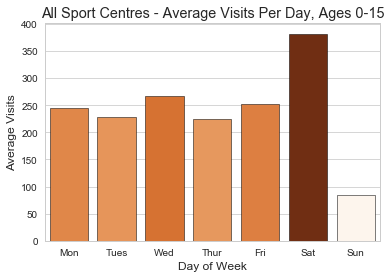

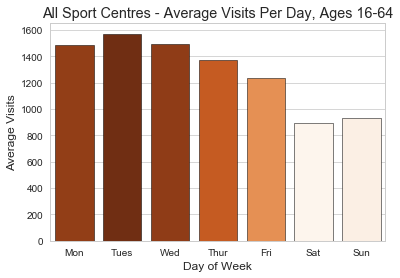

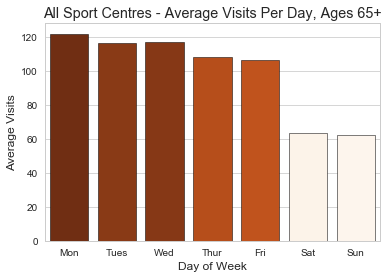

In [69]:
# As above, bar plots of average visits per day, but by AgeBand
days = ['Mon', 'Tues', "Wed", 'Thurs', 'Fri', 'Sat', 'Sun']

# This plot colours the bars by value using a calculation - Ages 0-15
ax = sns.barplot(x=age0_weekdaily_df.index, y="MembershipID", data=age0_weekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='Oranges').to_rgba(age0_weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Average Visits Per Day, Ages 0-15')
plt.show()

# This plot colours the bars by value using a calculation - Ages 16-64
ax = sns.barplot(x=age16_weekdaily_df.index, y="MembershipID", data=age16_weekdaily_df,edgecolor='black', palette=mpl.cm.ScalarMappable(cmap='Oranges').to_rgba(age16_weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Average Visits Per Day, Ages 16-64')
plt.show()


# This plot colours the bars by value using a calculation - Ages 65+
ax = sns.barplot(x=age65_weekdaily_df.index, y="MembershipID", data=age65_weekdaily_df,edgecolor='black', palette=mpl.cm.ScalarMappable(cmap='Oranges').to_rgba(age65_weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Average Visits Per Day, Ages 65+')
plt.show()

In [70]:
# Plot by gender, but not interesting as no real difference in patterns

#genderm_week = fulldata[fulldata['Gender'] == 'Male']
#genderf_week = fulldata[fulldata['Gender'] == 'Female']


#genderm_daily_df = genderm_week.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
#genderm_weekdaily_df = genderm_daily_df.groupby(genderm_daily_df.index.weekday).mean()

#genderf_daily_df = genderf_week.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
#genderf_weekdaily_df = genderf_daily_df.groupby(genderf_daily_df.index.weekday).mean()

# Bar plot of average visits per day by SC and Gender

#days = ['Mon', 'Tues', "Wed", 'Thurs', 'Fri', 'Sat', 'Sun']

# This plot colours the bars by value using a calculation - Males
#ax = sns.barplot(x=genderm_weekdaily_df.index, y="MembershipID", data=genderm_weekdaily_df, palette=mpl.cm.ScalarMappable(cmap='Purples').to_rgba(genderm_weekdaily_df['MembershipID']))
#ax.set(xlabel="Day of Week")
#ax.set(ylabel="Average Visits")
#ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
#ax = plt.title('All Sport Centres - Average Visits Per Day, Males')

#plt.show()

# This plot colours the bars by value using a calculation - Females
#ax = sns.barplot(x=genderf_weekdaily_df.index, y="MembershipID", data=genderf_weekdaily_df, palette=mpl.cm.ScalarMappable(cmap='Purples').to_rgba(genderf_weekdaily_df['MembershipID']))
#ax.set(xlabel="Day of Week")
#ax.set(ylabel="Average Visits")
#ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
#ax = plt.title('All Sport Centres - Average Visits Per Day, Females')

#plt.show()


In [71]:
# IMPORT AND ATTACH ACORN GEODEMOGRAPHICS DATA
acorn = pd.read_csv('ACORN_codes.csv')

# Drop all unknown Postcodes (XXXX)
SC_allpost = fulldata.loc[fulldata['Postcode'] != 'XXXX']

# Truncate the Postcodes by removing the space in-between them
SC_allpost['Postcode'] = SC_allpost['Postcode'].str.replace(' ', '')

# Append the ACORN categories to the EveryoneActive counts using Postcode attribute
post_merge = pd.merge(SC_allpost, acorn, on='Postcode', how='outer')

# SPLIT DATA BY ACORN CATEGORY
wh_ethn_week = post_merge[post_merge['Category'] == 'Not Private Households']
bl_ethn_week = post_merge[post_merge['Category'] == 'Rising Prosperity']
as_ethn_week = post_merge[post_merge['Category'] == 'Affluent Achiever']
mx_ethn_week = post_merge[post_merge['Category'] == 'Financially Stretched']
ot_ethn_week = post_merge[post_merge['Category'] == 'Urban Adversity']

wh_daily_df = wh_ethn_week.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
wh_weekdaily_df = wh_daily_df.groupby(wh_daily_df.index.weekday).mean()

bl_daily_df = bl_ethn_week.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
bl_weekdaily_df = bl_daily_df.groupby(bl_daily_df.index.weekday).mean()

as_daily_df = as_ethn_week.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
as_weekdaily_df = as_daily_df.groupby(as_daily_df.index.weekday).mean()

mx_daily_df = mx_ethn_week.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
mx_weekdaily_df = mx_daily_df.groupby(mx_daily_df.index.weekday).mean()

ot_daily_df = ot_ethn_week.set_index('TimeStamp').groupby(pd.Grouper(freq='D')).count()
ot_weekdaily_df = ot_daily_df.groupby(ot_daily_df.index.weekday).mean()




C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


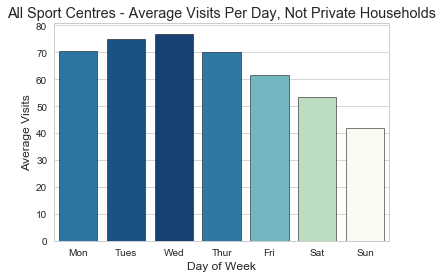

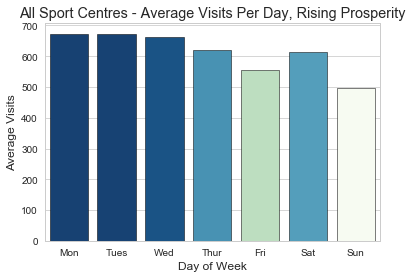

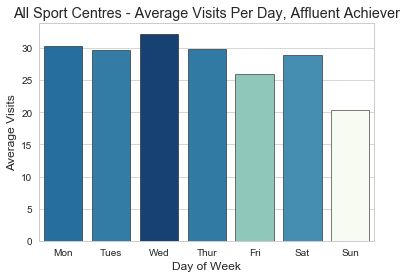

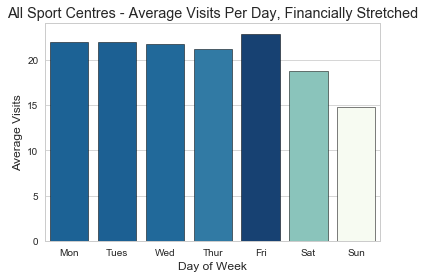

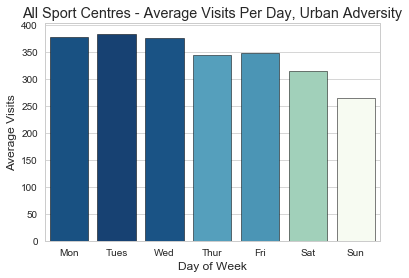

In [72]:
# Bar plot of average visits per day by Acorn Category
days = ['Mon', 'Tues', "Wed", 'Thurs', 'Fri', 'Sat', 'Sun']

# This plot colours the bars by value using a calculation - White
ax = sns.barplot(x=wh_weekdaily_df.index, y="MembershipID", data=wh_weekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='GnBu').to_rgba(wh_weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Average Visits Per Day, Not Private Households')
plt.show()

# This plot colours the bars by value using a calculation - Black
ax = sns.barplot(x=bl_weekdaily_df.index, y="MembershipID", data=bl_weekdaily_df,edgecolor='black', palette=mpl.cm.ScalarMappable(cmap='GnBu').to_rgba(bl_weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Average Visits Per Day, Rising Prosperity')
plt.show()


# This plot colours the bars by value using a calculation - Asian
ax = sns.barplot(x=as_weekdaily_df.index, y="MembershipID", data=as_weekdaily_df,edgecolor='black', palette=mpl.cm.ScalarMappable(cmap='GnBu').to_rgba(as_weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Average Visits Per Day, Affluent Achiever')
plt.show()

# This plot colours the bars by value using a calculation - Mixed
ax = sns.barplot(x=mx_weekdaily_df.index, y="MembershipID", data=mx_weekdaily_df, edgecolor='black',palette=mpl.cm.ScalarMappable(cmap='GnBu').to_rgba(mx_weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Average Visits Per Day, Financially Stretched')
plt.show()

# This plot colours the bars by value using a calculation - Other
ax = sns.barplot(x=ot_weekdaily_df.index, y="MembershipID", data=ot_weekdaily_df,edgecolor='black', palette=mpl.cm.ScalarMappable(cmap='GnBu').to_rgba(ot_weekdaily_df['MembershipID']))
ax.set(xlabel="Day of Week")
ax.set(ylabel="Average Visits")
ax = ax.set(xticks=range(len(days)), xticklabels=[i[0:4] for i in days])
ax = plt.title('All Sport Centres - Average Visits Per Day, Urban Adversity')
plt.show()

## Daily <a name="day"></a>

In [73]:
# Subset data into each day

mon= weekly[weekly['weekday'] == 0 ]
tues= weekly[weekly['weekday'] == 1 ]
wed= weekly[weekly['weekday'] == 2 ]
thur= weekly[weekly['weekday'] == 3 ]
fri= weekly[weekly['weekday'] == 4 ]
sat= weekly[weekly['weekday'] == 5 ]
sun= weekly[weekly['weekday'] == 6 ]

# Group days into 30 minute intervals, and then group by sport centre and HOUR. 
# Also replace all NaN with 0 for correct plotting, and generate a total column for all SC

# Monday table
mon_counts = mon.groupby([pd.Grouper(key='TimeStamp',freq='30T'),mon.SportsCentre]).size().reset_index(name='count')
mon_table = mon_counts.groupby([mon_counts['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
mon_table=mon_table.fillna(0)
mon_table['Total'] = mon_table[list(mon_table.columns)].sum(axis=1)

# Tuesday table
tues_counts = tues.groupby([pd.Grouper(key='TimeStamp',freq='30T'),tues.SportsCentre]).size().reset_index(name='count')
tues_table = tues_counts.groupby([tues_counts['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
tues_table=tues_table.fillna(0)
tues_table['Total'] = tues_table[list(tues_table.columns)].sum(axis=1)

# Wedn table
wed_counts = wed.groupby([pd.Grouper(key='TimeStamp',freq='30T'),wed.SportsCentre]).size().reset_index(name='count')
wed_table = wed_counts.groupby([wed_counts['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
wed_table=wed_table.fillna(0)
wed_table['Total'] = wed_table[list(wed_table.columns)].sum(axis=1)

# Thursday table
thur_counts = thur.groupby([pd.Grouper(key='TimeStamp',freq='30T'),thur.SportsCentre]).size().reset_index(name='count')
thur_table = thur_counts.groupby([thur_counts['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
thur_table=thur_table.fillna(0)
thur_table['Total'] = thur_table[list(thur_table.columns)].sum(axis=1)

# Friday Table
fri_counts = fri.groupby([pd.Grouper(key='TimeStamp',freq='30T'),fri.SportsCentre]).size().reset_index(name='count')
fri_table = fri_counts.groupby([fri_counts['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
fri_table=fri_table.fillna(0)
fri_table['Total'] = fri_table[list(fri_table.columns)].sum(axis=1)

# Saturday Table
sat_counts = sat.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sat.SportsCentre]).size().reset_index(name='count')
sat_table = sat_counts.groupby([sat_counts['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sat_table=sat_table.fillna(0)
sat_table['Total'] = sat_table[list(sat_table.columns)].sum(axis=1)

# Sunday Table
sun_counts = sun.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sun.SportsCentre]).size().reset_index(name='count')
sun_table = sun_counts.groupby([sun_counts['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sun_table=sun_table.fillna(0)
sun_table['Total'] = sun_table[list(sun_table.columns)].sum(axis=1)


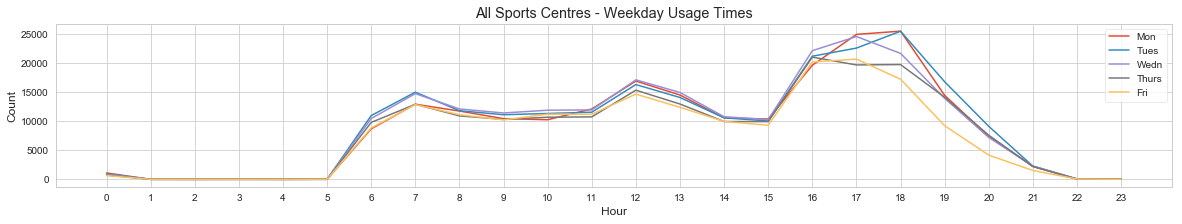

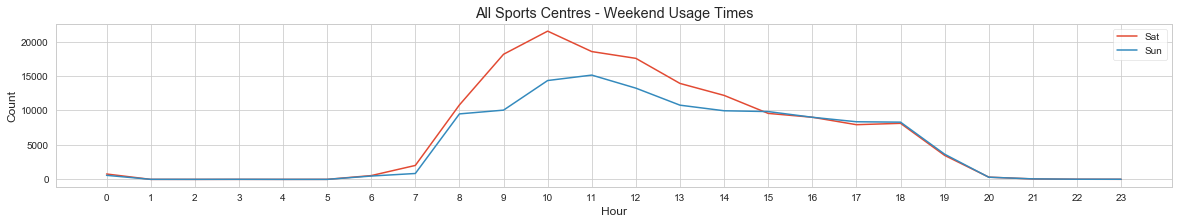

In [74]:
# Plot of above, using the grouped by hour data for all Sports Centres
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table.index, y="Total", data=mon_table)
ax = sns.lineplot(x=tues_table.index, y="Total", data=tues_table)
ax = sns.lineplot(x=wed_table.index, y="Total", data=wed_table)
ax = sns.lineplot(x=thur_table.index, y="Total", data=thur_table)
ax = sns.lineplot(x=fri_table.index, y="Total", data=fri_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('All Sports Centres - Weekday Usage Times')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table.index, y="Total", data=sat_table)
ax = sns.lineplot(x=sun_table.index, y="Total", data=sun_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('All Sports Centres - Weekend Usage Times')
plt.show()

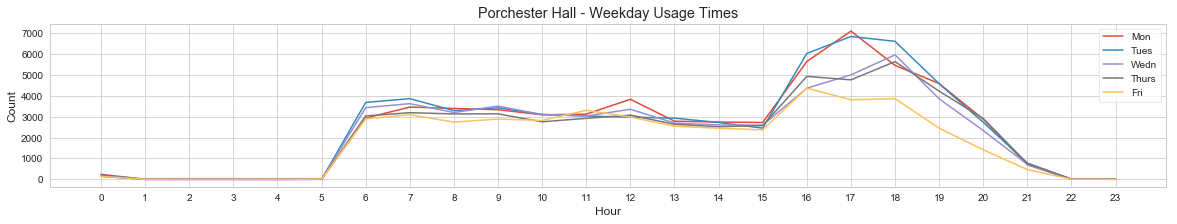

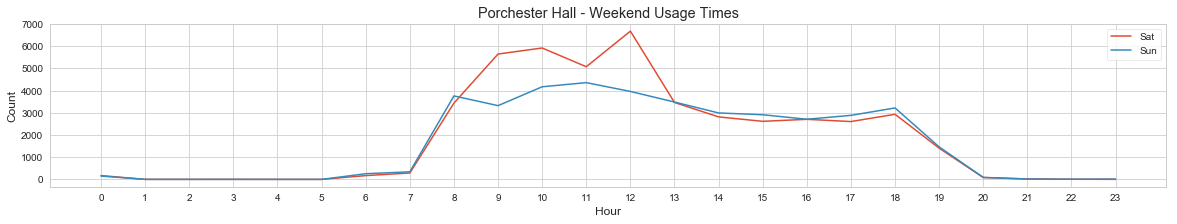

In [75]:
# Plot of above, using the grouped by hour data for Porchester Hall
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table.index, y="Porchester Hall", data=mon_table)
ax = sns.lineplot(x=tues_table.index, y="Porchester Hall", data=tues_table)
ax = sns.lineplot(x=wed_table.index, y="Porchester Hall", data=wed_table)
ax = sns.lineplot(x=thur_table.index, y="Porchester Hall", data=thur_table)
ax = sns.lineplot(x=fri_table.index, y="Porchester Hall", data=fri_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('Porchester Hall - Weekday Usage Times')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table.index, y="Porchester Hall", data=sat_table)
ax = sns.lineplot(x=sun_table.index, y="Porchester Hall", data=sun_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('Porchester Hall - Weekend Usage Times')
plt.show()

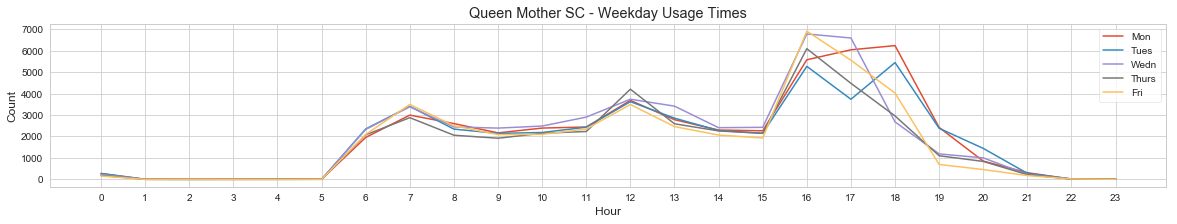

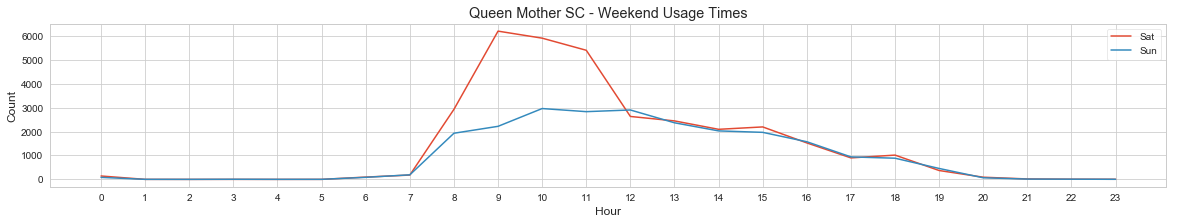

In [76]:
# Plot of above, using the grouped by hour data for Queen Mother SC
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table.index, y="Queen Mother SC", data=mon_table)
ax = sns.lineplot(x=tues_table.index, y="Queen Mother SC", data=tues_table)
ax = sns.lineplot(x=wed_table.index, y="Queen Mother SC", data=wed_table)
ax = sns.lineplot(x=thur_table.index, y="Queen Mother SC", data=thur_table)
ax = sns.lineplot(x=fri_table.index, y="Queen Mother SC", data=fri_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('Queen Mother SC - Weekday Usage Times')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table.index, y="Queen Mother SC", data=sat_table)
ax = sns.lineplot(x=sun_table.index, y="Queen Mother SC", data=sun_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('Queen Mother SC - Weekend Usage Times')
plt.show()

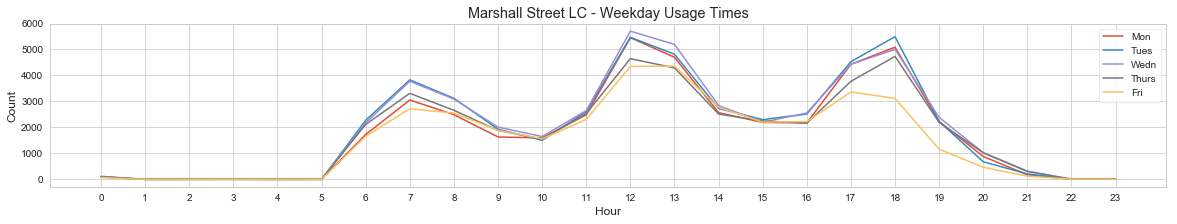

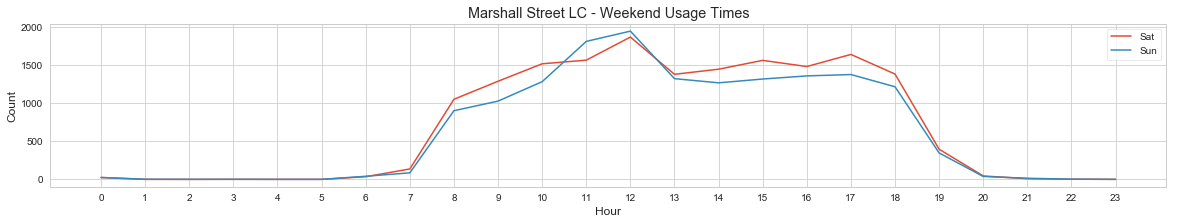

In [77]:
# Plot of above, using the grouped by hour data for Marshall Street LC
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table.index, y="Marshall Street LC", data=mon_table)
ax = sns.lineplot(x=tues_table.index, y="Marshall Street LC", data=tues_table)
ax = sns.lineplot(x=wed_table.index, y="Marshall Street LC", data=wed_table)
ax = sns.lineplot(x=thur_table.index, y="Marshall Street LC", data=thur_table)
ax = sns.lineplot(x=fri_table.index, y="Marshall Street LC", data=fri_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('Marshall Street LC - Weekday Usage Times')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table.index, y="Marshall Street LC", data=sat_table)
ax = sns.lineplot(x=sun_table.index, y="Marshall Street LC", data=sun_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('Marshall Street LC - Weekend Usage Times')
plt.show()

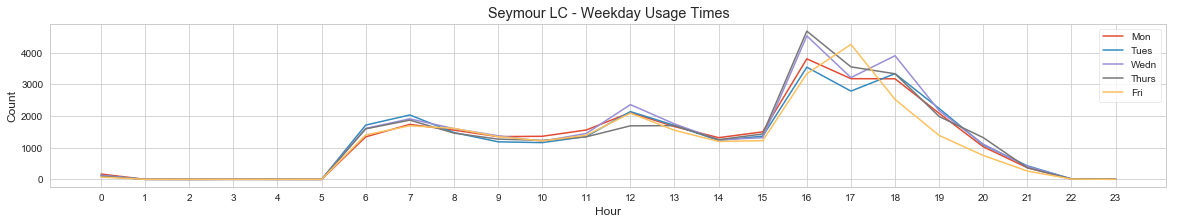

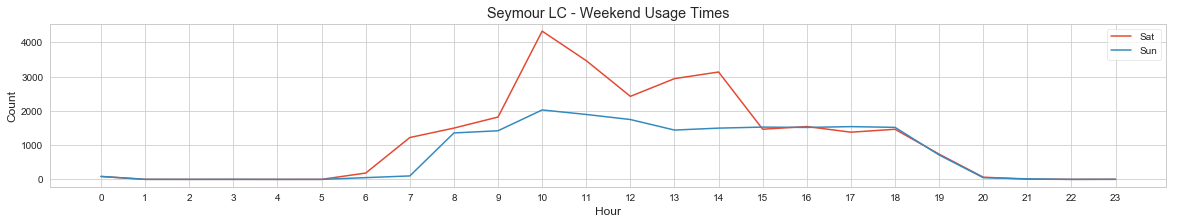

In [78]:
# Plot of above, using the grouped by hour data for Seymour LC
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table.index, y="Seymour LC", data=mon_table)
ax = sns.lineplot(x=tues_table.index, y="Seymour LC", data=tues_table)
ax = sns.lineplot(x=wed_table.index, y="Seymour LC", data=wed_table)
ax = sns.lineplot(x=thur_table.index, y="Seymour LC", data=thur_table)
ax = sns.lineplot(x=fri_table.index, y="Seymour LC", data=fri_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('Seymour LC - Weekday Usage Times')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table.index, y="Seymour LC", data=sat_table)
ax = sns.lineplot(x=sun_table.index, y="Seymour LC", data=sun_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('Seymour LC - Weekend Usage Times')
plt.show()

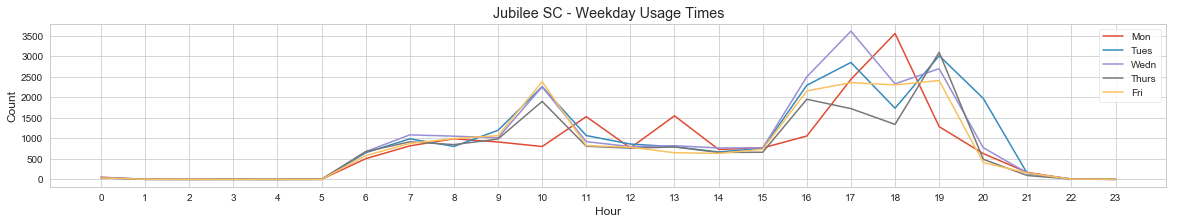

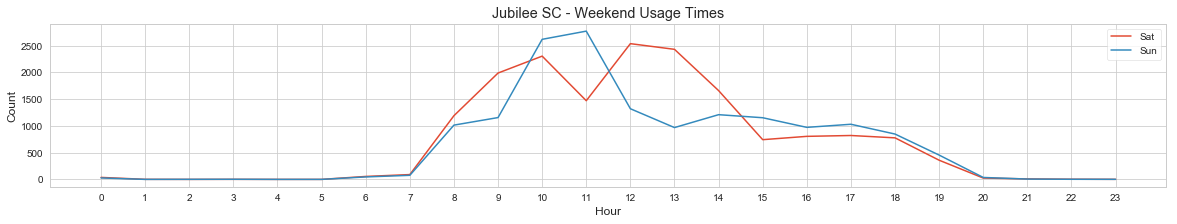

In [79]:
# Plot of above, using the grouped by hour data for Jubilee SC
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table.index, y="Jubilee SC", data=mon_table)
ax = sns.lineplot(x=tues_table.index, y="Jubilee SC", data=tues_table)
ax = sns.lineplot(x=wed_table.index, y="Jubilee SC", data=wed_table)
ax = sns.lineplot(x=thur_table.index, y="Jubilee SC", data=thur_table)
ax = sns.lineplot(x=fri_table.index, y="Jubilee SC", data=fri_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('Jubilee SC - Weekday Usage Times')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table.index, y="Jubilee SC", data=sat_table)
ax = sns.lineplot(x=sun_table.index, y="Jubilee SC", data=sun_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('Jubilee SC - Weekend Usage Times')
plt.show()

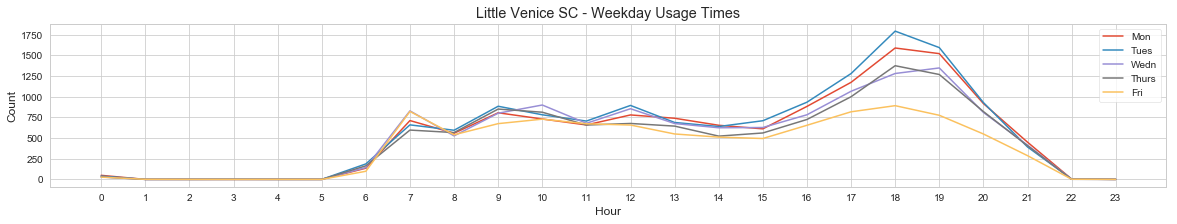

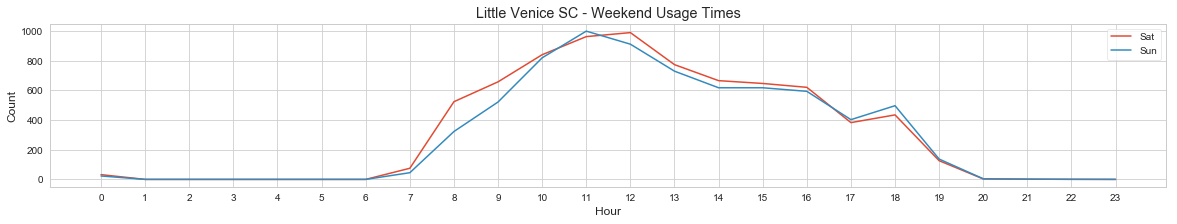

In [80]:
# Plot of above, using the grouped by hour data for Little Venice SC
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table.index, y="Little Venice SC", data=mon_table)
ax = sns.lineplot(x=tues_table.index, y="Little Venice SC", data=tues_table)
ax = sns.lineplot(x=wed_table.index, y="Little Venice SC", data=wed_table)
ax = sns.lineplot(x=thur_table.index, y="Little Venice SC", data=thur_table)
ax = sns.lineplot(x=fri_table.index, y="Little Venice SC", data=fri_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('Little Venice SC - Weekday Usage Times')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table.index, y="Little Venice SC", data=sat_table)
ax = sns.lineplot(x=sun_table.index, y="Little Venice SC", data=sun_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('Little Venice SC - Weekend Usage Times')
plt.show()

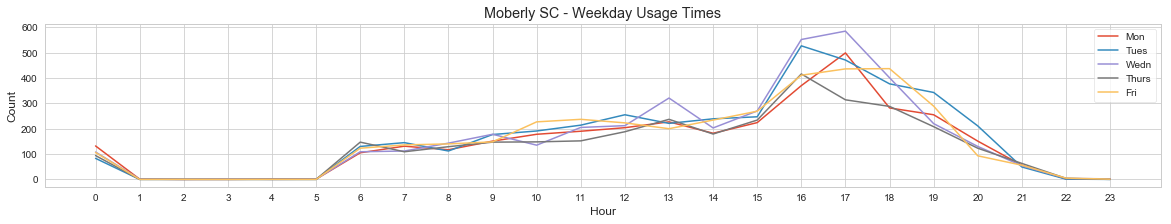

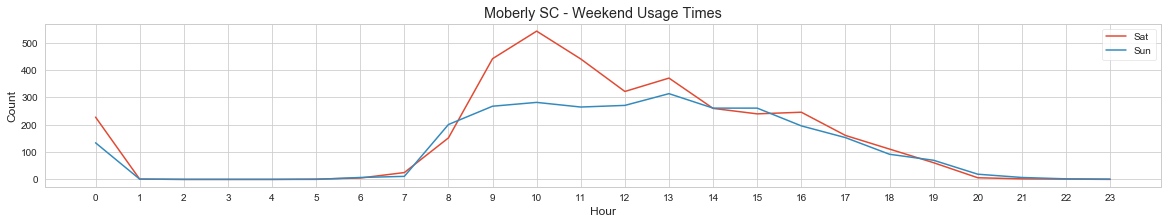

In [81]:
# Plot of above, using the grouped by hour data for Moberly SC
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table.index, y="Moberly SC", data=mon_table)
ax = sns.lineplot(x=tues_table.index, y="Moberly SC", data=tues_table)
ax = sns.lineplot(x=wed_table.index, y="Moberly SC", data=wed_table)
ax = sns.lineplot(x=thur_table.index, y="Moberly SC", data=thur_table)
ax = sns.lineplot(x=fri_table.index, y="Moberly SC", data=fri_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('Moberly SC - Weekday Usage Times')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table.index, y="Moberly SC", data=sat_table)
ax = sns.lineplot(x=sun_table.index, y="Moberly SC", data=sun_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('Moberly SC - Weekend Usage Times')
plt.show()


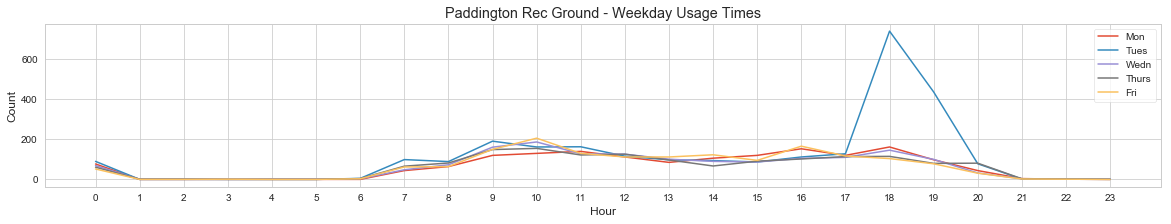

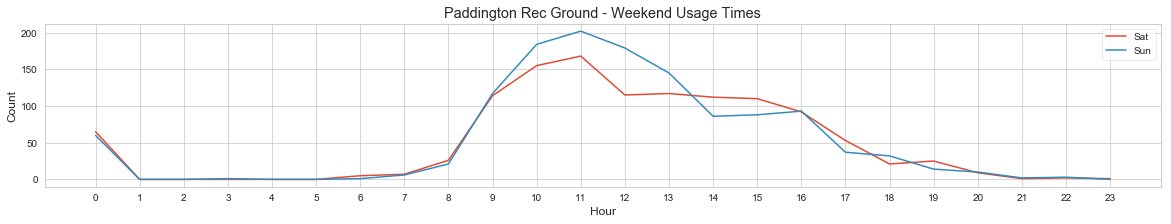

In [82]:
# Plot of above, using the grouped by hour data for Paddington Rec Ground. 
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table.index, y="Paddington Rec Ground", data=mon_table)
ax = sns.lineplot(x=tues_table.index, y="Paddington Rec Ground", data=tues_table)
ax = sns.lineplot(x=wed_table.index, y="Paddington Rec Ground", data=wed_table)
ax = sns.lineplot(x=thur_table.index, y="Paddington Rec Ground", data=thur_table)
ax = sns.lineplot(x=fri_table.index, y="Paddington Rec Ground", data=fri_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('Paddington Rec Ground - Weekday Usage Times')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table.index, y="Paddington Rec Ground", data=sat_table)
ax = sns.lineplot(x=sun_table.index, y="Paddington Rec Ground", data=sun_table)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('Paddington Rec Ground - Weekend Usage Times')
plt.show()


In [84]:
# Subset by AgeBands

# Subset data into each day and 0-15 Age Band

mon0= weekly[(weekly['weekday'] == 0) & (weekly['AgeBand'] == '0-15') ]
tues0= weekly[(weekly['weekday'] == 1) & (weekly['AgeBand'] == '0-15')]
wed0= weekly[(weekly['weekday'] == 2) & (weekly['AgeBand'] == '0-15')]
thur0= weekly[(weekly['weekday'] == 3) & (weekly['AgeBand'] == '0-15')]
fri0= weekly[(weekly['weekday'] == 4) & (weekly['AgeBand'] == '0-15')]
sat0= weekly[(weekly['weekday'] == 5) & (weekly['AgeBand'] == '0-15')]
sun0= weekly[(weekly['weekday'] == 6) & (weekly['AgeBand'] == '0-15')]

# Group days into 30 minute intervals, and then group by SC and HOUR. 
# Also replace all NaN with 0 for correct plotting, and generate a total column for all SC

# Monday table
mon_counts0 = mon0.groupby([pd.Grouper(key='TimeStamp',freq='30T'),mon0.SportsCentre]).size().reset_index(name='count')
mon_table0 = mon_counts0.groupby([mon_counts0['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
mon_table0=mon_table0.fillna(0)
mon_table0['Total'] = mon_table0[list(mon_table0.columns)].sum(axis=1)

# Tuesday table
tues_counts0 = tues0.groupby([pd.Grouper(key='TimeStamp',freq='30T'),tues0.SportsCentre]).size().reset_index(name='count')
tues_table0 = tues_counts0.groupby([tues_counts0['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
tues_table0=tues_table0.fillna(0)
tues_table0['Total'] = tues_table0[list(tues_table0.columns)].sum(axis=1)

# Wedn table
wed_counts0 = wed0.groupby([pd.Grouper(key='TimeStamp',freq='30T'),wed0.SportsCentre]).size().reset_index(name='count')
wed_table0 = wed_counts0.groupby([wed_counts0['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
wed_table0=wed_table0.fillna(0)
wed_table0['Total'] = wed_table0[list(wed_table0.columns)].sum(axis=1)

# Thursday table
thur_counts0 = thur0.groupby([pd.Grouper(key='TimeStamp',freq='30T'),thur0.SportsCentre]).size().reset_index(name='count')
thur_table0 = thur_counts0.groupby([thur_counts0['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
thur_table0=thur_table0.fillna(0)
thur_table0['Total'] = thur_table0[list(thur_table0.columns)].sum(axis=1)

# Friday Table
fri_counts0 = fri0.groupby([pd.Grouper(key='TimeStamp',freq='30T'),fri0.SportsCentre]).size().reset_index(name='count')
fri_table0 = fri_counts0.groupby([fri_counts0['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
fri_table0=fri_table0.fillna(0)
fri_table0['Total'] = fri_table0[list(fri_table0.columns)].sum(axis=1)

# Saturday Table
sat_counts0 = sat0.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sat0.SportsCentre]).size().reset_index(name='count')
sat_table0 = sat_counts0.groupby([sat_counts0['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sat_table0=sat_table0.fillna(0)
sat_table0['Total'] = sat_table0[list(sat_table0.columns)].sum(axis=1)

# Sunday Table
sun_counts0 = sun0.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sun0.SportsCentre]).size().reset_index(name='count')
sun_table0 = sun_counts0.groupby([sun_counts0['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sun_table0=sun_table0.fillna(0)
sun_table0['Total'] = sun_table0[list(sun_table0.columns)].sum(axis=1)

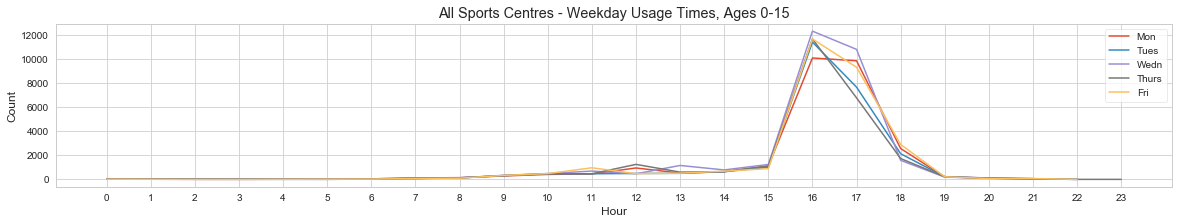

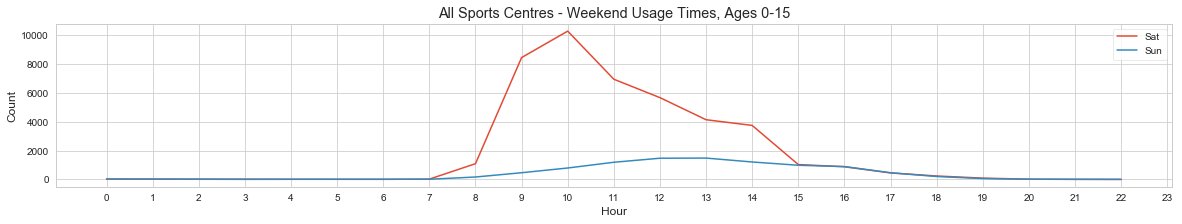

In [85]:
# Plot of above, using the grouped by hour data for all Sports Centres - Ages 0-15
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table0.index, y="Total", data=mon_table0)
ax = sns.lineplot(x=tues_table0.index, y="Total", data=tues_table0)
ax = sns.lineplot(x=wed_table0.index, y="Total", data=wed_table0)
ax = sns.lineplot(x=thur_table0.index, y="Total", data=thur_table0)
ax = sns.lineplot(x=fri_table0.index, y="Total", data=fri_table0)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('All Sports Centres - Weekday Usage Times, Ages 0-15')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table0.index, y="Total", data=sat_table0)
ax = sns.lineplot(x=sun_table0.index, y="Total", data=sun_table0)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('All Sports Centres - Weekend Usage Times, Ages 0-15')
plt.show()

In [86]:
# Subset data into each day and 16-64 Age Band

mon16= weekly[(weekly['weekday'] == 0) & (weekly['AgeBand'] == '16-64') ]
tues16= weekly[(weekly['weekday'] == 1) & (weekly['AgeBand'] == '16-64')]
wed16= weekly[(weekly['weekday'] == 2) & (weekly['AgeBand'] == '16-64')]
thur16= weekly[(weekly['weekday'] == 3) & (weekly['AgeBand'] == '16-64')]
fri16= weekly[(weekly['weekday'] == 4) & (weekly['AgeBand'] == '16-64')]
sat16= weekly[(weekly['weekday'] == 5) & (weekly['AgeBand'] == '16-64')]
sun16= weekly[(weekly['weekday'] == 6) & (weekly['AgeBand'] == '16-64')]

# Group days into 30 minute intervals, and then group by SC and HOUR. 
# Also replace all NaN with 0 for correct plotting, and generate a total column for all SC

# Monday table
mon_counts16 = mon16.groupby([pd.Grouper(key='TimeStamp',freq='30T'),mon16.SportsCentre]).size().reset_index(name='count')
mon_table16 = mon_counts16.groupby([mon_counts16['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
mon_table16=mon_table16.fillna(0)
mon_table16['Total'] = mon_table16[list(mon_table16.columns)].sum(axis=1)

# Tuesday table
tues_counts16 = tues16.groupby([pd.Grouper(key='TimeStamp',freq='30T'),tues16.SportsCentre]).size().reset_index(name='count')
tues_table16 = tues_counts16.groupby([tues_counts16['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
tues_table16=tues_table16.fillna(0)
tues_table16['Total'] = tues_table16[list(tues_table16.columns)].sum(axis=1)

# Wedn table
wed_counts16 = wed16.groupby([pd.Grouper(key='TimeStamp',freq='30T'),wed16.SportsCentre]).size().reset_index(name='count')
wed_table16 = wed_counts16.groupby([wed_counts16['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
wed_table16=wed_table16.fillna(0)
wed_table16['Total'] = wed_table16[list(wed_table16.columns)].sum(axis=1)

# Thursday table
thur_counts16 = thur16.groupby([pd.Grouper(key='TimeStamp',freq='30T'),thur16.SportsCentre]).size().reset_index(name='count')
thur_table16 = thur_counts16.groupby([thur_counts16['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
thur_table16=thur_table16.fillna(0)
thur_table16['Total'] = thur_table16[list(thur_table16.columns)].sum(axis=1)

# Friday Table
fri_counts16 = fri16.groupby([pd.Grouper(key='TimeStamp',freq='30T'),fri16.SportsCentre]).size().reset_index(name='count')
fri_table16 = fri_counts16.groupby([fri_counts16['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
fri_table16=fri_table16.fillna(0)
fri_table16['Total'] = fri_table16[list(fri_table16.columns)].sum(axis=1)

# Saturday Table
sat_counts16 = sat16.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sat16.SportsCentre]).size().reset_index(name='count')
sat_table16 = sat_counts16.groupby([sat_counts16['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sat_table16=sat_table16.fillna(0)
sat_table16['Total'] = sat_table16[list(sat_table16.columns)].sum(axis=1)

# Sunday Table
sun_counts16 = sun16.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sun16.SportsCentre]).size().reset_index(name='count')
sun_table16 = sun_counts16.groupby([sun_counts16['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sun_table16=sun_table16.fillna(0)
sun_table16['Total'] = sun_table16[list(sun_table16.columns)].sum(axis=1)

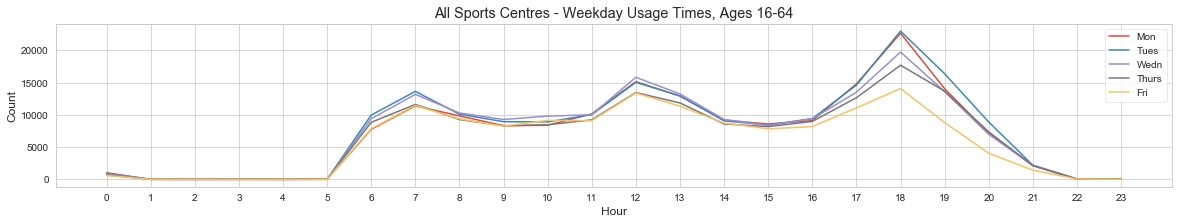

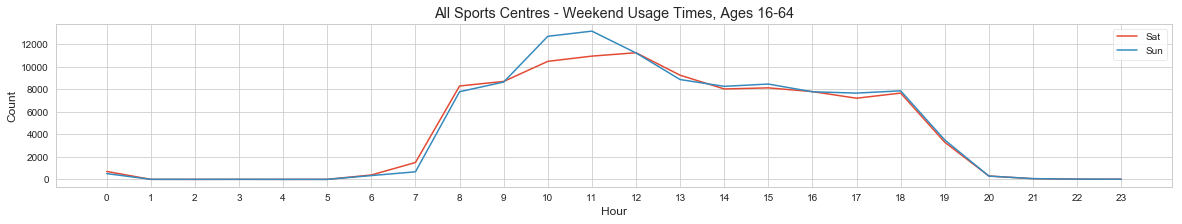

In [88]:
# Plot of above, using the grouped by hour data for all Sports Centres - Ages 16-64
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table16.index, y="Total", data=mon_table16)
ax = sns.lineplot(x=tues_table16.index, y="Total", data=tues_table16)
ax = sns.lineplot(x=wed_table16.index, y="Total", data=wed_table16)
ax = sns.lineplot(x=thur_table16.index, y="Total", data=thur_table16)
ax = sns.lineplot(x=fri_table16.index, y="Total", data=fri_table16)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('All Sports Centres - Weekday Usage Times, Ages 16-64')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table16.index, y="Total", data=sat_table16)
ax = sns.lineplot(x=sun_table16.index, y="Total", data=sun_table16)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('All Sports Centres - Weekend Usage Times, Ages 16-64')
plt.show()

In [89]:
# Subset data into each day and 65+ Age Band

mon65= weekly[(weekly['weekday'] == 0) & (weekly['AgeBand'] == '65+') ]
tues65= weekly[(weekly['weekday'] == 1) & (weekly['AgeBand'] == '65+')]
wed65= weekly[(weekly['weekday'] == 2) & (weekly['AgeBand'] == '65+')]
thur65= weekly[(weekly['weekday'] == 3) & (weekly['AgeBand'] == '65+')]
fri65= weekly[(weekly['weekday'] == 4) & (weekly['AgeBand'] == '65+')]
sat65= weekly[(weekly['weekday'] == 5) & (weekly['AgeBand'] == '65+')]
sun65= weekly[(weekly['weekday'] == 6) & (weekly['AgeBand'] == '65+')]

# Group days into 30 minute intervals, and then group by SC and HOUR. 
# Also replace all NaN with 0 for correct plotting, and generate a total column for all SC

# Monday table
mon_counts65 = mon65.groupby([pd.Grouper(key='TimeStamp',freq='30T'),mon65.SportsCentre]).size().reset_index(name='count')
mon_table65 = mon_counts65.groupby([mon_counts65['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
mon_table65=mon_table65.fillna(0)
mon_table65['Total'] = mon_table65[list(mon_table65.columns)].sum(axis=1)

# Tuesday table
tues_counts65 = tues65.groupby([pd.Grouper(key='TimeStamp',freq='30T'),tues65.SportsCentre]).size().reset_index(name='count')
tues_table65 = tues_counts65.groupby([tues_counts65['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
tues_table65=tues_table65.fillna(0)
tues_table65['Total'] = tues_table65[list(tues_table65.columns)].sum(axis=1)

# Wedn table
wed_counts65 = wed65.groupby([pd.Grouper(key='TimeStamp',freq='30T'),wed65.SportsCentre]).size().reset_index(name='count')
wed_table65 = wed_counts65.groupby([wed_counts65['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
wed_table65=wed_table65.fillna(0)
wed_table65['Total'] = wed_table65[list(wed_table65.columns)].sum(axis=1)

# Thursday table
thur_counts65 = thur65.groupby([pd.Grouper(key='TimeStamp',freq='30T'),thur65.SportsCentre]).size().reset_index(name='count')
thur_table65 = thur_counts65.groupby([thur_counts65['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
thur_table65=thur_table65.fillna(0)
thur_table65['Total'] = thur_table65[list(thur_table65.columns)].sum(axis=1)

# Friday Table
fri_counts65 = fri65.groupby([pd.Grouper(key='TimeStamp',freq='30T'),fri65.SportsCentre]).size().reset_index(name='count')
fri_table65 = fri_counts65.groupby([fri_counts65['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
fri_table65=fri_table65.fillna(0)
fri_table65['Total'] = fri_table65[list(fri_table65.columns)].sum(axis=1)

# Saturday Table
sat_counts65 = sat65.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sat65.SportsCentre]).size().reset_index(name='count')
sat_table65 = sat_counts65.groupby([sat_counts65['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sat_table65=sat_table65.fillna(0)
sat_table65['Total'] = sat_table65[list(sat_table65.columns)].sum(axis=1)

# Sunday Table
sun_counts65 = sun65.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sun65.SportsCentre]).size().reset_index(name='count')
sun_table65 = sun_counts65.groupby([sun_counts65['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sun_table65=sun_table65.fillna(0)
sun_table65['Total'] = sun_table65[list(sun_table65.columns)].sum(axis=1)

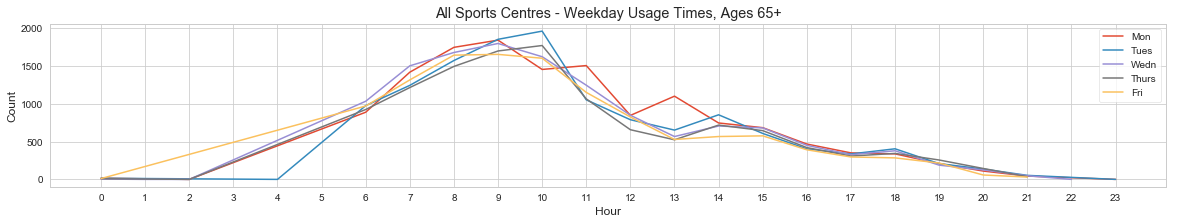

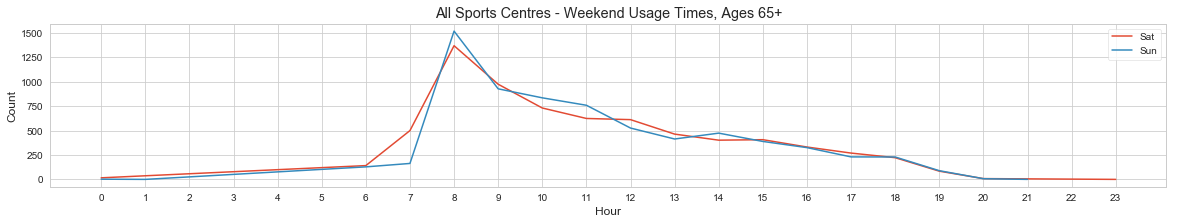

In [90]:
# Plot of above, using the grouped by hour data for all Sports Centres - Ages 65+
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table65.index, y="Total", data=mon_table65)
ax = sns.lineplot(x=tues_table65.index, y="Total", data=tues_table65)
ax = sns.lineplot(x=wed_table65.index, y="Total", data=wed_table65)
ax = sns.lineplot(x=thur_table65.index, y="Total", data=thur_table65)
ax = sns.lineplot(x=fri_table65.index, y="Total", data=fri_table65)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('All Sports Centres - Weekday Usage Times, Ages 65+')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table65.index, y="Total", data=sat_table65)
ax = sns.lineplot(x=sun_table65.index, y="Total", data=sun_table65)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('All Sports Centres - Weekend Usage Times, Ages 65+')
plt.show()

In [91]:
# Now, subset by gender
# Subset data into each day and by genders

mon_m= weekly[(weekly['weekday'] == 0) & (weekly['Gender'] == 'Male') ]
mon_f= weekly[(weekly['weekday'] == 0) & (weekly['Gender'] == 'Female') ]

tues_m= weekly[(weekly['weekday'] == 1) & (weekly['Gender'] == 'Male')]
tues_f= weekly[(weekly['weekday'] == 1) & (weekly['Gender'] == 'Female')]

wed_m= weekly[(weekly['weekday'] == 2) & (weekly['Gender'] == 'Male')]
wed_f= weekly[(weekly['weekday'] == 2) & (weekly['Gender'] == 'Female') ]

thur_m= weekly[(weekly['weekday'] == 3) & (weekly['Gender'] == 'Male')]
thur_f= weekly[(weekly['weekday'] == 3) & (weekly['Gender'] == 'Female') ]

fri_m= weekly[(weekly['weekday'] == 4) & (weekly['Gender'] == 'Male')]
fri_f= weekly[(weekly['weekday'] == 4) & (weekly['Gender'] == 'Female') ]

sat_m= weekly[(weekly['weekday'] == 5) & (weekly['Gender'] == 'Male')]
sat_f= weekly[(weekly['weekday'] == 5) & (weekly['Gender'] == 'Female') ]

sun_m= weekly[(weekly['weekday'] == 6) & (weekly['Gender'] == 'Male')]
sun_f= weekly[(weekly['weekday'] == 6) & (weekly['Gender'] == 'Female') ]

# Group days into 30 minute intervals, and then group by SC and HOUR. 
# Also replace all NaN with 0 for correct plotting, and generate a total column for all SC

# Monday table
mon_counts_m = mon_m.groupby([pd.Grouper(key='TimeStamp',freq='30T'),mon_m.SportsCentre]).size().reset_index(name='count')
mon_table_m = mon_counts_m.groupby([mon_counts_m['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
mon_table_m=mon_table_m.fillna(0)
mon_table_m['Total'] = mon_table_m[list(mon_table_m.columns)].sum(axis=1)

mon_counts_f = mon_f.groupby([pd.Grouper(key='TimeStamp',freq='30T'),mon_f.SportsCentre]).size().reset_index(name='count')
mon_table_f = mon_counts_f.groupby([mon_counts_f['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
mon_table_f=mon_table_f.fillna(0)
mon_table_f['Total'] = mon_table_f[list(mon_table_f.columns)].sum(axis=1)


# Tuesday table
tues_counts_m = tues_m.groupby([pd.Grouper(key='TimeStamp',freq='30T'),tues_m.SportsCentre]).size().reset_index(name='count')
tues_table_m = tues_counts_m.groupby([tues_counts_m['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
tues_table_m=tues_table_m.fillna(0)
tues_table_m['Total'] = tues_table_m[list(tues_table_m.columns)].sum(axis=1)

tues_counts_f = tues_f.groupby([pd.Grouper(key='TimeStamp',freq='30T'),tues_f.SportsCentre]).size().reset_index(name='count')
tues_table_f = tues_counts_f.groupby([tues_counts_f['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
tues_table_f=tues_table_f.fillna(0)
tues_table_f['Total'] = tues_table_f[list(tues_table_f.columns)].sum(axis=1)

# Wedn table
wed_counts_m = wed_m.groupby([pd.Grouper(key='TimeStamp',freq='30T'),wed_m.SportsCentre]).size().reset_index(name='count')
wed_table_m = wed_counts_m.groupby([wed_counts_m['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
wed_table_m=wed_table_m.fillna(0)
wed_table_m['Total'] = wed_table_m[list(wed_table_m.columns)].sum(axis=1)

wed_counts_f = wed_f.groupby([pd.Grouper(key='TimeStamp',freq='30T'),wed_f.SportsCentre]).size().reset_index(name='count')
wed_table_f = wed_counts_f.groupby([wed_counts_f['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
wed_table_f=wed_table_f.fillna(0)
wed_table_f['Total'] = wed_table_f[list(wed_table_f.columns)].sum(axis=1)

# Thursday table
thur_counts_m = thur_m.groupby([pd.Grouper(key='TimeStamp',freq='30T'),thur_m.SportsCentre]).size().reset_index(name='count')
thur_table_m = thur_counts_m.groupby([thur_counts_m['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
thur_table_m=thur_table_m.fillna(0)
thur_table_m['Total'] = thur_table_m[list(thur_table_m.columns)].sum(axis=1)

thur_counts_f = thur_f.groupby([pd.Grouper(key='TimeStamp',freq='30T'),thur_f.SportsCentre]).size().reset_index(name='count')
thur_table_f = thur_counts_f.groupby([thur_counts_f['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
thur_table_f=thur_table_f.fillna(0)
thur_table_f['Total'] = thur_table_f[list(thur_table_f.columns)].sum(axis=1)

# Friday Table
fri_counts_m = fri_m.groupby([pd.Grouper(key='TimeStamp',freq='30T'),fri_m.SportsCentre]).size().reset_index(name='count')
fri_table_m = fri_counts_m.groupby([fri_counts_m['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
fri_table_m=fri_table_m.fillna(0)
fri_table_m['Total'] = fri_table_m[list(fri_table_m.columns)].sum(axis=1)

fri_counts_f = fri_f.groupby([pd.Grouper(key='TimeStamp',freq='30T'),fri_f.SportsCentre]).size().reset_index(name='count')
fri_table_f = fri_counts_f.groupby([fri_counts_f['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
fri_table_f=fri_table_f.fillna(0)
fri_table_f['Total'] = fri_table_f[list(fri_table_f.columns)].sum(axis=1)

# Saturday Table
sat_counts_m = sat_m.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sat_m.SportsCentre]).size().reset_index(name='count')
sat_table_m = sat_counts_m.groupby([sat_counts_m['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sat_table_m=sat_table_m.fillna(0)
sat_table_m['Total'] = sat_table_m[list(sat_table_m.columns)].sum(axis=1)

sat_counts_f = sat_f.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sat_f.SportsCentre]).size().reset_index(name='count')
sat_table_f = sat_counts_f.groupby([sat_counts_f['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sat_table_f=sat_table_f.fillna(0)
sat_table_f['Total'] = sat_table_f[list(sat_table_f.columns)].sum(axis=1)

# Sunday Table
sun_counts_m = sun_m.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sun_m.SportsCentre]).size().reset_index(name='count')
sun_table_m = sun_counts_m.groupby([sun_counts_m['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sun_table_m=sun_table_m.fillna(0)
sun_table_m['Total'] = sun_table_m[list(sun_table_m.columns)].sum(axis=1)

sun_counts_f = sun_f.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sun_f.SportsCentre]).size().reset_index(name='count')
sun_table_f = sun_counts_f.groupby([sun_counts_f['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sun_table_f=sun_table_f.fillna(0)
sun_table_f['Total'] = sun_table_f[list(sun_table_f.columns)].sum(axis=1)


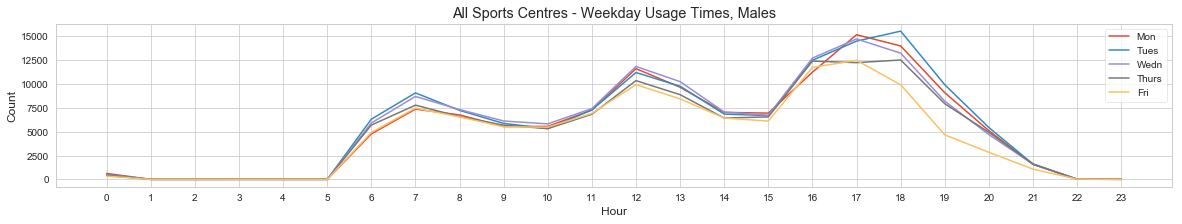

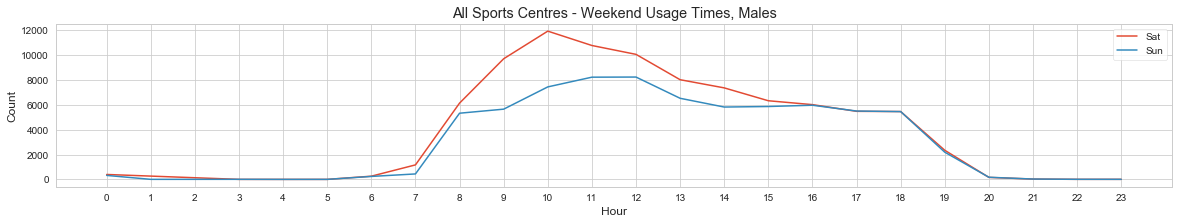

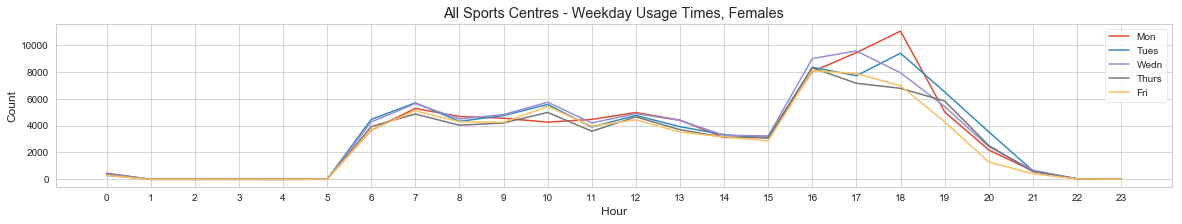

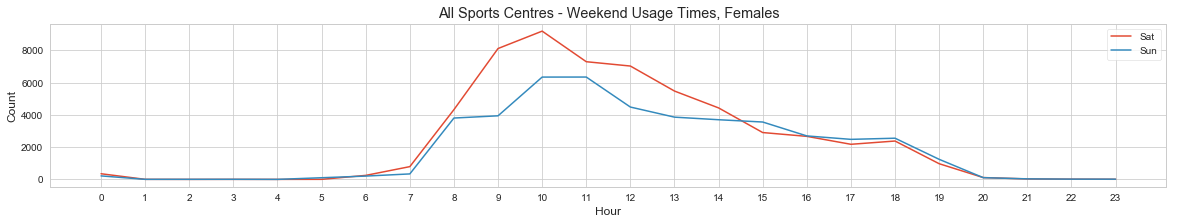

In [92]:
# Plot of above, using the grouped by hour data for all Sports Centres - by Gender
# Males appear more likely to visit weekday midday than females
hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table_m.index, y="Total", data=mon_table_m)
ax = sns.lineplot(x=tues_table_m.index, y="Total", data=tues_table_m)
ax = sns.lineplot(x=wed_table_m.index, y="Total", data=wed_table_m)
ax = sns.lineplot(x=thur_table_m.index, y="Total", data=thur_table_m)
ax = sns.lineplot(x=fri_table_m.index, y="Total", data=fri_table_m)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('All Sports Centres - Weekday Usage Times, Males')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table_m.index, y="Total", data=sat_table_m)
ax = sns.lineplot(x=sun_table_m.index, y="Total", data=sun_table_m)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('All Sports Centres - Weekend Usage Times, Males')
plt.show()

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table_f.index, y="Total", data=mon_table_f)
ax = sns.lineplot(x=tues_table_f.index, y="Total", data=tues_table_f)
ax = sns.lineplot(x=wed_table_f.index, y="Total", data=wed_table_f)
ax = sns.lineplot(x=thur_table_f.index, y="Total", data=thur_table_f)
ax = sns.lineplot(x=fri_table_f.index, y="Total", data=fri_table_f)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('All Sports Centres - Weekday Usage Times, Females')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table_f.index, y="Total", data=sat_table_f)
ax = sns.lineplot(x=sun_table_f.index, y="Total", data=sun_table_f)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('All Sports Centres - Weekend Usage Times, Females')
plt.show()

In [93]:
# Finally, split by Acorn Category Groups

# SPLIT BY ACORN CATEGORY GROUPS

# Add Acorn Categories to Weekly Dataframe
# Drop all unknown Postcodes (XXXX)
weekly_drop = weekly.loc[weekly['Postcode'] != 'XXXX']

# Truncate the Postcodes by removing the space in-between them
weekly_drop['Postcode'] = weekly_drop['Postcode'].str.replace(' ', '')

# Append the ACORN categories to the EveryoneActive counts using Postcode attribute
weekly = pd.merge(weekly_drop, acorn, on='Postcode', how='outer')


# Subset by day and acorn group
mon_w= weekly[(weekly['weekday'] == 0) & (weekly['Category'] == 'Not Private Households') ]
mon_bl= weekly[(weekly['weekday'] == 0) & (weekly['Category'] == 'Rising Prosperity') ]
mon_as= weekly[(weekly['weekday'] == 0) & (weekly['Category'] == 'Affluent Achiever') ]
mon_mx= weekly[(weekly['weekday'] == 0) & (weekly['Category'] == 'Financially Stretched') ]
mon_ot= weekly[(weekly['weekday'] == 0) & (weekly['Category'] == 'Urban Adversity') ]

tues_w= weekly[(weekly['weekday'] == 1) & (weekly['Category'] == 'Not Private Households')]
tues_bl= weekly[(weekly['weekday'] == 1) & (weekly['Category'] == 'Rising Prosperity')]
tues_as= weekly[(weekly['weekday'] == 1) & (weekly['Category'] == 'Affluent Achiever')]
tues_mx= weekly[(weekly['weekday'] == 1) & (weekly['Category'] == 'Financially Stretched')]
tues_ot= weekly[(weekly['weekday'] == 1) & (weekly['Category'] == 'Urban Adversity')]

wed_w= weekly[(weekly['weekday'] == 2) & (weekly['Category'] == 'Not Private Households')]
wed_bl= weekly[(weekly['weekday'] == 2) & (weekly['Category'] == 'Rising Prosperity')]
wed_as= weekly[(weekly['weekday'] == 2) & (weekly['Category'] == 'Affluent Achiever')]
wed_mx= weekly[(weekly['weekday'] == 2) & (weekly['Category'] == 'Financially Stretched')]
wed_ot= weekly[(weekly['weekday'] == 2) & (weekly['Category'] == 'Urban Adversity')]

thur_w= weekly[(weekly['weekday'] == 3) & (weekly['Category'] == 'Not Private Households')]
thur_bl= weekly[(weekly['weekday'] == 3) & (weekly['Category'] == 'Rising Prosperity')]
thur_as= weekly[(weekly['weekday'] == 3) & (weekly['Category'] == 'Affluent Achiever')]
thur_mx= weekly[(weekly['weekday'] == 3) & (weekly['Category'] == 'Financially Stretched')]
thur_ot= weekly[(weekly['weekday'] == 3) & (weekly['Category'] == 'Urban Adversity')]

fri_w= weekly[(weekly['weekday'] == 4) & (weekly['Category'] == 'Not Private Households')]
fri_bl= weekly[(weekly['weekday'] == 4) & (weekly['Category'] == 'Rising Prosperity')]
fri_as= weekly[(weekly['weekday'] == 4) & (weekly['Category'] == 'Affluent Achiever')]
fri_mx= weekly[(weekly['weekday'] == 4) & (weekly['Category'] == 'Financially Stretched')]
fri_ot= weekly[(weekly['weekday'] == 4) & (weekly['Category'] == 'Urban Adversity')]

sat_w= weekly[(weekly['weekday'] == 5) & (weekly['Category'] == 'Not Private Households')]
sat_bl= weekly[(weekly['weekday'] == 5) & (weekly['Category'] == 'Rising Prosperity')]
sat_as= weekly[(weekly['weekday'] == 5) & (weekly['Category'] == 'Affluent Achiever')]
sat_mx= weekly[(weekly['weekday'] == 5) & (weekly['Category'] == 'Financially Stretched')]
sat_ot= weekly[(weekly['weekday'] == 5) & (weekly['Category'] == 'Urban Adversity')]

sun_w= weekly[(weekly['weekday'] == 6) & (weekly['Category'] == 'Not Private Households')]
sun_bl= weekly[(weekly['weekday'] == 6) & (weekly['Category'] == 'Rising Prosperity')]
sun_as= weekly[(weekly['weekday'] == 6) & (weekly['Category'] == 'Affluent Achiever')]
sun_mx= weekly[(weekly['weekday'] == 6) & (weekly['Category'] == 'Financially Stretched')]
sun_ot= weekly[(weekly['weekday'] == 6) & (weekly['Category'] == 'Urban Adversity')]

# Group days into 30 minute intervals, and then group by SC and HOUR. 
# Also replace all NaN with 0 for correct plotting, and generate a total column for all SC

# Monday table
mon_counts_w = mon_w.groupby([pd.Grouper(key='TimeStamp',freq='30T'),mon_w.SportsCentre]).size().reset_index(name='count')
mon_table_w = mon_counts_w.groupby([mon_counts_w['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
mon_table_w=mon_table_w.fillna(0)
mon_table_w['Total'] = mon_table_w[list(mon_table_w.columns)].sum(axis=1)

mon_counts_bl = mon_bl.groupby([pd.Grouper(key='TimeStamp',freq='30T'),mon_bl.SportsCentre]).size().reset_index(name='count')
mon_table_bl = mon_counts_bl.groupby([mon_counts_bl['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
mon_table_bl=mon_table_bl.fillna(0)
mon_table_bl['Total'] = mon_table_bl[list(mon_table_bl.columns)].sum(axis=1)

mon_counts_as = mon_as.groupby([pd.Grouper(key='TimeStamp',freq='30T'),mon_as.SportsCentre]).size().reset_index(name='count')
mon_table_as = mon_counts_as.groupby([mon_counts_as['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
mon_table_as=mon_table_as.fillna(0)
mon_table_as['Total'] = mon_table_as[list(mon_table_as.columns)].sum(axis=1)

mon_counts_mx = mon_mx.groupby([pd.Grouper(key='TimeStamp',freq='30T'),mon_mx.SportsCentre]).size().reset_index(name='count')
mon_table_mx = mon_counts_mx.groupby([mon_counts_mx['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
mon_table_mx=mon_table_mx.fillna(0)
mon_table_mx['Total'] = mon_table_mx[list(mon_table_mx.columns)].sum(axis=1)

mon_counts_ot = mon_ot.groupby([pd.Grouper(key='TimeStamp',freq='30T'),mon_ot.SportsCentre]).size().reset_index(name='count')
mon_table_ot = mon_counts_ot.groupby([mon_counts_ot['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
mon_table_ot=mon_table_ot.fillna(0)
mon_table_ot['Total'] = mon_table_ot[list(mon_table_ot.columns)].sum(axis=1)


# Tuesday table
tues_counts_w = tues_w.groupby([pd.Grouper(key='TimeStamp',freq='30T'),tues_w.SportsCentre]).size().reset_index(name='count')
tues_table_w = tues_counts_w.groupby([tues_counts_w['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
tues_table_w=tues_table_w.fillna(0)
tues_table_w['Total'] = tues_table_w[list(tues_table_w.columns)].sum(axis=1)

tues_counts_bl = tues_bl.groupby([pd.Grouper(key='TimeStamp',freq='30T'),tues_bl.SportsCentre]).size().reset_index(name='count')
tues_table_bl = tues_counts_bl.groupby([tues_counts_bl['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
tues_table_bl=tues_table_bl.fillna(0)
tues_table_bl['Total'] = tues_table_bl[list(tues_table_bl.columns)].sum(axis=1)

tues_counts_as = tues_as.groupby([pd.Grouper(key='TimeStamp',freq='30T'),tues_as.SportsCentre]).size().reset_index(name='count')
tues_table_as = tues_counts_as.groupby([tues_counts_as['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
tues_table_as=tues_table_as.fillna(0)
tues_table_as['Total'] = tues_table_as[list(tues_table_as.columns)].sum(axis=1)

tues_counts_mx = tues_mx.groupby([pd.Grouper(key='TimeStamp',freq='30T'),tues_mx.SportsCentre]).size().reset_index(name='count')
tues_table_mx = tues_counts_mx.groupby([tues_counts_mx['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
tues_table_mx=tues_table_mx.fillna(0)
tues_table_mx['Total'] = tues_table_mx[list(tues_table_mx.columns)].sum(axis=1)

tues_counts_ot = tues_ot.groupby([pd.Grouper(key='TimeStamp',freq='30T'),tues_ot.SportsCentre]).size().reset_index(name='count')
tues_table_ot = tues_counts_ot.groupby([tues_counts_ot['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
tues_table_ot=tues_table_ot.fillna(0)
tues_table_ot['Total'] = tues_table_ot[list(tues_table_ot.columns)].sum(axis=1)

# Wedn table
wed_counts_w = wed_w.groupby([pd.Grouper(key='TimeStamp',freq='30T'),wed_w.SportsCentre]).size().reset_index(name='count')
wed_table_w = wed_counts_w.groupby([wed_counts_w['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
wed_table_w=wed_table_w.fillna(0)
wed_table_w['Total'] = wed_table_w[list(wed_table_w.columns)].sum(axis=1)

wed_counts_bl = wed_bl.groupby([pd.Grouper(key='TimeStamp',freq='30T'),wed_bl.SportsCentre]).size().reset_index(name='count')
wed_table_bl = wed_counts_bl.groupby([wed_counts_bl['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
wed_table_bl=wed_table_bl.fillna(0)
wed_table_bl['Total'] = wed_table_bl[list(wed_table_bl.columns)].sum(axis=1)

wed_counts_as = wed_as.groupby([pd.Grouper(key='TimeStamp',freq='30T'),wed_as.SportsCentre]).size().reset_index(name='count')
wed_table_as = wed_counts_as.groupby([wed_counts_as['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
wed_table_as=wed_table_as.fillna(0)
wed_table_as['Total'] = wed_table_as[list(wed_table_as.columns)].sum(axis=1)

wed_counts_mx = wed_mx.groupby([pd.Grouper(key='TimeStamp',freq='30T'),wed_mx.SportsCentre]).size().reset_index(name='count')
wed_table_mx = wed_counts_mx.groupby([wed_counts_mx['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
wed_table_mx=wed_table_mx.fillna(0)
wed_table_mx['Total'] = wed_table_mx[list(wed_table_mx.columns)].sum(axis=1)

wed_counts_ot = wed_ot.groupby([pd.Grouper(key='TimeStamp',freq='30T'),wed_ot.SportsCentre]).size().reset_index(name='count')
wed_table_ot = wed_counts_ot.groupby([wed_counts_ot['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
wed_table_ot=wed_table_ot.fillna(0)
wed_table_ot['Total'] = wed_table_ot[list(wed_table_ot.columns)].sum(axis=1)

# Thursday table
thur_counts_w = thur_w.groupby([pd.Grouper(key='TimeStamp',freq='30T'),thur_w.SportsCentre]).size().reset_index(name='count')
thur_table_w = thur_counts_w.groupby([thur_counts_w['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
thur_table_w=thur_table_w.fillna(0)
thur_table_w['Total'] = thur_table_w[list(thur_table_w.columns)].sum(axis=1)

thur_counts_bl = thur_bl.groupby([pd.Grouper(key='TimeStamp',freq='30T'),thur_bl.SportsCentre]).size().reset_index(name='count')
thur_table_bl = thur_counts_bl.groupby([thur_counts_bl['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
thur_table_bl=thur_table_bl.fillna(0)
thur_table_bl['Total'] = thur_table_bl[list(thur_table_bl.columns)].sum(axis=1)

thur_counts_as = thur_as.groupby([pd.Grouper(key='TimeStamp',freq='30T'),thur_as.SportsCentre]).size().reset_index(name='count')
thur_table_as = thur_counts_as.groupby([thur_counts_as['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
thur_table_as=thur_table_as.fillna(0)
thur_table_as['Total'] = thur_table_as[list(thur_table_as.columns)].sum(axis=1)

thur_counts_mx = thur_mx.groupby([pd.Grouper(key='TimeStamp',freq='30T'),thur_mx.SportsCentre]).size().reset_index(name='count')
thur_table_mx = thur_counts_mx.groupby([thur_counts_mx['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
thur_table_mx=thur_table_mx.fillna(0)
thur_table_mx['Total'] = thur_table_mx[list(thur_table_mx.columns)].sum(axis=1)

thur_counts_ot = thur_ot.groupby([pd.Grouper(key='TimeStamp',freq='30T'),thur_ot.SportsCentre]).size().reset_index(name='count')
thur_table_ot = thur_counts_ot.groupby([thur_counts_ot['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
thur_table_ot=thur_table_ot.fillna(0)
thur_table_ot['Total'] = thur_table_ot[list(thur_table_ot.columns)].sum(axis=1)

# Friday Table
fri_counts_w = fri_w.groupby([pd.Grouper(key='TimeStamp',freq='30T'),fri_w.SportsCentre]).size().reset_index(name='count')
fri_table_w = fri_counts_w.groupby([fri_counts_w['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
fri_table_w=fri_table_w.fillna(0)
fri_table_w['Total'] = fri_table_w[list(fri_table_w.columns)].sum(axis=1)

fri_counts_bl = fri_bl.groupby([pd.Grouper(key='TimeStamp',freq='30T'),fri_bl.SportsCentre]).size().reset_index(name='count')
fri_table_bl = fri_counts_bl.groupby([fri_counts_bl['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
fri_table_bl=fri_table_bl.fillna(0)
fri_table_bl['Total'] = fri_table_bl[list(fri_table_bl.columns)].sum(axis=1)

fri_counts_as = fri_as.groupby([pd.Grouper(key='TimeStamp',freq='30T'),fri_as.SportsCentre]).size().reset_index(name='count')
fri_table_as = fri_counts_as.groupby([fri_counts_as['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
fri_table_as=fri_table_as.fillna(0)
fri_table_as['Total'] = fri_table_as[list(fri_table_as.columns)].sum(axis=1)

fri_counts_mx = fri_mx.groupby([pd.Grouper(key='TimeStamp',freq='30T'),fri_mx.SportsCentre]).size().reset_index(name='count')
fri_table_mx = fri_counts_mx.groupby([fri_counts_mx['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
fri_table_mx=fri_table_mx.fillna(0)
fri_table_mx['Total'] = fri_table_mx[list(fri_table_mx.columns)].sum(axis=1)

fri_counts_ot = fri_ot.groupby([pd.Grouper(key='TimeStamp',freq='30T'),fri_ot.SportsCentre]).size().reset_index(name='count')
fri_table_ot = fri_counts_ot.groupby([fri_counts_ot['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
fri_table_ot=fri_table_ot.fillna(0)
fri_table_ot['Total'] = fri_table_ot[list(fri_table_ot.columns)].sum(axis=1)

# Saturday Table
sat_counts_w = sat_w.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sat_w.SportsCentre]).size().reset_index(name='count')
sat_table_w = sat_counts_w.groupby([sat_counts_w['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sat_table_w=sat_table_w.fillna(0)
sat_table_w['Total'] = sat_table_w[list(sat_table_w.columns)].sum(axis=1)

sat_counts_bl = sat_bl.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sat_bl.SportsCentre]).size().reset_index(name='count')
sat_table_bl = sat_counts_bl.groupby([sat_counts_bl['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sat_table_bl=sat_table_bl.fillna(0)
sat_table_bl['Total'] = sat_table_bl[list(sat_table_bl.columns)].sum(axis=1)

sat_counts_as = sat_as.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sat_as.SportsCentre]).size().reset_index(name='count')
sat_table_as = sat_counts_as.groupby([sat_counts_as['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sat_table_as=sat_table_as.fillna(0)
sat_table_as['Total'] = sat_table_as[list(sat_table_as.columns)].sum(axis=1)

sat_counts_mx = sat_mx.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sat_mx.SportsCentre]).size().reset_index(name='count')
sat_table_mx = sat_counts_mx.groupby([sat_counts_mx['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sat_table_mx=sat_table_mx.fillna(0)
sat_table_mx['Total'] = sat_table_mx[list(sat_table_mx.columns)].sum(axis=1)

sat_counts_ot = sat_ot.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sat_ot.SportsCentre]).size().reset_index(name='count')
sat_table_ot = sat_counts_ot.groupby([sat_counts_ot['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sat_table_ot=sat_table_ot.fillna(0)
sat_table_ot['Total'] = sat_table_ot[list(sat_table_ot.columns)].sum(axis=1)

# Sunday Table
sun_counts_w = sun_w.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sun_w.SportsCentre]).size().reset_index(name='count')
sun_table_w = sun_counts_w.groupby([sun_counts_w['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sun_table_w=sun_table_w.fillna(0)
sun_table_w['Total'] = sun_table_w[list(sun_table_w.columns)].sum(axis=1)

sun_counts_bl = sun_bl.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sun_bl.SportsCentre]).size().reset_index(name='count')
sun_table_bl = sun_counts_bl.groupby([sun_counts_bl['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sun_table_bl=sun_table_bl.fillna(0)
sun_table_bl['Total'] = sun_table_bl[list(sun_table_bl.columns)].sum(axis=1)

sun_counts_as = sun_as.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sun_as.SportsCentre]).size().reset_index(name='count')
sun_table_as = sun_counts_as.groupby([sun_counts_as['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sun_table_as=sun_table_as.fillna(0)
sun_table_as['Total'] = sun_table_as[list(sun_table_as.columns)].sum(axis=1)

sun_counts_mx = sun_mx.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sun_mx.SportsCentre]).size().reset_index(name='count')
sun_table_mx = sun_counts_mx.groupby([sun_counts_mx['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sun_table_mx=sun_table_mx.fillna(0)
sun_table_mx['Total'] = sun_table_mx[list(sun_table_mx.columns)].sum(axis=1)

sun_counts_ot = sun_ot.groupby([pd.Grouper(key='TimeStamp',freq='30T'),sun_ot.SportsCentre]).size().reset_index(name='count')
sun_table_ot = sun_counts_ot.groupby([sun_counts_ot['TimeStamp'].dt.hour, 'SportsCentre'])['count'].sum().unstack()
sun_table_ot=sun_table_ot.fillna(0)
sun_table_ot['Total'] = sun_table_ot[list(sun_table_ot.columns)].sum(axis=1)

C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


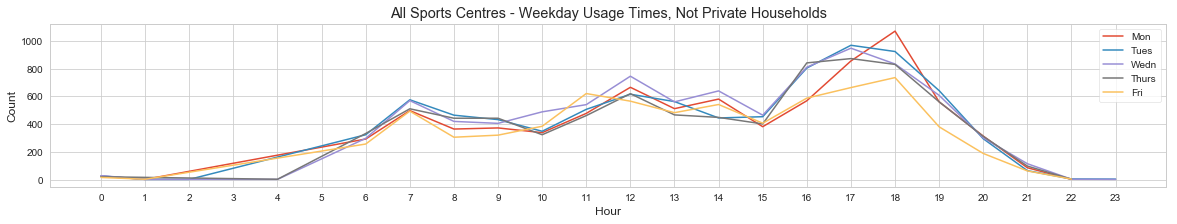

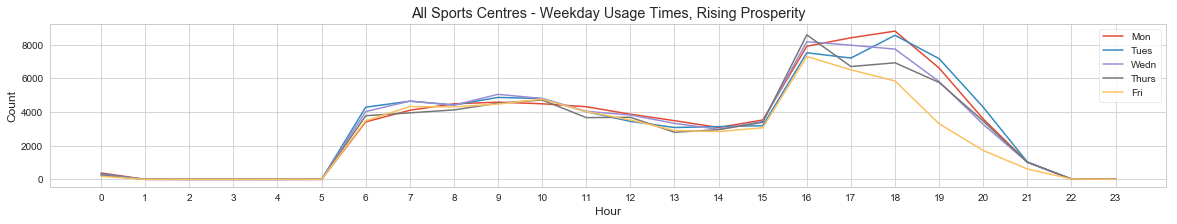

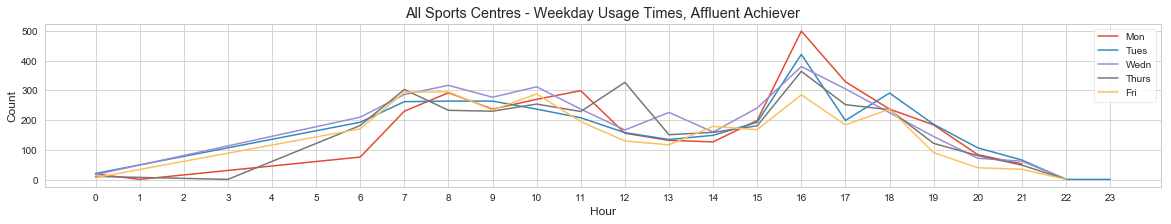

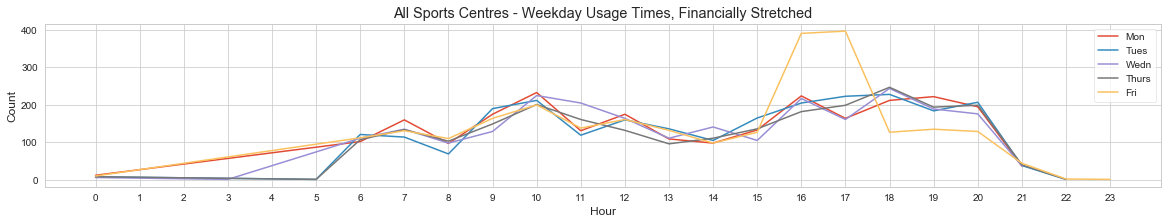

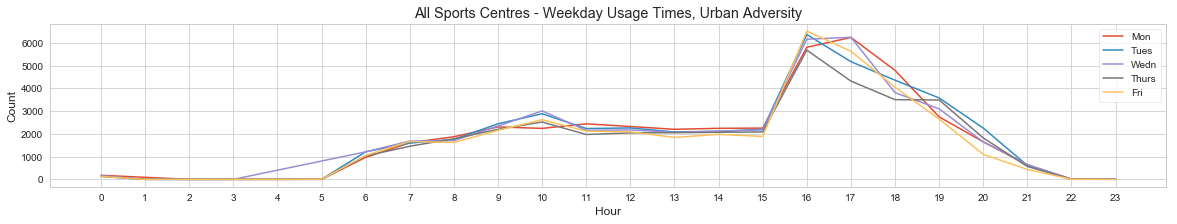

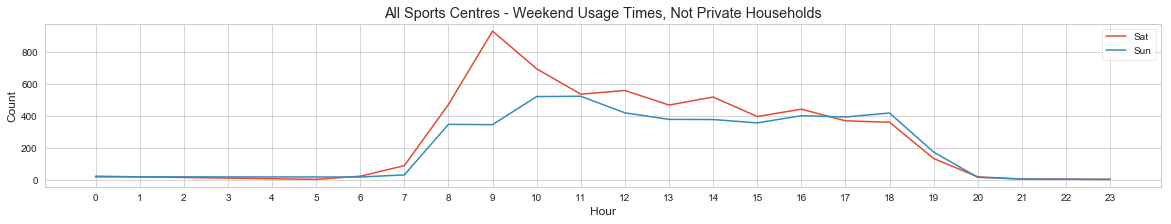

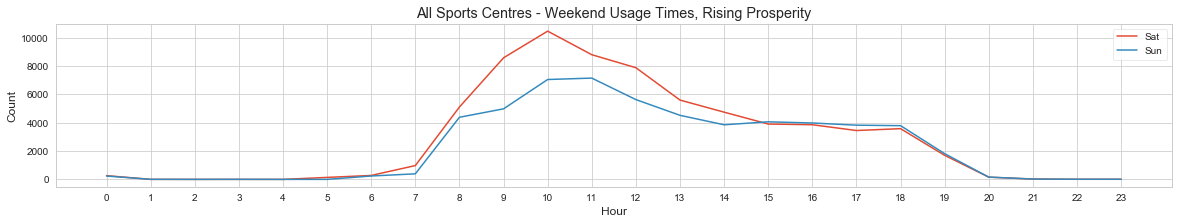

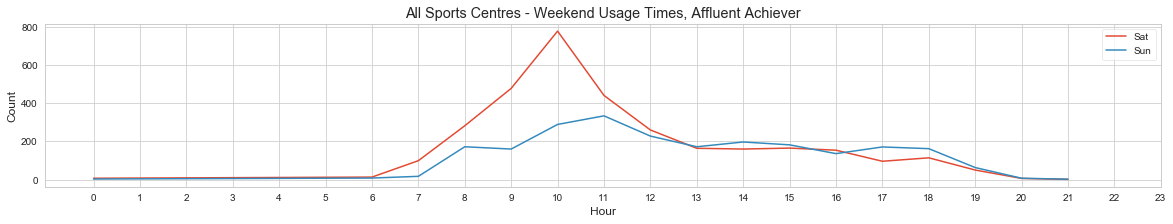

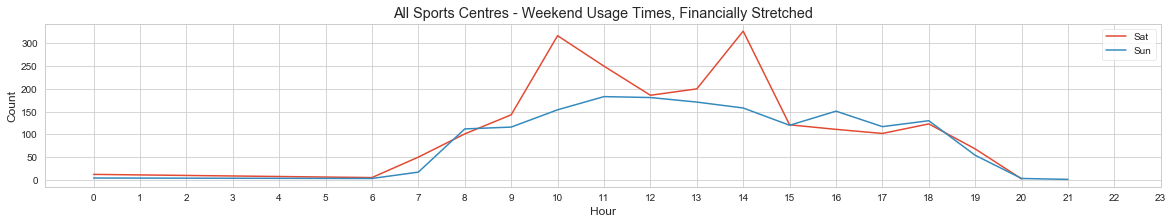

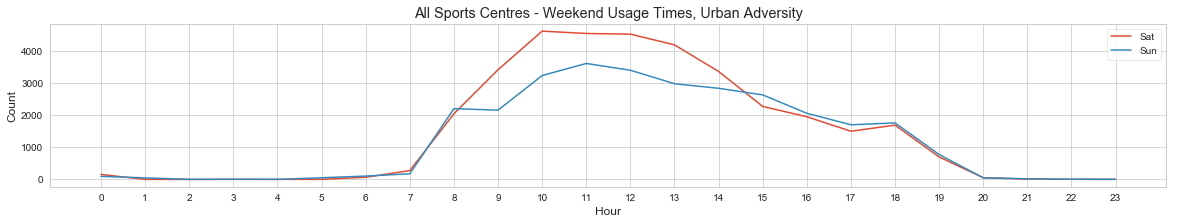

In [94]:
# Plot of above, using the grouped by hour data for all Sports Centres - by Ethnic Group

hours = range(0, 24)

# Weekdays
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table_w.index, y="Total", data=mon_table_w)
ax = sns.lineplot(x=tues_table_w.index, y="Total", data=tues_table_w)
ax = sns.lineplot(x=wed_table_w.index, y="Total", data=wed_table_w)
ax = sns.lineplot(x=thur_table_w.index, y="Total", data=thur_table_w)
ax = sns.lineplot(x=fri_table_w.index, y="Total", data=fri_table_w)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('All Sports Centres - Weekday Usage Times, Not Private Households')
plt.show()

plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table_bl.index, y="Total", data=mon_table_bl)
ax = sns.lineplot(x=tues_table_bl.index, y="Total", data=tues_table_bl)
ax = sns.lineplot(x=wed_table_bl.index, y="Total", data=wed_table_bl)
ax = sns.lineplot(x=thur_table_bl.index, y="Total", data=thur_table_bl)
ax = sns.lineplot(x=fri_table_bl.index, y="Total", data=fri_table_bl)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('All Sports Centres - Weekday Usage Times, Rising Prosperity')
plt.show()

plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table_as.index, y="Total", data=mon_table_as)
ax = sns.lineplot(x=tues_table_as.index, y="Total", data=tues_table_as)
ax = sns.lineplot(x=wed_table_as.index, y="Total", data=wed_table_as)
ax = sns.lineplot(x=thur_table_as.index, y="Total", data=thur_table_as)
ax = sns.lineplot(x=fri_table_as.index, y="Total", data=fri_table_as)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('All Sports Centres - Weekday Usage Times, Affluent Achiever')
plt.show()

plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table_mx.index, y="Total", data=mon_table_mx)
ax = sns.lineplot(x=tues_table_mx.index, y="Total", data=tues_table_mx)
ax = sns.lineplot(x=wed_table_mx.index, y="Total", data=wed_table_mx)
ax = sns.lineplot(x=thur_table_mx.index, y="Total", data=thur_table_mx)
ax = sns.lineplot(x=fri_table_mx.index, y="Total", data=fri_table_mx)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('All Sports Centres - Weekday Usage Times, Financially Stretched')
plt.show()

plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=mon_table_ot.index, y="Total", data=mon_table_ot)
ax = sns.lineplot(x=tues_table_ot.index, y="Total", data=tues_table_ot)
ax = sns.lineplot(x=wed_table_ot.index, y="Total", data=wed_table_ot)
ax = sns.lineplot(x=thur_table_ot.index, y="Total", data=thur_table_ot)
ax = sns.lineplot(x=fri_table_ot.index, y="Total", data=fri_table_ot)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri'])
ax = plt.title('All Sports Centres - Weekday Usage Times, Urban Adversity')
plt.show()

# Weekends
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table_w.index, y="Total", data=sat_table_w)
ax = sns.lineplot(x=sun_table_w.index, y="Total", data=sun_table_w)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('All Sports Centres - Weekend Usage Times, Not Private Households')
plt.show()

plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table_bl.index, y="Total", data=sat_table_bl)
ax = sns.lineplot(x=sun_table_bl.index, y="Total", data=sun_table_bl)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('All Sports Centres - Weekend Usage Times, Rising Prosperity')
plt.show()

plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table_as.index, y="Total", data=sat_table_as)
ax = sns.lineplot(x=sun_table_as.index, y="Total", data=sun_table_as)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('All Sports Centres - Weekend Usage Times, Affluent Achiever')
plt.show()

plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table_mx.index, y="Total", data=sat_table_mx)
ax = sns.lineplot(x=sun_table_mx.index, y="Total", data=sun_table_mx)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('All Sports Centres - Weekend Usage Times, Financially Stretched')
plt.show()

plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=sat_table_ot.index, y="Total", data=sat_table_ot)
ax = sns.lineplot(x=sun_table_ot.index, y="Total", data=sun_table_ot)
ax.set(xlabel="Hour")
ax.set(ylabel="Count")
ax.set(xticks=range(len(hours)), xticklabels=[i for i in hours])
plt.legend(labels=['Sat', 'Sun'])
ax = plt.title('All Sports Centres - Weekend Usage Times, Urban Adversity')
plt.show()